Importing all library

In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import KNN 
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()
import random as random
import math

Using TensorFlow backend.


Import data frame as df

In [158]:
df =pd.read_csv("D:/Acads/summers2019/IME672/Project/Dataset/train.csv")# loading the dataset
df2=df.copy()

Get information of data frame

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 211 entries, Id to Weight_Daily
dtypes: float64(209), int64(2)
memory usage: 64.4 MB


In [160]:
 #getting data head to know  data frame
df.head()

Id  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1        NaN        NaN        NaN        NaN        8.0        NaN   
1   2        NaN        NaN        NaN        NaN        3.0   0.388896   
2   3        NaN  -0.696727   0.739591  -0.167928        9.0   0.471947   
3   4        NaN  -0.694350   1.568248   0.479073        5.0   0.120653   
4   5        6.0  -1.736489   2.765531   1.245280        7.0   4.866985   

   Feature_7  Feature_8  Feature_9  ...   Ret_175   Ret_176   Ret_177  \
0      75751     0.2254       11.0  ... -0.002688  0.002246 -0.000838   
1      17369     0.0166       13.0  ... -0.000129  0.000123  0.000248   
2       8277     0.3650        9.0  ... -0.000524 -0.000394  0.000116   
3      22508     0.2654       13.0  ...  0.000346 -0.000090  0.000288   
4      22423     0.2138       13.0  ... -0.001235  0.000027  0.002449   

        Ret_178   Ret_179   Ret_180  Ret_PlusOne  Ret_PlusTwo  \
0 -6.953224e-04  0.000003 -0.001974    -0.019512     0.028846   
1  3.315418e-07  0.000003  0.000027    -0.002939    -0.010253   
2  5.322557e-04  0.000274  0.000784    -0.024791     0.015711   
3 -1.281102e-04  0.000074  0.000341    -0.005680    -0.002190   
4  8.619882e-06  0.001209 -0.000004     0.036104    -0.026552   

   Weight_Intraday  Weight_Daily  
0     1.251508e+06  1.564385e+06  
1     1.733950e+06  2.167438e+06  
2     1.529197e+06  1.911497e+06  
3     1.711569e+06  2.139462e+06  
4     1.267270e+06  1.584088e+06  

[5 rows x 211 columns]

In [161]:
#Describing the data frame
df.describe()

Id    Feature_1     Feature_2     Feature_3     Feature_4  \
count  40000.00000  6687.000000  30854.000000  38763.000000  32279.000000   
mean   20000.50000     3.590250     -0.117558      0.558392      0.405572   
std    11547.14972     2.798532      1.236250      0.902233      0.799082   
min        1.00000     1.000000     -3.440521     -4.643526     -5.440596   
25%    10000.75000     1.000000     -0.967186     -0.110192     -0.111696   
50%    20000.50000     3.000000     -0.389162      0.437228      0.403516   
75%    30000.25000     6.000000      0.414442      1.064754      0.945944   
max    40000.00000    10.000000      4.175150      4.530405      2.953163   

          Feature_5     Feature_6     Feature_7     Feature_8     Feature_9  \
count  40000.000000  38067.000000  40000.000000  39531.000000  38125.000000   
mean       5.482775      0.430972  49244.971525      0.196958     10.680289   
std        2.942324      1.498274  28242.409717      0.138485      2.850634   
min        1.000000     -0.936644    338.000000      0.009800      0.000000   
25%        2.000000     -0.265555  26143.000000      0.016600      9.000000   
50%        6.000000      0.055564  48457.000000      0.213800     11.000000   
75%        8.000000      0.559921  72387.000000      0.331800     12.000000   
max       10.000000     12.609885  99861.000000      0.365000     36.000000   

       ...       Ret_175       Ret_176       Ret_177       Ret_178  \
count  ...  40000.000000  4.000000e+04  4.000000e+04  4.000000e+04   
mean   ...      0.000049 -3.580980e-06 -9.675766e-06 -1.268935e-05   
std    ...      0.001115  1.166019e-03  1.248956e-03  1.217967e-03   
min    ...     -0.018048 -1.786752e-02 -3.526027e-02 -4.864099e-02   
25%    ...     -0.000316 -3.943210e-04 -4.091851e-04 -3.649676e-04   
50%    ...      0.000004 -4.039616e-07  4.016833e-07  6.407432e-07   
75%    ...      0.000407  3.820685e-04  4.172179e-04  3.750965e-04   
max    ...      0.020781  3.061460e-02  4.406460e-02  2.922928e-02   

            Ret_179       Ret_180   Ret_PlusOne   Ret_PlusTwo  \
count  40000.000000  40000.000000  40000.000000  40000.000000   
mean      -0.000017     -0.000057     -0.000210      0.000012   
std        0.001208      0.001270      0.025039      0.024160   
min       -0.037215     -0.058046     -0.627690     -0.450779   
25%       -0.000361     -0.000413     -0.010521     -0.010055   
50%        0.000001     -0.000002     -0.000258     -0.000258   
75%        0.000378      0.000364      0.010005      0.009772   
max        0.048221      0.026112      0.795602      0.303038   

       Weight_Intraday  Weight_Daily  
count     4.000000e+04  4.000000e+04  
mean      1.504600e+06  1.880750e+06  
std       2.059143e+05  2.573928e+05  
min       1.000035e+06  1.250044e+06  
25%       1.357070e+06  1.696337e+06  
50%       1.477713e+06  1.847142e+06  
75%       1.624389e+06  2.030486e+06  
max       2.761229e+06  3.451536e+06  

[8 rows x 211 columns]

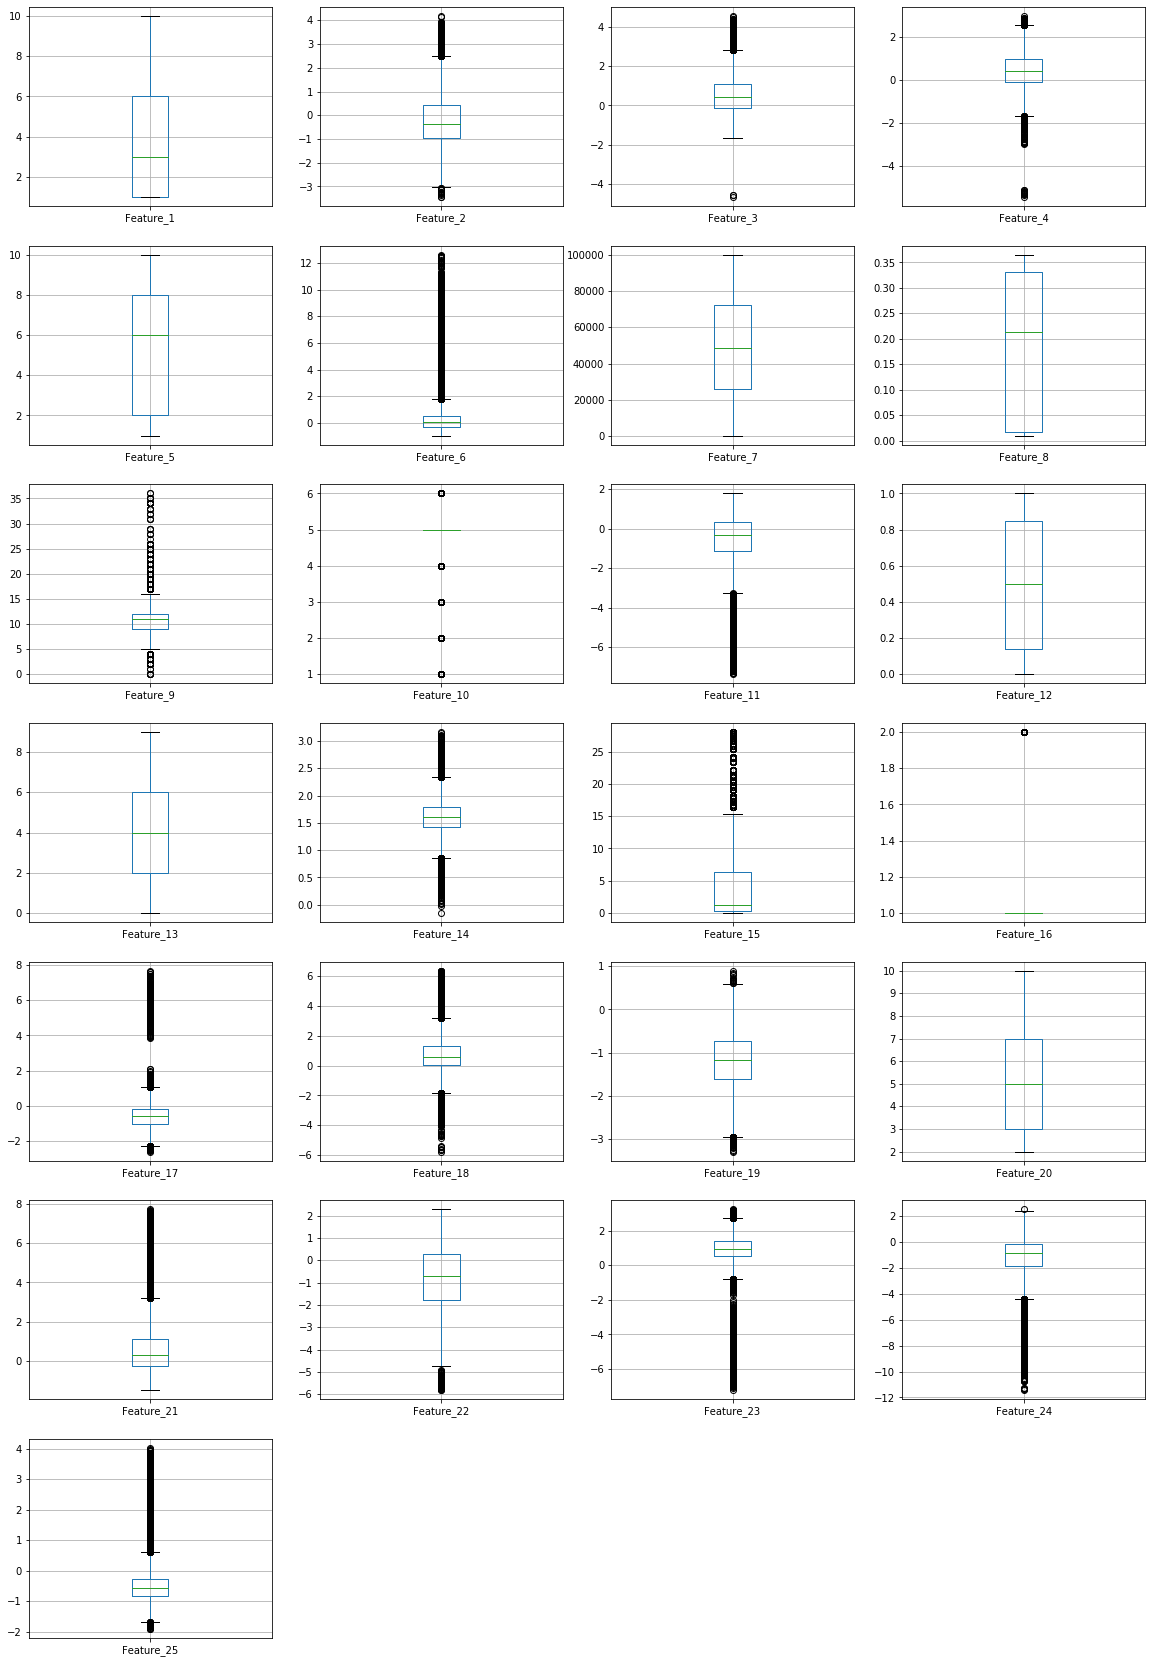

In [162]:
#plotting boxplots for all features to understand the distributation of features
plt.figure(figsize=(20,30))
cole=[]
for i, col in enumerate(list(df.columns)[1:26]):
    ax1=plt.subplot(7, 4, i + 1)
    if df[col].nunique(dropna=True)<50:
        cole+=[col];
    df.boxplot(col);

In [ ]:
print(cole)

In [163]:
#getting all unique data from  feature_8
df['Feature_8'].unique()

array([0.2254, 0.0166, 0.365 , 0.2654, 0.2138, 0.2064, 0.2119, 0.3583,
       0.2109, 0.0158, 0.3318, 0.2208, 0.3418, 0.0171,    nan, 0.2986,
       0.0111, 0.2087, 0.2323, 0.01  , 0.3451, 0.0099, 0.3484, 0.0163,
       0.0142, 0.0101, 0.0105, 0.0107, 0.0098, 0.0102, 0.0164, 0.0126,
       0.0174])

In [164]:
#getting all unique data from  feature_8
df['Feature_9'].unique()

array([11., 13.,  9.,  8.,  6., 10., 14., 17.,  7., nan, 12., 16., 15.,
        5., 19.,  4., 18., 22., 21., 20., 34., 23.,  3.,  2., 35., 24.,
       32., 26., 36., 31., 25., 33.,  0., 28., 27., 29.,  1.])

In [165]:
del cole[2]

In [166]:
df[cole]=df[cole].astype(str)

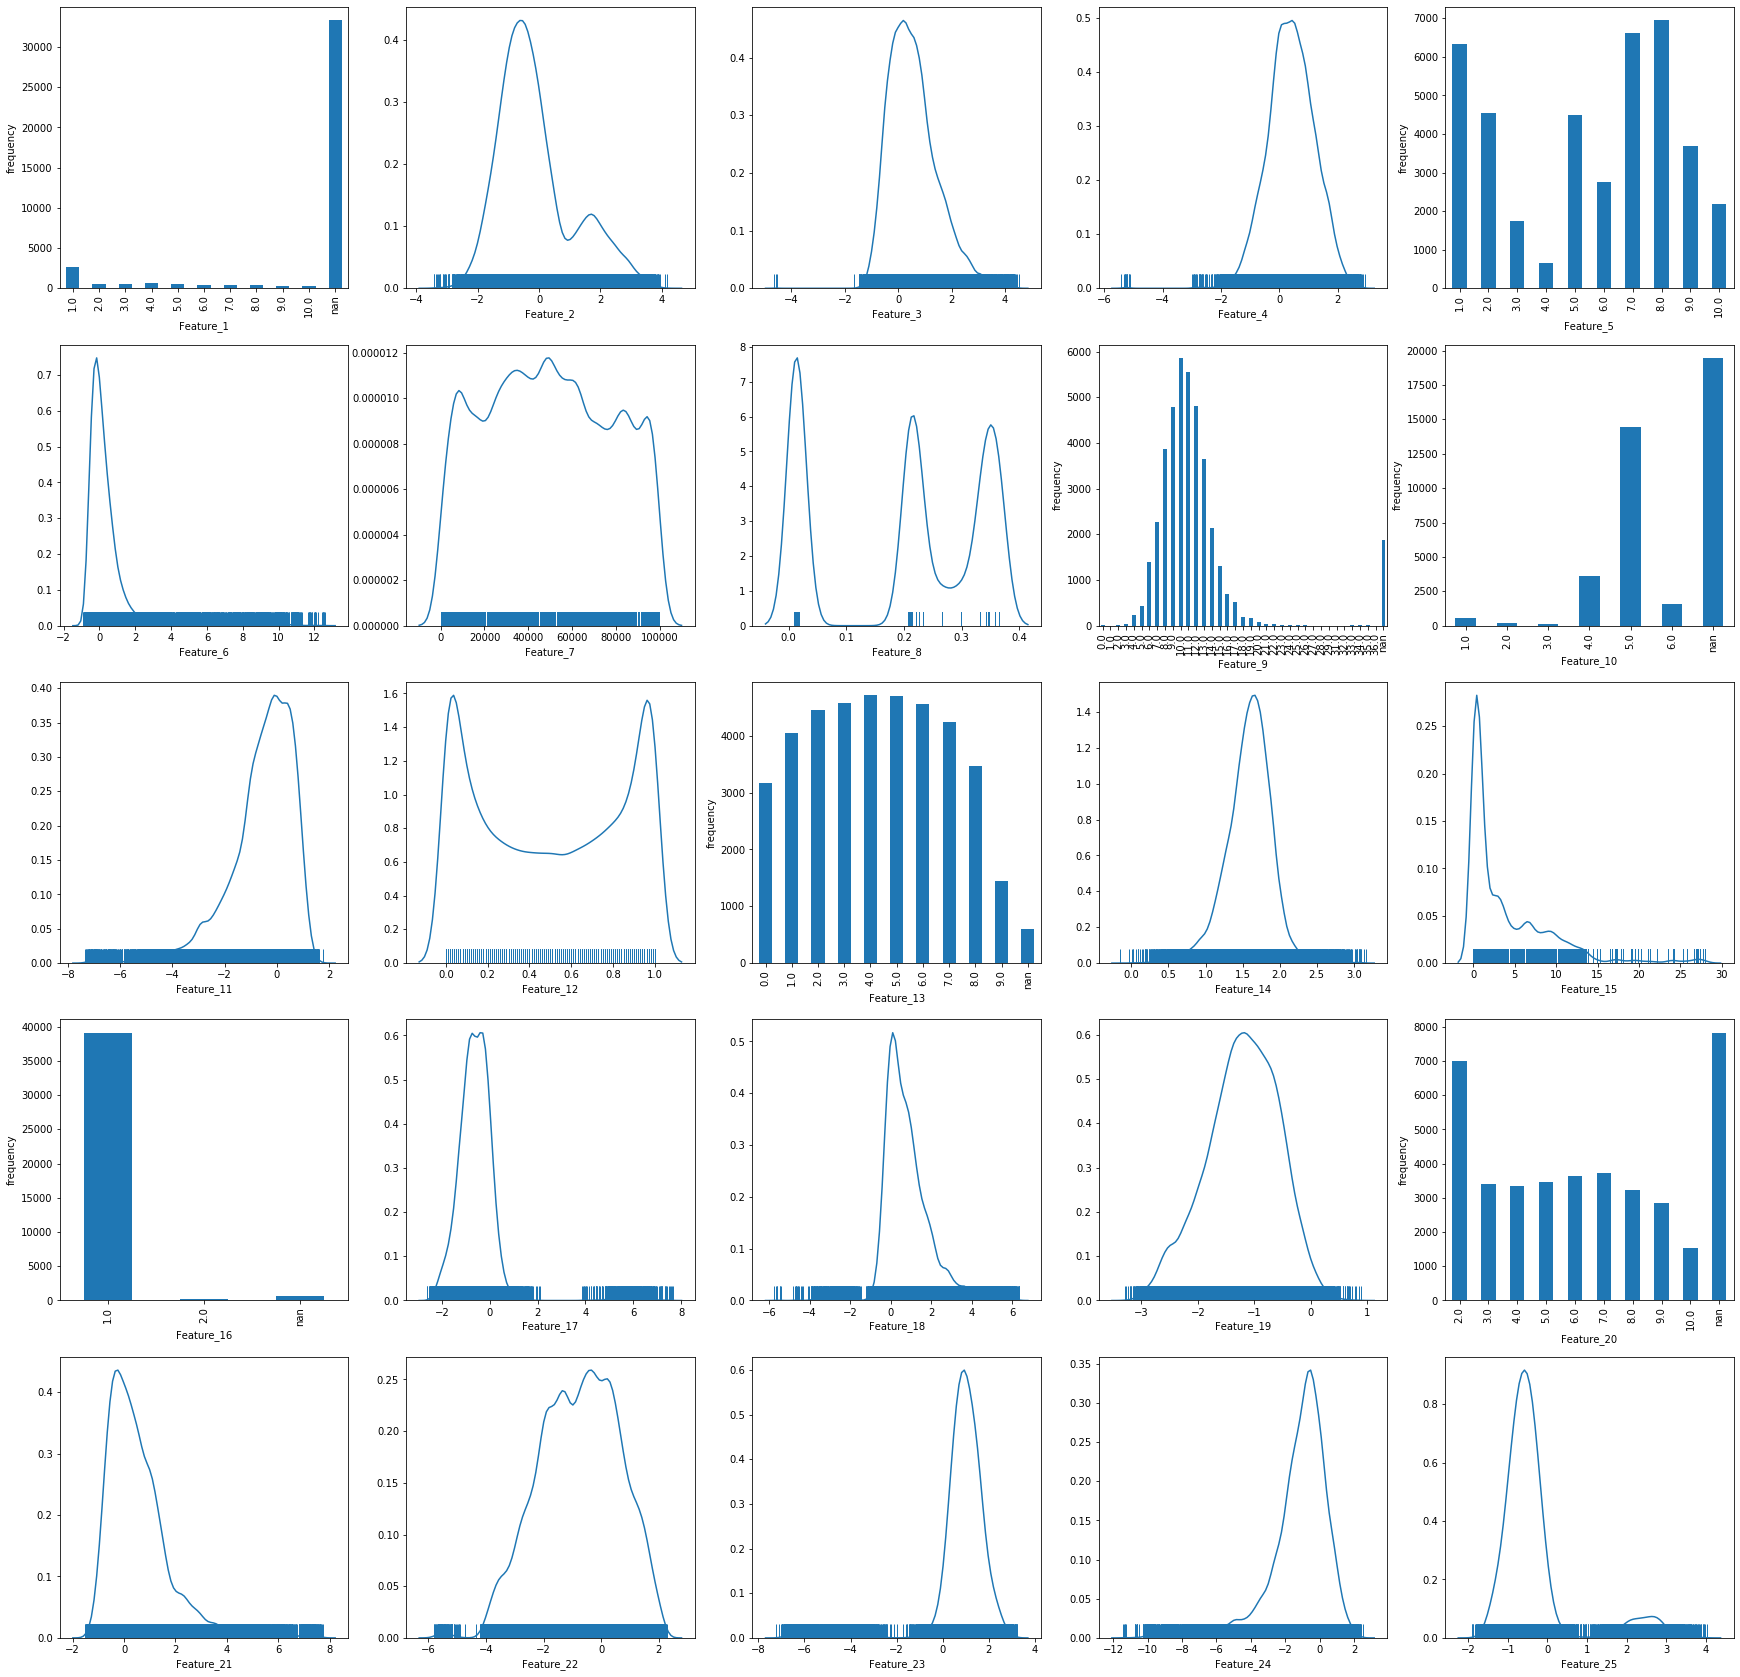

In [167]:
#pllotting distribution plots and bargraphs.
plt.figure(figsize=(30,30))
for i, col in enumerate(list(df.columns)[1:26]):
    ax2=plt.subplot(5, 5, i + 1)
    if df[col].dtype== object:
        df[col].astype(float).value_counts(dropna=False).sort_index().plot('bar');
        ax2.set( xlabel =col , ylabel="frequency")
    else:
        sns.distplot(df[col].dropna(), hist=False, rug=True);

In [168]:
# finding all float value features
df[cole]=df[cole].astype(float)
cole

['Feature_1',
 'Feature_5',
 'Feature_9',
 'Feature_10',
 'Feature_13',
 'Feature_16',
 'Feature_20']

In [169]:
#getting no. of NAN  values  from all features
df.isnull().sum()

Id                     0
Feature_1          33313
Feature_2           9146
Feature_3           1237
Feature_4           7721
Feature_5              0
Feature_6           1933
Feature_7              0
Feature_8            469
Feature_9           1875
Feature_10         19471
Feature_11           987
Feature_12          1096
Feature_13           594
Feature_14           728
Feature_15          2141
Feature_16           610
Feature_17           646
Feature_18           568
Feature_19          1190
Feature_20          7826
Feature_21          1018
Feature_22          1345
Feature_23          1711
Feature_24           726
Feature_25           655
Ret_MinusTwo           0
Ret_MinusOne           0
Ret_2               1054
Ret_3               1245
                   ...  
Ret_155                0
Ret_156                0
Ret_157                0
Ret_158                0
Ret_159                0
Ret_160                0
Ret_161                0
Ret_162                0
Ret_163                0


In [170]:
#Removing low performing features based in number of missing values
df=df.drop(columns=['Feature_1','Feature_2','Feature_4','Feature_10','Feature_20'],axis=1)

In [171]:
for x in cole:
    if x not in df.columns:
        cole.remove(x)

In [172]:
cole

['Feature_5', 'Feature_9', 'Feature_13', 'Feature_16']

In [173]:
df['Feature_16'].fillna(1.0, inplace=True)

In [174]:
for col in df.columns[1:21]:
    print(col)
    df[col]=df[col].apply(lambda x: np.random.choice(df[col].dropna().values) if math.isnan(x) else x)

Feature_3
Feature_5
Feature_6
Feature_7
Feature_8
Feature_9
Feature_11
Feature_12
Feature_13
Feature_14
Feature_15
Feature_16
Feature_17
Feature_18
Feature_19
Feature_21
Feature_22
Feature_23
Feature_24
Feature_25


In [175]:
df.isnull().sum()

Id                    0
Feature_3             0
Feature_5             0
Feature_6             0
Feature_7             0
Feature_8             0
Feature_9             0
Feature_11            0
Feature_12            0
Feature_13            0
Feature_14            0
Feature_15            0
Feature_16            0
Feature_17            0
Feature_18            0
Feature_19            0
Feature_21            0
Feature_22            0
Feature_23            0
Feature_24            0
Feature_25            0
Ret_MinusTwo          0
Ret_MinusOne          0
Ret_2              1054
Ret_3              1245
Ret_4              1202
Ret_5              1275
Ret_6              1320
Ret_7              1228
Ret_8              1210
                   ... 
Ret_155               0
Ret_156               0
Ret_157               0
Ret_158               0
Ret_159               0
Ret_160               0
Ret_161               0
Ret_162               0
Ret_163               0
Ret_164               0
Ret_165         

In [176]:
df.head()

Id  Feature_3  Feature_5  Feature_6  Feature_7  Feature_8  Feature_9  \
0   1   1.808400        8.0  -0.520355      75751     0.2254       11.0   
1   2   0.724097        3.0   0.388896      17369     0.0166       13.0   
2   3   0.739591        9.0   0.471947       8277     0.3650        9.0   
3   4   1.568248        5.0   0.120653      22508     0.2654       13.0   
4   5   2.765531        7.0   4.866985      22423     0.2138       13.0   

   Feature_11  Feature_12  Feature_13  ...   Ret_175   Ret_176   Ret_177  \
0   -0.415598        0.49         5.0  ... -0.002688  0.002246 -0.000838   
1   -0.409923        0.71         9.0  ... -0.000129  0.000123  0.000248   
2   -0.473024        0.03         6.0  ... -0.000524 -0.000394  0.000116   
3   -2.138383        0.00         6.0  ...  0.000346 -0.000090  0.000288   
4   -4.795565        0.97         5.0  ... -0.001235  0.000027  0.002449   

        Ret_178   Ret_179   Ret_180  Ret_PlusOne  Ret_PlusTwo  \
0 -6.953224e-04  0.000003 -0.001974    -0.019512     0.028846   
1  3.315418e-07  0.000003  0.000027    -0.002939    -0.010253   
2  5.322557e-04  0.000274  0.000784    -0.024791     0.015711   
3 -1.281102e-04  0.000074  0.000341    -0.005680    -0.002190   
4  8.619882e-06  0.001209 -0.000004     0.036104    -0.026552   

   Weight_Intraday  Weight_Daily  
0     1.251508e+06  1.564385e+06  
1     1.733950e+06  2.167438e+06  
2     1.529197e+06  1.911497e+06  
3     1.711569e+06  2.139462e+06  
4     1.267270e+06  1.584088e+06  

[5 rows x 206 columns]

In [177]:
df[cole]=df[cole].astype(str)

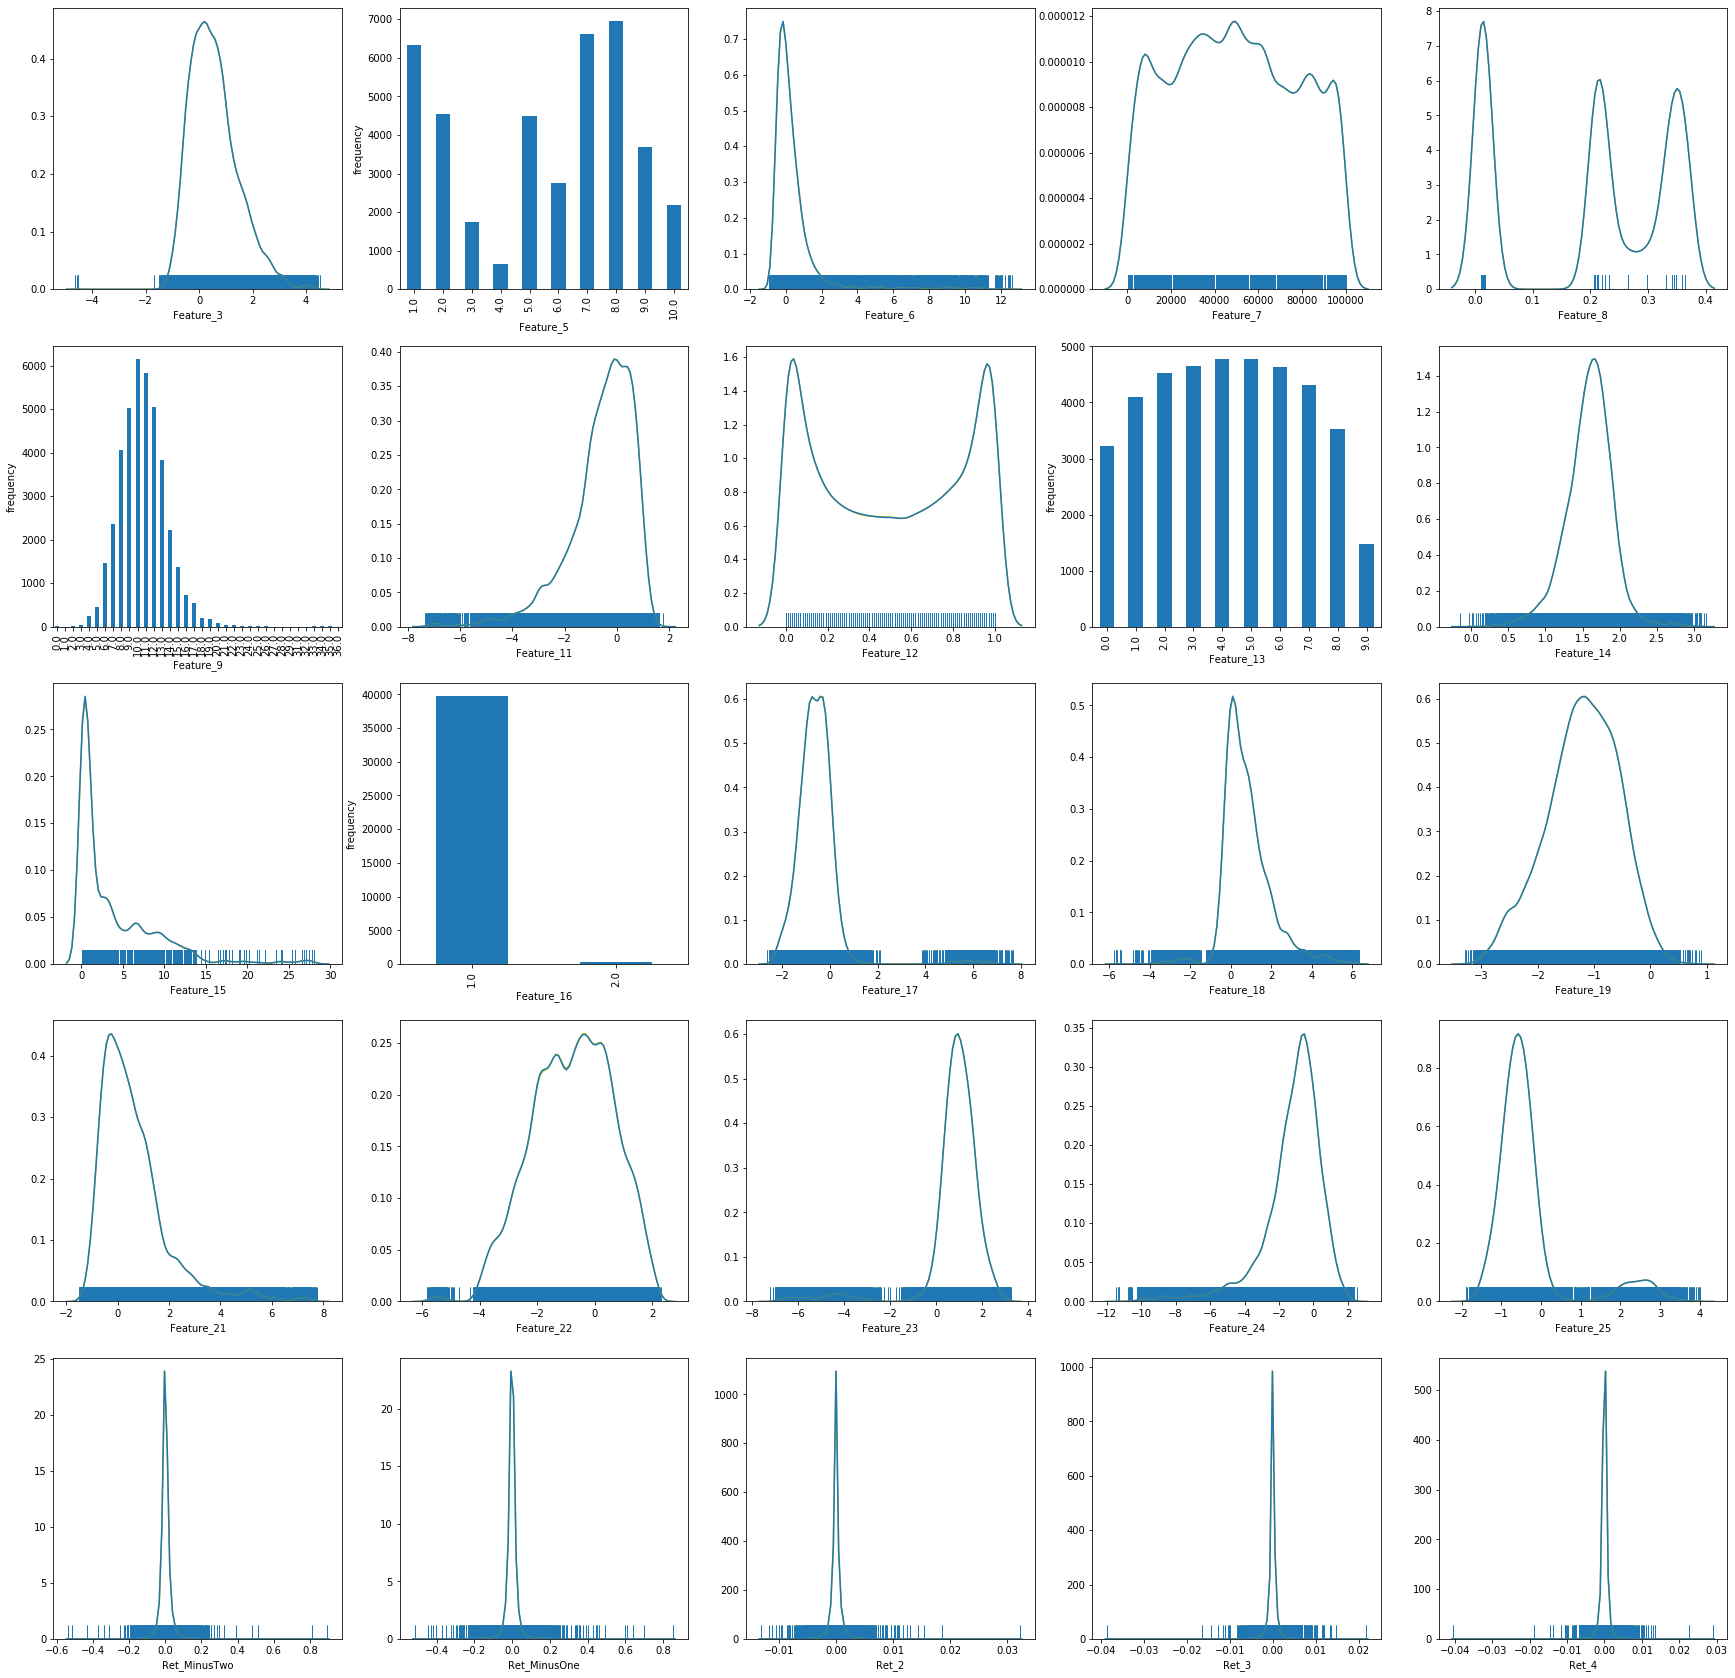

In [178]:
#pllotting distribution plots and bargraphs.
plt.figure(figsize=(30,30))
for i, col in enumerate(list(df.columns)[1:26]):
    ax2=plt.subplot(5, 5, i + 1)
    if df[col].dtype== object:
        df[col].astype(float).value_counts(dropna=False).sort_index().plot('bar');
        ax2.set( xlabel =col , ylabel="frequency")
    else:
        sns.distplot(df2[col].dropna(), hist=False, rug=True,color='y')
        sns.distplot(df[col].dropna(), hist=False, rug=True);

In [179]:
train_df =df.copy()

[19:22:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


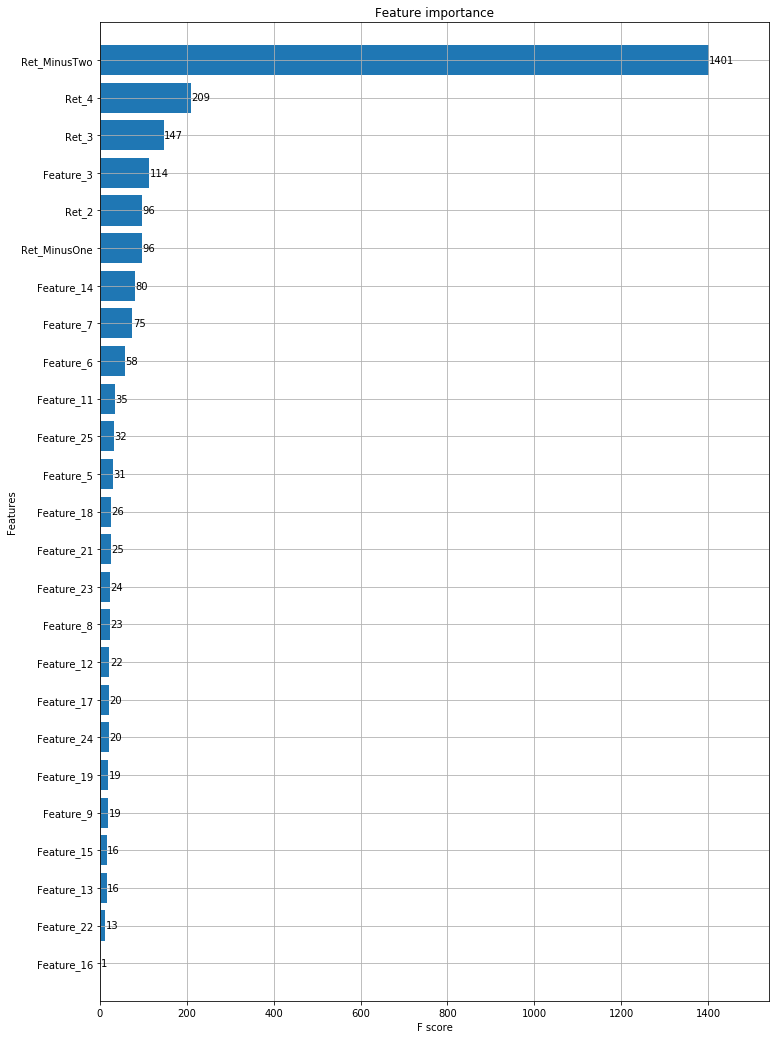

In [180]:
#getting the importance of all features using Xgboost Dmatrix
for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df.Ret_MinusTwo.values
colmn=train_df.columns[1:26]
train_X= train_df[colmn]


xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=.8, ax=ax,importance_type="gain")
plt.show()


[19:22:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


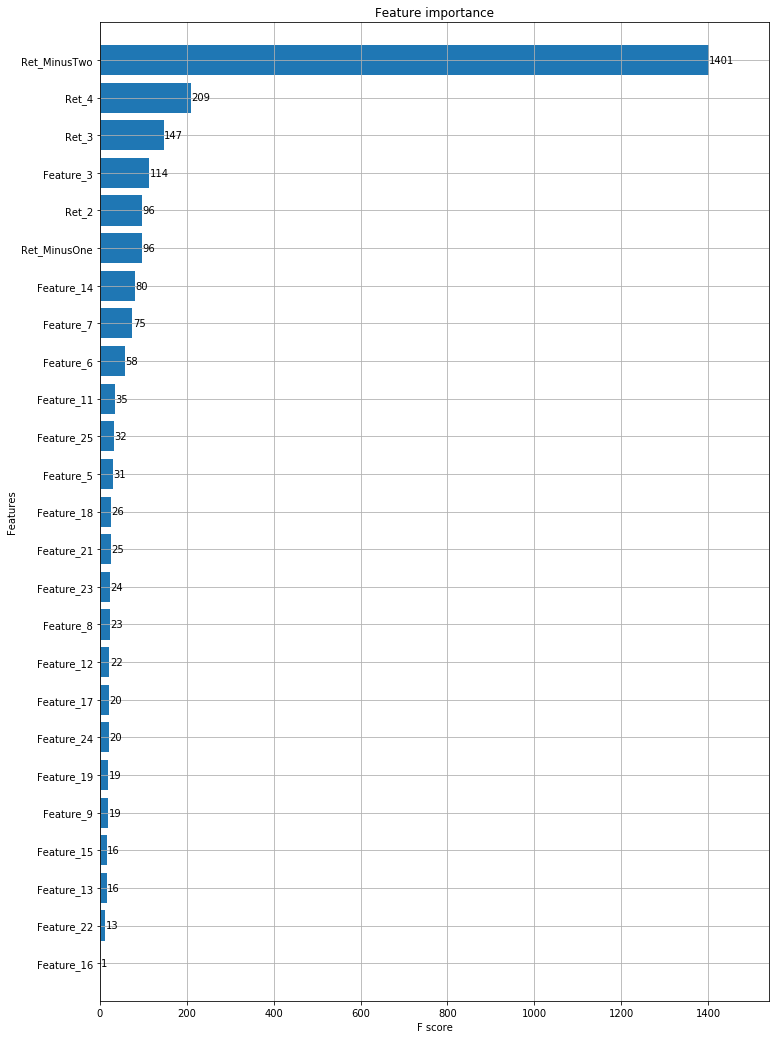

In [180]:
#getting the importance of all features using Xgboost Dmatrix
for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df.Ret_MinusTwo.values
colmn=train_df.columns[1:26]
train_X= train_df[colmn]


xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=.8, ax=ax,importance_type="weight")
plt.show()


[19:22:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


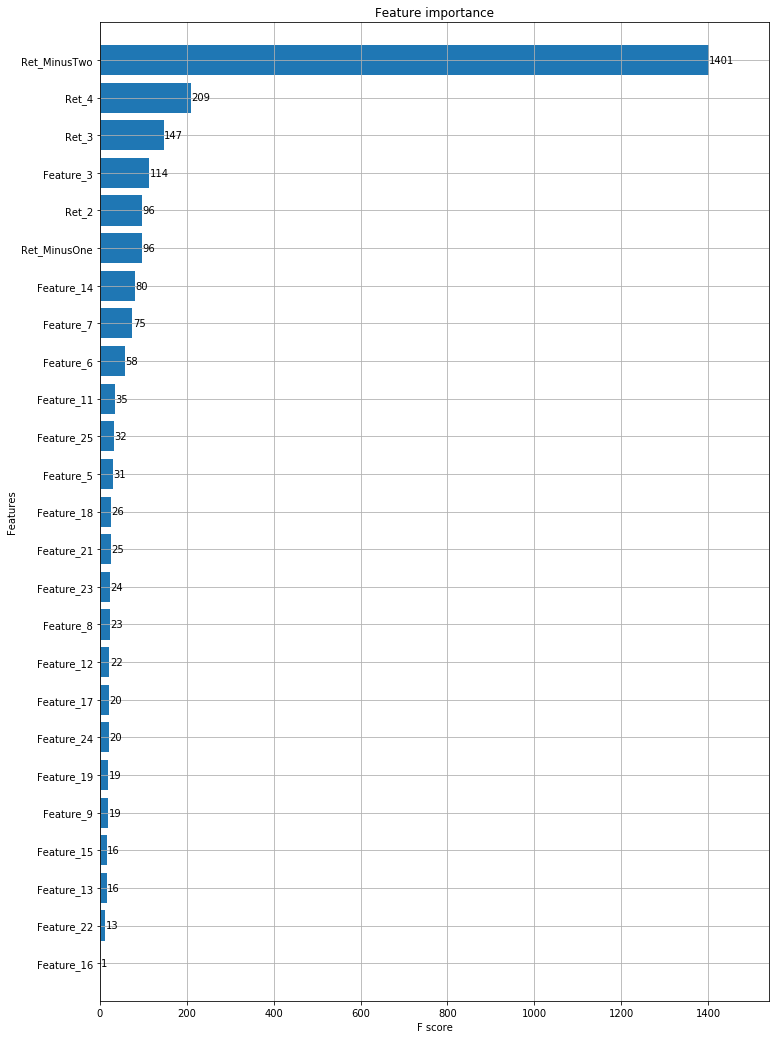

In [180]:
#getting the importance of all features using Xgboost Dmatrix
for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df.Ret_MinusTwo.values
colmn=train_df.columns[1:26]
train_X= train_df[colmn]


xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=.8, ax=ax,importance_type="cover")
plt.show()


In [181]:
df=df.drop(columns=["Feature_16","Feature_21","Feature_24"])

In [182]:
df.head()

Id  Feature_3 Feature_5  Feature_6  Feature_7  Feature_8 Feature_9  \
0   1   1.808400       8.0  -0.520355      75751     0.2254      11.0   
1   2   0.724097       3.0   0.388896      17369     0.0166      13.0   
2   3   0.739591       9.0   0.471947       8277     0.3650       9.0   
3   4   1.568248       5.0   0.120653      22508     0.2654      13.0   
4   5   2.765531       7.0   4.866985      22423     0.2138      13.0   

   Feature_11  Feature_12 Feature_13  ...   Ret_175   Ret_176   Ret_177  \
0   -0.415598        0.49        5.0  ... -0.002688  0.002246 -0.000838   
1   -0.409923        0.71        9.0  ... -0.000129  0.000123  0.000248   
2   -0.473024        0.03        6.0  ... -0.000524 -0.000394  0.000116   
3   -2.138383        0.00        6.0  ...  0.000346 -0.000090  0.000288   
4   -4.795565        0.97        5.0  ... -0.001235  0.000027  0.002449   

        Ret_178   Ret_179   Ret_180  Ret_PlusOne  Ret_PlusTwo  \
0 -6.953224e-04  0.000003 -0.001974    -0.019512     0.028846   
1  3.315418e-07  0.000003  0.000027    -0.002939    -0.010253   
2  5.322557e-04  0.000274  0.000784    -0.024791     0.015711   
3 -1.281102e-04  0.000074  0.000341    -0.005680    -0.002190   
4  8.619882e-06  0.001209 -0.000004     0.036104    -0.026552   

   Weight_Intraday  Weight_Daily  
0     1.251508e+06  1.564385e+06  
1     1.733950e+06  2.167438e+06  
2     1.529197e+06  1.911497e+06  
3     1.711569e+06  2.139462e+06  
4     1.267270e+06  1.584088e+06  

[5 rows x 203 columns]

In [183]:
df.to_csv(r'D:/Acads/summers2019/IME672/Project/Dataset/train_prepros1.csv')

In [2]:
df=pd.read_csv("D:/Acads/summers2019/IME672/Project/Dataset/train_prepros1.csv",index_col=0)# loading the dataset

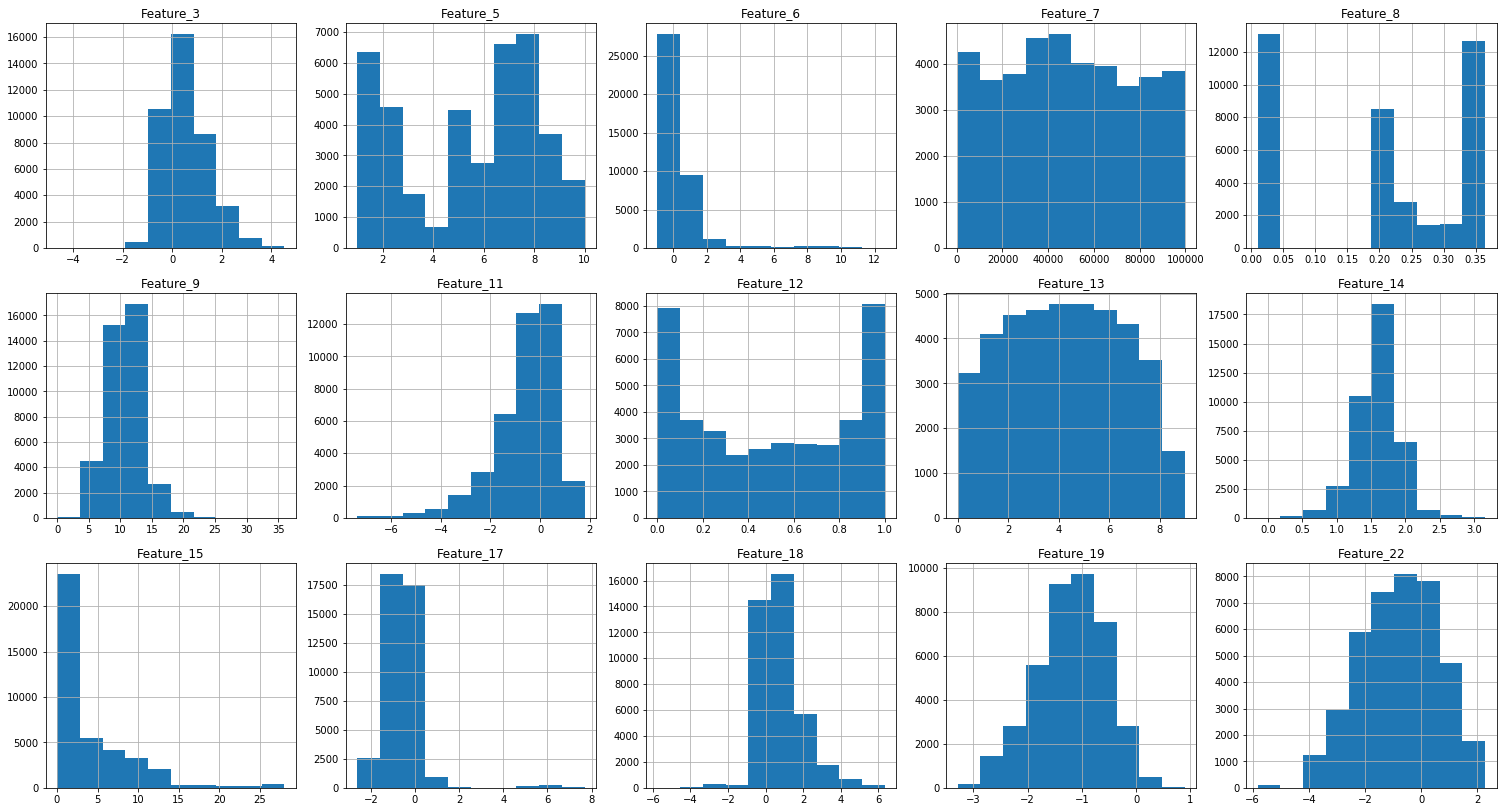

In [185]:
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(df.columns)[1:16]):
    plt.subplot(5, 5, i + 1)
    df[col].hist()
    plt.title(col)

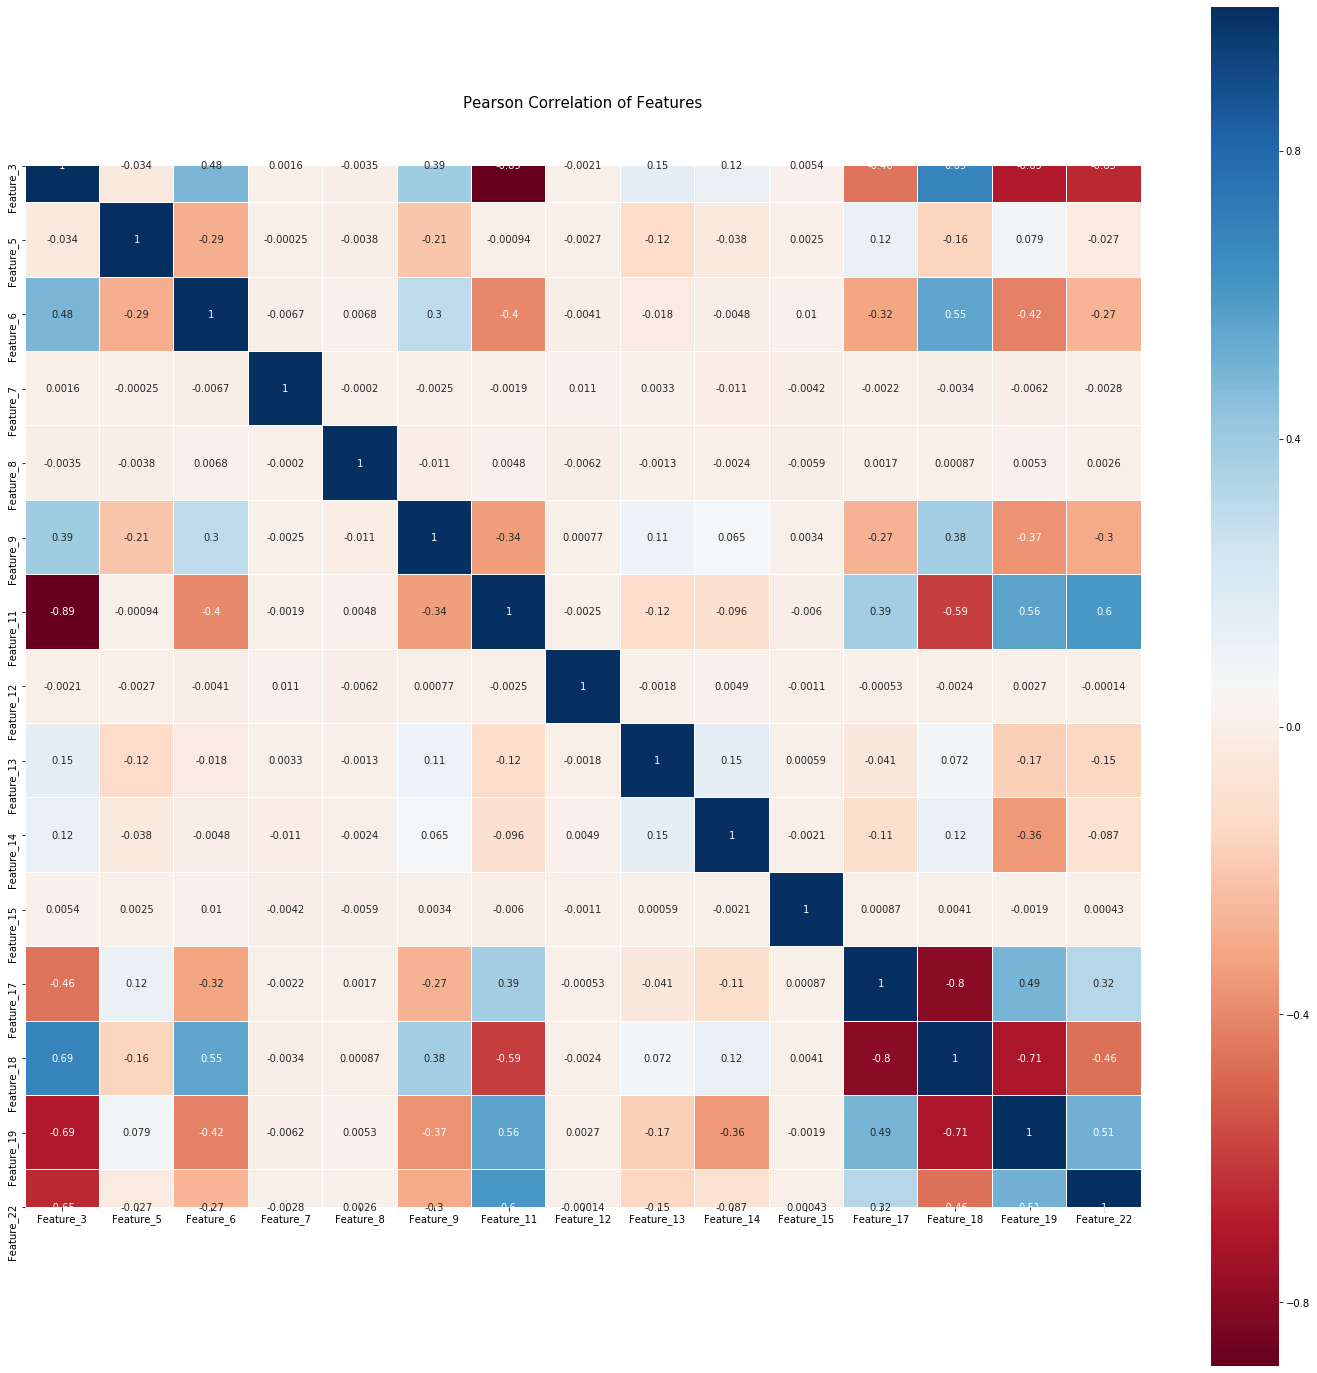

In [186]:
colormap = plt.cm.RdBu
plt.figure(figsize=(25,25))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df[df.columns[1:16]].corr(),linewidths=.1,vmax=1,
            square=True, cmap=colormap, linecolor='white', annot=True)

In [3]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
df=df.drop(df[to_drop[1:-1]], axis=1)
to_drop[1:-1]

['Feature_18']

In [4]:
df.isnull().sum()

Id                    0
Feature_3             0
Feature_5             0
Feature_6             0
Feature_7             0
Feature_8             0
Feature_9             0
Feature_11            0
Feature_12            0
Feature_13            0
Feature_14            0
Feature_15            0
Feature_17            0
Feature_19            0
Feature_22            0
Feature_23            0
Feature_25            0
Ret_MinusTwo          0
Ret_MinusOne          0
Ret_2              1054
Ret_3              1245
Ret_4              1202
Ret_5              1275
Ret_6              1320
Ret_7              1228
Ret_8              1210
Ret_9              1317
Ret_10             1313
Ret_11             1369
Ret_12             1238
                   ... 
Ret_155               0
Ret_156               0
Ret_157               0
Ret_158               0
Ret_159               0
Ret_160               0
Ret_161               0
Ret_162               0
Ret_163               0
Ret_164               0
Ret_165         

In [189]:
for i, col in enumerate(list(df.columns)[1:200]):
        df[col].fillna(df[col].mean(), inplace=True)


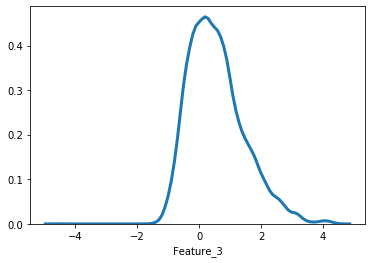

In [190]:
sns.distplot(df.Feature_3, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},)

In [191]:
df.isnull().sum()

Id                 0
Feature_3          0
Feature_5          0
Feature_6          0
Feature_7          0
Feature_8          0
Feature_9          0
Feature_11         0
Feature_12         0
Feature_13         0
Feature_14         0
Feature_15         0
Feature_17         0
Feature_19         0
Feature_22         0
Feature_23         0
Feature_25         0
Ret_MinusTwo       0
Ret_MinusOne       0
Ret_2              0
Ret_3              0
Ret_4              0
Ret_5              0
Ret_6              0
Ret_7              0
Ret_8              0
Ret_9              0
Ret_10             0
Ret_11             0
Ret_12             0
                  ..
Ret_155            0
Ret_156            0
Ret_157            0
Ret_158            0
Ret_159            0
Ret_160            0
Ret_161            0
Ret_162            0
Ret_163            0
Ret_164            0
Ret_165            0
Ret_166            0
Ret_167            0
Ret_168            0
Ret_169            0
Ret_170            0
Ret_171      

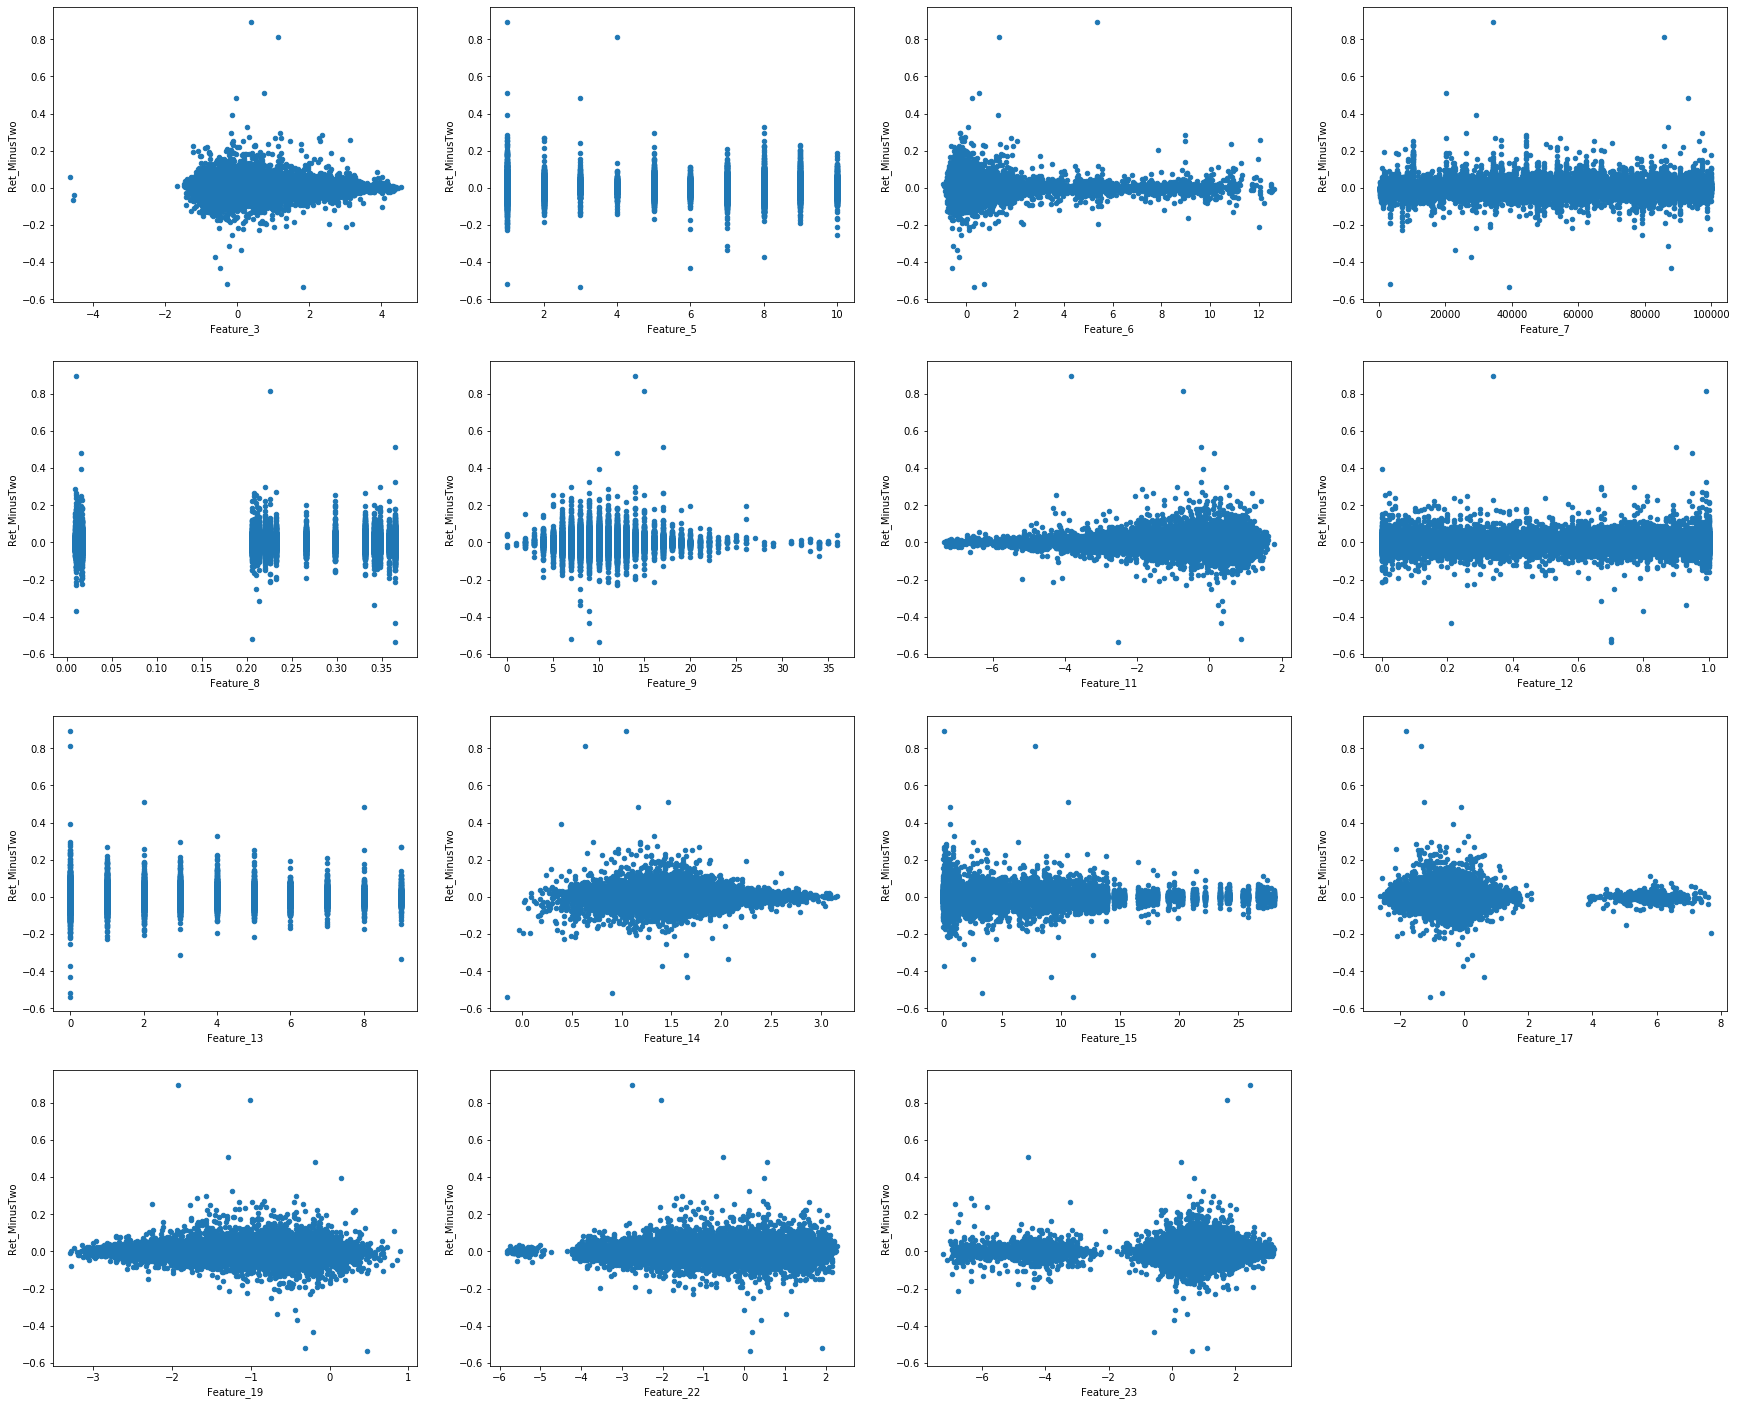

In [192]:
for i, col in enumerate(list(df.columns)[1:16]):
    ax1=plt.subplot(4, 4, i + 1)
    df.plot.scatter(x=col, y='Ret_MinusTwo',figsize=(30,25),ax=ax1);
    

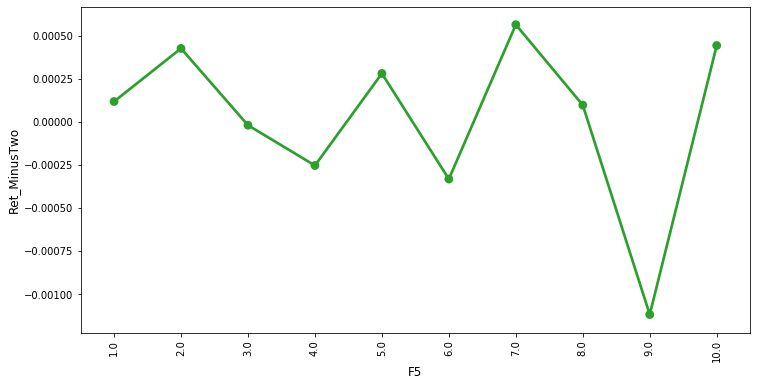

In [193]:
grouped_df = df.groupby('Feature_5')['Ret_MinusTwo'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,6))
sns.pointplot(grouped_df.Feature_5.values, grouped_df.Ret_MinusTwo.values, alpha=0.8, color=color[2])
plt.ylabel('Ret_MinusTwo', fontsize=12)
plt.xlabel('F5', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [194]:
x=df[df.columns[1:16]].sample(n=200).values
x = preprocessing.StandardScaler().fit_transform(x)

In [195]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

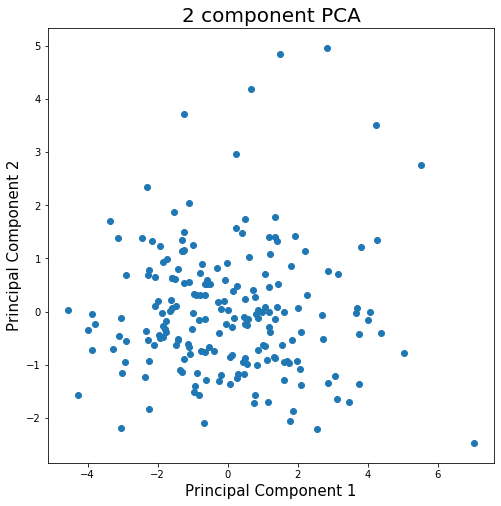

In [196]:
finalDf=principalDf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'])

Text(0.5, 0, 'PC3')

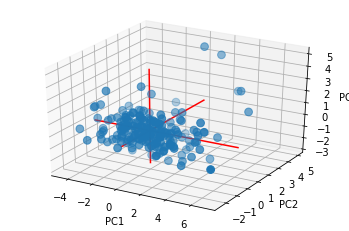

In [197]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'],finalDf['principal component 3'], cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(finalDf['principal component 1']), max(finalDf['principal component 1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(finalDf['principal component 2']), max(finalDf['principal component 2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(finalDf['principal component 3']), max(finalDf['principal component 3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


In [198]:
df.loc(1:16)

SyntaxError: invalid syntax (<ipython-input-198-4207c0b505c9>, line 1)

In [ ]:
# km = KMeans(
#     n_clusters=12, init='random',
#     n_init=2, max_iter=300, 
#     tol=1e-04, random_state=0
# )
# y_km = km.fit_predict(df[1:16])

In [200]:
major_list = []

training_csv = df
testing_csv = pd.read_csv("D:/Acads/summers2019/IME672/Project/Dataset/test_2.csv")# loading the dataset

In [201]:
testing_csv.head()

Id  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1        1.0   1.412783  -0.056284        NaN       10.0   0.413226   
1   2        NaN        NaN   0.907973   1.002425        7.0  -0.257825   
2   3        NaN  -0.607583   1.076668   0.517865        5.0   0.947340   
3   4        NaN   2.230240   0.223222        NaN        1.0        NaN   
4   5        NaN   0.360399   0.597896  -0.145497       10.0   0.275744   

   Feature_7  Feature_8  Feature_9  ...   Ret_111   Ret_112   Ret_113  \
0      18871     0.2138       11.0  ...  0.000370 -0.000762       NaN   
1       5852     0.2138       13.0  ...  0.000457  0.000003 -0.000007   
2      76935     0.0105       10.0  ...  0.000003  0.000157 -0.000181   
3      84573     0.3318       13.0  ...  0.000010 -0.000792 -0.000479   
4      89615     0.0099        8.0  ...  0.000447  0.000489 -0.000233   

    Ret_114   Ret_115   Ret_116   Ret_117   Ret_118   Ret_119   Ret_120  
0  0.000366 -0.002444 -0.001301 -0.000917  0.000762 -0.000556  0.000759  
1 -0.000003 -0.000012 -0.000463 -0.000003 -0.000002  0.000468 -0.000012  
2  0.000003       NaN  0.000164  0.000353  0.000704 -0.000168 -0.000006  
3  0.000017  0.000170 -0.001079  0.000320  0.000006  0.001392 -0.001850  
4 -0.000495  0.000057 -0.000050 -0.000011 -0.000377  0.000227 -0.000114  

[5 rows x 147 columns]

In [202]:
training_csv.columns[0:25]

Index(['Id', 'Feature_3', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_17', 'Feature_19', 'Feature_22', 'Feature_23',
       'Feature_25', 'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_2', 'Ret_3', 'Ret_4',
       'Ret_5', 'Ret_6', 'Ret_7'],
      dtype='object')

In [203]:
training_csv.head()
testing_csv=testing_csv.drop(columns=['Feature_1','Feature_2','Feature_4','Feature_10','Feature_20','Feature_16','Feature_21','Feature_24','Feature_18'])
testing_csv.columns[0:25]

Index(['Id', 'Feature_3', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_17', 'Feature_19', 'Feature_22', 'Feature_23',
       'Feature_25', 'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_2', 'Ret_3', 'Ret_4',
       'Ret_5', 'Ret_6', 'Ret_7'],
      dtype='object')

In [204]:
trainval=training_csv.copy()
split=np.random.rand(trainval.shape[0])>0.8
train=trainval[split==False]
val=trainval[split==True]
test=val
score=0

In [60]:
for col in  list(trainval.columns[138:200]):
    if 'Ret_Plus' in col:
        weight = 'Weight_Daily'
    else:
        weight = 'Weight_Intraday'
    traindat = train.drop(columns=train.columns[138:]).values 
    traintar = train[col].values
    testdat  = test.drop(columns=train.columns[138:]).values
    testtar = test[col].values
    
    data_train = xgb.DMatrix(traindat,label=traintar,missing=np.NaN,weight = train[weight])
    data_test = xgb.DMatrix(testdat,label=testtar,missing=np.NaN,weight = test[weight])
    model_params ={'max_depth' : 10, 'eta': 0.1, 'silent': 1 , 'gamma': 0, 'lambda' :500,'alpha' : 400}
    number_of_rounds=500
    
    watchlist = [(data_test, 'eval'),(data_train, 'train')]
    bst = xgb.train(model_params, data_train, number_of_rounds, watchlist, early_stopping_rounds=10)
    preds = bst.predict(data_test)
    labels = data_test.get_label()
    X = np.mean(test[weight] * np.abs(preds - labels))
    print(round(X))
    score+=X
print('Final score is {}'.format(score))

C:\Users\purug\Anaconda3\envs\Winton\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\purug\Anaconda3\envs\Winton\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [63]:
labels = data_test.get_label()
labels

array([-0.0247547 ,  0.03560437,  0.00460197, ...,  0.00085894,
       -0.00042765, -0.01157182], dtype=float32)

In [192]:
for Number in range(1,62+1): # From 1 to 62

    if Number == 61:
        name_of_column = 'Ret_PlusOne'
        name_of_weight = 'Weight_Daily'
    elif Number == 62:
        name_of_column = 'Ret_PlusTwo'
        name_of_weight = 'Weight_Daily'
    else:
        name_of_column = 'Ret_'+str(Number+120)
        name_of_weight = 'Weight_Intraday'


    train_targets = training_csv[name_of_column].values
    train_weights = training_csv[name_of_weight].values
    training_data = training_csv.drop(training_csv.columns[range(138, 202)], axis=1)
    training_data = training_data.values
    testing_data = testing_csv.values

    data_train = xgb.DMatrix(training_data, label=train_targets, missing=np.NaN, weight=train_weights)
    data_test = xgb.DMatrix(testing_data, missing=np.NaN)

    model_parameters = {'max_depth': 10, 'eta': 0.1, 'silent': 1, 'gamma': 0, 'lambda': 500, 'alpha': 400}
    number_of_rounds = 500

    watchlist = [(data_train, 'train')]
    bst = xgb.train(model_parameters, data_train, number_of_rounds, watchlist, early_stopping_rounds=10)
    print(Number)
    predictions = bst.predict(data_test)
    for ID, P in enumerate(predictions):
        major_list.append({'Id': str(ID+1)+'_'+str(Number), 'Predicted': P})

[0]	train-rmse:0.450027
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405025
[2]	train-rmse:0.364522
[3]	train-rmse:0.32807
[4]	train-rmse:0.295264
[5]	train-rmse:0.265738
[6]	train-rmse:0.239164
[7]	train-rmse:0.215248
[8]	train-rmse:0.193724
[9]	train-rmse:0.174352
[10]	train-rmse:0.156917
[11]	train-rmse:0.141226
[12]	train-rmse:0.127104
[13]	train-rmse:0.114395
[14]	train-rmse:0.102956
[15]	train-rmse:0.092661
[16]	train-rmse:0.083396
[17]	train-rmse:0.075057
[18]	train-rmse:0.067553
[19]	train-rmse:0.060799
[20]	train-rmse:0.05472
[21]	train-rmse:0.049249
[22]	train-rmse:0.044326
[23]	train-rmse:0.039895
[24]	train-rmse:0.035907
[25]	train-rmse:0.032319
[26]	train-rmse:0.029089
[27]	train-rmse:0.026182
[28]	train-rmse:0.023567
[29]	train-rmse:0.021213
[30]	train-rmse:0.019094
[31]	train-rmse:0.017188
[32]	train-rmse:0.015473
[33]	train-rmse:0.013929
[34]	train-rmse:0.01254
[35]	train-rmse:0.011291
[36]	train-rmse:0.010167
[37]	train-rmse:0.009155
[38]	

[322]	train-rmse:4.8e-05
[323]	train-rmse:4.7e-05
[324]	train-rmse:4.7e-05
[325]	train-rmse:4.7e-05
[326]	train-rmse:4.6e-05
[327]	train-rmse:4.6e-05
[328]	train-rmse:4.6e-05
[329]	train-rmse:4.5e-05
[330]	train-rmse:4.5e-05
[331]	train-rmse:4.5e-05
[332]	train-rmse:4.4e-05
[333]	train-rmse:4.4e-05
[334]	train-rmse:4.4e-05
[335]	train-rmse:4.4e-05
[336]	train-rmse:4.3e-05
[337]	train-rmse:4.3e-05
[338]	train-rmse:4.3e-05
[339]	train-rmse:4.3e-05
[340]	train-rmse:4.2e-05
[341]	train-rmse:4.2e-05
[342]	train-rmse:4.1e-05
[343]	train-rmse:4.1e-05
[344]	train-rmse:4.1e-05
[345]	train-rmse:4e-05
[346]	train-rmse:4e-05
[347]	train-rmse:4e-05
[348]	train-rmse:3.9e-05
[349]	train-rmse:3.9e-05
[350]	train-rmse:3.9e-05
[351]	train-rmse:3.9e-05
[352]	train-rmse:3.8e-05
[353]	train-rmse:3.8e-05
[354]	train-rmse:3.7e-05
[355]	train-rmse:3.7e-05
[356]	train-rmse:3.7e-05
[357]	train-rmse:3.6e-05
[358]	train-rmse:3.6e-05
[359]	train-rmse:3.6e-05
[360]	train-rmse:3.5e-05
[361]	train-rmse:3.5e-05
[362]	

[158]	train-rmse:0.000187
[159]	train-rmse:0.000186
[160]	train-rmse:0.000185
[161]	train-rmse:0.000182
[162]	train-rmse:0.000181
[163]	train-rmse:0.00018
[164]	train-rmse:0.000179
[165]	train-rmse:0.000177
[166]	train-rmse:0.000177
[167]	train-rmse:0.000175
[168]	train-rmse:0.000174
[169]	train-rmse:0.000173
[170]	train-rmse:0.000171
[171]	train-rmse:0.00017
[172]	train-rmse:0.000169
[173]	train-rmse:0.000167
[174]	train-rmse:0.000165
[175]	train-rmse:0.000164
[176]	train-rmse:0.000162
[177]	train-rmse:0.00016
[178]	train-rmse:0.000158
[179]	train-rmse:0.000157
[180]	train-rmse:0.000155
[181]	train-rmse:0.000154
[182]	train-rmse:0.000152
[183]	train-rmse:0.000151
[184]	train-rmse:0.00015
[185]	train-rmse:0.000149
[186]	train-rmse:0.000147
[187]	train-rmse:0.000146
[188]	train-rmse:0.000145
[189]	train-rmse:0.000144
[190]	train-rmse:0.000144
[191]	train-rmse:0.000143
[192]	train-rmse:0.000142
[193]	train-rmse:0.000142
[194]	train-rmse:0.00014
[195]	train-rmse:0.000139
[196]	train-rmse:

[486]	train-rmse:1.4e-05
[487]	train-rmse:1.4e-05
[488]	train-rmse:1.4e-05
Stopping. Best iteration:
[478]	train-rmse:1.4e-05

2
[0]	train-rmse:0.450009
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405008
[2]	train-rmse:0.364508
[3]	train-rmse:0.328057
[4]	train-rmse:0.295252
[5]	train-rmse:0.265727
[6]	train-rmse:0.239155
[7]	train-rmse:0.21524
[8]	train-rmse:0.193716
[9]	train-rmse:0.174345
[10]	train-rmse:0.156911
[11]	train-rmse:0.141221
[12]	train-rmse:0.127099
[13]	train-rmse:0.11439
[14]	train-rmse:0.102952
[15]	train-rmse:0.092658
[16]	train-rmse:0.083393
[17]	train-rmse:0.075055
[18]	train-rmse:0.06755
[19]	train-rmse:0.060797
[20]	train-rmse:0.054718
[21]	train-rmse:0.049248
[22]	train-rmse:0.044325
[23]	train-rmse:0.039894
[24]	train-rmse:0.035907
[25]	train-rmse:0.032318
[26]	train-rmse:0.029088
[27]	train-rmse:0.026182
[28]	train-rmse:0.023566
[29]	train-rmse:0.021213
[30]	train-rmse:0.019095
[31]	train-rmse:0.017188
[32]	train-rmse:0.015473
[

[317]	train-rmse:5.9e-05
[318]	train-rmse:5.9e-05
[319]	train-rmse:5.8e-05
[320]	train-rmse:5.8e-05
[321]	train-rmse:5.7e-05
[322]	train-rmse:5.6e-05
[323]	train-rmse:5.6e-05
[324]	train-rmse:5.6e-05
[325]	train-rmse:5.5e-05
[326]	train-rmse:5.5e-05
[327]	train-rmse:5.5e-05
[328]	train-rmse:5.4e-05
[329]	train-rmse:5.4e-05
[330]	train-rmse:5.3e-05
[331]	train-rmse:5.3e-05
[332]	train-rmse:5.3e-05
[333]	train-rmse:5.2e-05
[334]	train-rmse:5.1e-05
[335]	train-rmse:5.1e-05
[336]	train-rmse:5.1e-05
[337]	train-rmse:5e-05
[338]	train-rmse:5e-05
[339]	train-rmse:4.9e-05
[340]	train-rmse:4.9e-05
[341]	train-rmse:4.8e-05
[342]	train-rmse:4.8e-05
[343]	train-rmse:4.7e-05
[344]	train-rmse:4.7e-05
[345]	train-rmse:4.7e-05
[346]	train-rmse:4.6e-05
[347]	train-rmse:4.6e-05
[348]	train-rmse:4.5e-05
[349]	train-rmse:4.5e-05
[350]	train-rmse:4.5e-05
[351]	train-rmse:4.4e-05
[352]	train-rmse:4.4e-05
[353]	train-rmse:4.4e-05
[354]	train-rmse:4.4e-05
[355]	train-rmse:4.3e-05
[356]	train-rmse:4.3e-05
[357

[143]	train-rmse:0.000239
[144]	train-rmse:0.000235
[145]	train-rmse:0.000234
[146]	train-rmse:0.000232
[147]	train-rmse:0.000229
[148]	train-rmse:0.000227
[149]	train-rmse:0.000226
[150]	train-rmse:0.000224
[151]	train-rmse:0.000224
[152]	train-rmse:0.000222
[153]	train-rmse:0.00022
[154]	train-rmse:0.000217
[155]	train-rmse:0.000216
[156]	train-rmse:0.000213
[157]	train-rmse:0.000211
[158]	train-rmse:0.000208
[159]	train-rmse:0.000207
[160]	train-rmse:0.000206
[161]	train-rmse:0.000203
[162]	train-rmse:0.0002
[163]	train-rmse:0.000199
[164]	train-rmse:0.000197
[165]	train-rmse:0.000196
[166]	train-rmse:0.000194
[167]	train-rmse:0.000192
[168]	train-rmse:0.00019
[169]	train-rmse:0.000187
[170]	train-rmse:0.000186
[171]	train-rmse:0.000185
[172]	train-rmse:0.000183
[173]	train-rmse:0.00018
[174]	train-rmse:0.000179
[175]	train-rmse:0.000177
[176]	train-rmse:0.000177
[177]	train-rmse:0.000176
[178]	train-rmse:0.000173
[179]	train-rmse:0.000172
[180]	train-rmse:0.000171
[181]	train-rmse:

[470]	train-rmse:1.7e-05
[471]	train-rmse:1.6e-05
[472]	train-rmse:1.6e-05
[473]	train-rmse:1.6e-05
[474]	train-rmse:1.6e-05
[475]	train-rmse:1.6e-05
[476]	train-rmse:1.6e-05
[477]	train-rmse:1.6e-05
[478]	train-rmse:1.6e-05
[479]	train-rmse:1.6e-05
[480]	train-rmse:1.6e-05
[481]	train-rmse:1.6e-05
Stopping. Best iteration:
[471]	train-rmse:1.6e-05

4
[0]	train-rmse:0.450009
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405008
[2]	train-rmse:0.364508
[3]	train-rmse:0.328057
[4]	train-rmse:0.295252
[5]	train-rmse:0.265727
[6]	train-rmse:0.239155
[7]	train-rmse:0.21524
[8]	train-rmse:0.193716
[9]	train-rmse:0.174345
[10]	train-rmse:0.156911
[11]	train-rmse:0.141221
[12]	train-rmse:0.127099
[13]	train-rmse:0.11439
[14]	train-rmse:0.102952
[15]	train-rmse:0.092657
[16]	train-rmse:0.083393
[17]	train-rmse:0.075054
[18]	train-rmse:0.06755
[19]	train-rmse:0.060796
[20]	train-rmse:0.054718
[21]	train-rmse:0.049248
[22]	train-rmse:0.044324
[23]	train-rmse:0.039894
[

[308]	train-rmse:6e-05
[309]	train-rmse:5.9e-05
[310]	train-rmse:5.8e-05
[311]	train-rmse:5.8e-05
[312]	train-rmse:5.7e-05
[313]	train-rmse:5.7e-05
[314]	train-rmse:5.7e-05
[315]	train-rmse:5.6e-05
[316]	train-rmse:5.5e-05
[317]	train-rmse:5.5e-05
[318]	train-rmse:5.4e-05
[319]	train-rmse:5.4e-05
[320]	train-rmse:5.3e-05
[321]	train-rmse:5.2e-05
[322]	train-rmse:5.2e-05
[323]	train-rmse:5.2e-05
[324]	train-rmse:5.1e-05
[325]	train-rmse:5.1e-05
[326]	train-rmse:5e-05
[327]	train-rmse:5e-05
[328]	train-rmse:4.9e-05
[329]	train-rmse:4.9e-05
[330]	train-rmse:4.8e-05
[331]	train-rmse:4.8e-05
[332]	train-rmse:4.8e-05
[333]	train-rmse:4.7e-05
[334]	train-rmse:4.7e-05
[335]	train-rmse:4.7e-05
[336]	train-rmse:4.6e-05
[337]	train-rmse:4.6e-05
[338]	train-rmse:4.6e-05
[339]	train-rmse:4.5e-05
[340]	train-rmse:4.5e-05
[341]	train-rmse:4.5e-05
[342]	train-rmse:4.4e-05
[343]	train-rmse:4.4e-05
[344]	train-rmse:4.3e-05
[345]	train-rmse:4.3e-05
[346]	train-rmse:4.3e-05
[347]	train-rmse:4.2e-05
[348]	

[158]	train-rmse:0.000245
[159]	train-rmse:0.000244
[160]	train-rmse:0.000241
[161]	train-rmse:0.00024
[162]	train-rmse:0.000238
[163]	train-rmse:0.000237
[164]	train-rmse:0.000233
[165]	train-rmse:0.000231
[166]	train-rmse:0.00023
[167]	train-rmse:0.000226
[168]	train-rmse:0.000223
[169]	train-rmse:0.000221
[170]	train-rmse:0.000218
[171]	train-rmse:0.000215
[172]	train-rmse:0.000213
[173]	train-rmse:0.000211
[174]	train-rmse:0.000209
[175]	train-rmse:0.000208
[176]	train-rmse:0.000206
[177]	train-rmse:0.000205
[178]	train-rmse:0.000202
[179]	train-rmse:0.000201
[180]	train-rmse:0.000198
[181]	train-rmse:0.000196
[182]	train-rmse:0.000195
[183]	train-rmse:0.000192
[184]	train-rmse:0.000189
[185]	train-rmse:0.000187
[186]	train-rmse:0.000185
[187]	train-rmse:0.000183
[188]	train-rmse:0.000181
[189]	train-rmse:0.000179
[190]	train-rmse:0.000178
[191]	train-rmse:0.000177
[192]	train-rmse:0.000175
[193]	train-rmse:0.000175
[194]	train-rmse:0.000172
[195]	train-rmse:0.00017
[196]	train-rms

[485]	train-rmse:1.7e-05
[486]	train-rmse:1.7e-05
[487]	train-rmse:1.7e-05
[488]	train-rmse:1.7e-05
[489]	train-rmse:1.7e-05
[490]	train-rmse:1.7e-05
[491]	train-rmse:1.6e-05
[492]	train-rmse:1.6e-05
[493]	train-rmse:1.6e-05
[494]	train-rmse:1.6e-05
[495]	train-rmse:1.6e-05
[496]	train-rmse:1.6e-05
[497]	train-rmse:1.6e-05
[498]	train-rmse:1.6e-05
[499]	train-rmse:1.6e-05
6
[0]	train-rmse:0.44999
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.404991
[2]	train-rmse:0.364492
[3]	train-rmse:0.328043
[4]	train-rmse:0.295239
[5]	train-rmse:0.265716
[6]	train-rmse:0.239145
[7]	train-rmse:0.215231
[8]	train-rmse:0.193708
[9]	train-rmse:0.174338
[10]	train-rmse:0.156905
[11]	train-rmse:0.141215
[12]	train-rmse:0.127094
[13]	train-rmse:0.114386
[14]	train-rmse:0.102948
[15]	train-rmse:0.092654
[16]	train-rmse:0.08339
[17]	train-rmse:0.075052
[18]	train-rmse:0.067548
[19]	train-rmse:0.060794
[20]	train-rmse:0.054716
[21]	train-rmse:0.049246
[22]	train-rmse:0.044323
[2

[306]	train-rmse:6.8e-05
[307]	train-rmse:6.7e-05
[308]	train-rmse:6.6e-05
[309]	train-rmse:6.5e-05
[310]	train-rmse:6.5e-05
[311]	train-rmse:6.4e-05
[312]	train-rmse:6.3e-05
[313]	train-rmse:6.3e-05
[314]	train-rmse:6.2e-05
[315]	train-rmse:6.1e-05
[316]	train-rmse:6.1e-05
[317]	train-rmse:6e-05
[318]	train-rmse:6e-05
[319]	train-rmse:5.9e-05
[320]	train-rmse:5.9e-05
[321]	train-rmse:5.8e-05
[322]	train-rmse:5.8e-05
[323]	train-rmse:5.7e-05
[324]	train-rmse:5.7e-05
[325]	train-rmse:5.6e-05
[326]	train-rmse:5.5e-05
[327]	train-rmse:5.5e-05
[328]	train-rmse:5.4e-05
[329]	train-rmse:5.4e-05
[330]	train-rmse:5.3e-05
[331]	train-rmse:5.3e-05
[332]	train-rmse:5.2e-05
[333]	train-rmse:5.2e-05
[334]	train-rmse:5.2e-05
[335]	train-rmse:5.1e-05
[336]	train-rmse:5.1e-05
[337]	train-rmse:5.1e-05
[338]	train-rmse:5e-05
[339]	train-rmse:4.9e-05
[340]	train-rmse:4.9e-05
[341]	train-rmse:4.8e-05
[342]	train-rmse:4.8e-05
[343]	train-rmse:4.8e-05
[344]	train-rmse:4.7e-05
[345]	train-rmse:4.7e-05
[346]	

[133]	train-rmse:0.000248
[134]	train-rmse:0.000246
[135]	train-rmse:0.000243
[136]	train-rmse:0.000241
[137]	train-rmse:0.000238
[138]	train-rmse:0.000236
[139]	train-rmse:0.000234
[140]	train-rmse:0.000233
[141]	train-rmse:0.000232
[142]	train-rmse:0.000231
[143]	train-rmse:0.000227
[144]	train-rmse:0.000224
[145]	train-rmse:0.000223
[146]	train-rmse:0.00022
[147]	train-rmse:0.000217
[148]	train-rmse:0.000216
[149]	train-rmse:0.000215
[150]	train-rmse:0.000213
[151]	train-rmse:0.000212
[152]	train-rmse:0.00021
[153]	train-rmse:0.000207
[154]	train-rmse:0.000204
[155]	train-rmse:0.000203
[156]	train-rmse:0.0002
[157]	train-rmse:0.000198
[158]	train-rmse:0.000196
[159]	train-rmse:0.000194
[160]	train-rmse:0.000192
[161]	train-rmse:0.00019
[162]	train-rmse:0.000188
[163]	train-rmse:0.000186
[164]	train-rmse:0.000185
[165]	train-rmse:0.000183
[166]	train-rmse:0.000182
[167]	train-rmse:0.00018
[168]	train-rmse:0.000179
[169]	train-rmse:0.000178
[170]	train-rmse:0.000178
[171]	train-rmse:0

[460]	train-rmse:1.6e-05
[461]	train-rmse:1.5e-05
[462]	train-rmse:1.5e-05
[463]	train-rmse:1.5e-05
[464]	train-rmse:1.5e-05
[465]	train-rmse:1.5e-05
[466]	train-rmse:1.5e-05
[467]	train-rmse:1.5e-05
[468]	train-rmse:1.5e-05
[469]	train-rmse:1.5e-05
[470]	train-rmse:1.5e-05
[471]	train-rmse:1.5e-05
Stopping. Best iteration:
[461]	train-rmse:1.5e-05

8
[0]	train-rmse:0.450006
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405006
[2]	train-rmse:0.364506
[3]	train-rmse:0.328055
[4]	train-rmse:0.29525
[5]	train-rmse:0.265726
[6]	train-rmse:0.239153
[7]	train-rmse:0.215238
[8]	train-rmse:0.193715
[9]	train-rmse:0.174344
[10]	train-rmse:0.15691
[11]	train-rmse:0.14122
[12]	train-rmse:0.127098
[13]	train-rmse:0.114389
[14]	train-rmse:0.102951
[15]	train-rmse:0.092657
[16]	train-rmse:0.083392
[17]	train-rmse:0.075054
[18]	train-rmse:0.06755
[19]	train-rmse:0.060796
[20]	train-rmse:0.054718
[21]	train-rmse:0.049247
[22]	train-rmse:0.044324
[23]	train-rmse:0.039894
[2

[309]	train-rmse:5.2e-05
[310]	train-rmse:5.2e-05
[311]	train-rmse:5.1e-05
[312]	train-rmse:5.1e-05
[313]	train-rmse:5.1e-05
[314]	train-rmse:5e-05
[315]	train-rmse:4.9e-05
[316]	train-rmse:4.9e-05
[317]	train-rmse:4.8e-05
[318]	train-rmse:4.8e-05
[319]	train-rmse:4.8e-05
[320]	train-rmse:4.7e-05
[321]	train-rmse:4.7e-05
[322]	train-rmse:4.6e-05
[323]	train-rmse:4.6e-05
[324]	train-rmse:4.6e-05
[325]	train-rmse:4.5e-05
[326]	train-rmse:4.5e-05
[327]	train-rmse:4.5e-05
[328]	train-rmse:4.4e-05
[329]	train-rmse:4.4e-05
[330]	train-rmse:4.4e-05
[331]	train-rmse:4.3e-05
[332]	train-rmse:4.3e-05
[333]	train-rmse:4.3e-05
[334]	train-rmse:4.3e-05
[335]	train-rmse:4.2e-05
[336]	train-rmse:4.2e-05
[337]	train-rmse:4.1e-05
[338]	train-rmse:4.1e-05
[339]	train-rmse:4.1e-05
[340]	train-rmse:4e-05
[341]	train-rmse:4e-05
[342]	train-rmse:4e-05
[343]	train-rmse:4e-05
[344]	train-rmse:3.9e-05
[345]	train-rmse:3.9e-05
[346]	train-rmse:3.9e-05
[347]	train-rmse:3.8e-05
[348]	train-rmse:3.8e-05
[349]	trai

[165]	train-rmse:0.000205
[166]	train-rmse:0.000202
[167]	train-rmse:0.000201
[168]	train-rmse:0.0002
[169]	train-rmse:0.000199
[170]	train-rmse:0.000198
[171]	train-rmse:0.000196
[172]	train-rmse:0.000195
[173]	train-rmse:0.000192
[174]	train-rmse:0.000191
[175]	train-rmse:0.000191
[176]	train-rmse:0.000189
[177]	train-rmse:0.000187
[178]	train-rmse:0.000186
[179]	train-rmse:0.000184
[180]	train-rmse:0.000182
[181]	train-rmse:0.00018
[182]	train-rmse:0.000178
[183]	train-rmse:0.000177
[184]	train-rmse:0.000175
[185]	train-rmse:0.000175
[186]	train-rmse:0.000173
[187]	train-rmse:0.000172
[188]	train-rmse:0.000171
[189]	train-rmse:0.00017
[190]	train-rmse:0.000168
[191]	train-rmse:0.000166
[192]	train-rmse:0.000164
[193]	train-rmse:0.000164
[194]	train-rmse:0.000163
[195]	train-rmse:0.000163
[196]	train-rmse:0.000161
[197]	train-rmse:0.000159
[198]	train-rmse:0.000159
[199]	train-rmse:0.000157
[200]	train-rmse:0.000155
[201]	train-rmse:0.000154
[202]	train-rmse:0.000152
[203]	train-rmse

[492]	train-rmse:1.4e-05
[493]	train-rmse:1.4e-05
[494]	train-rmse:1.4e-05
[495]	train-rmse:1.4e-05
[496]	train-rmse:1.4e-05
[497]	train-rmse:1.4e-05
[498]	train-rmse:1.4e-05
Stopping. Best iteration:
[488]	train-rmse:1.4e-05

10
[0]	train-rmse:0.450009
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405008
[2]	train-rmse:0.364508
[3]	train-rmse:0.328057
[4]	train-rmse:0.295252
[5]	train-rmse:0.265727
[6]	train-rmse:0.239155
[7]	train-rmse:0.21524
[8]	train-rmse:0.193716
[9]	train-rmse:0.174345
[10]	train-rmse:0.156911
[11]	train-rmse:0.141221
[12]	train-rmse:0.127099
[13]	train-rmse:0.11439
[14]	train-rmse:0.102952
[15]	train-rmse:0.092657
[16]	train-rmse:0.083393
[17]	train-rmse:0.075054
[18]	train-rmse:0.06755
[19]	train-rmse:0.060796
[20]	train-rmse:0.054718
[21]	train-rmse:0.049248
[22]	train-rmse:0.044324
[23]	train-rmse:0.039894
[24]	train-rmse:0.035906
[25]	train-rmse:0.032318
[26]	train-rmse:0.029088
[27]	train-rmse:0.026182
[28]	train-rmse:0.023566


[312]	train-rmse:6.3e-05
[313]	train-rmse:6.2e-05
[314]	train-rmse:6.1e-05
[315]	train-rmse:6.1e-05
[316]	train-rmse:6e-05
[317]	train-rmse:5.9e-05
[318]	train-rmse:5.9e-05
[319]	train-rmse:5.8e-05
[320]	train-rmse:5.8e-05
[321]	train-rmse:5.7e-05
[322]	train-rmse:5.6e-05
[323]	train-rmse:5.6e-05
[324]	train-rmse:5.5e-05
[325]	train-rmse:5.5e-05
[326]	train-rmse:5.4e-05
[327]	train-rmse:5.4e-05
[328]	train-rmse:5.3e-05
[329]	train-rmse:5.3e-05
[330]	train-rmse:5.3e-05
[331]	train-rmse:5.2e-05
[332]	train-rmse:5.2e-05
[333]	train-rmse:5.1e-05
[334]	train-rmse:5.1e-05
[335]	train-rmse:5.1e-05
[336]	train-rmse:5e-05
[337]	train-rmse:5e-05
[338]	train-rmse:4.9e-05
[339]	train-rmse:4.9e-05
[340]	train-rmse:4.8e-05
[341]	train-rmse:4.8e-05
[342]	train-rmse:4.7e-05
[343]	train-rmse:4.7e-05
[344]	train-rmse:4.6e-05
[345]	train-rmse:4.6e-05
[346]	train-rmse:4.6e-05
[347]	train-rmse:4.5e-05
[348]	train-rmse:4.5e-05
[349]	train-rmse:4.5e-05
[350]	train-rmse:4.5e-05
[351]	train-rmse:4.5e-05
[352]	

[138]	train-rmse:0.000263
[139]	train-rmse:0.000261
[140]	train-rmse:0.00026
[141]	train-rmse:0.000258
[142]	train-rmse:0.000256
[143]	train-rmse:0.000254
[144]	train-rmse:0.000252
[145]	train-rmse:0.000251
[146]	train-rmse:0.000248
[147]	train-rmse:0.000246
[148]	train-rmse:0.000242
[149]	train-rmse:0.000239
[150]	train-rmse:0.000238
[151]	train-rmse:0.000235
[152]	train-rmse:0.000232
[153]	train-rmse:0.000231
[154]	train-rmse:0.000229
[155]	train-rmse:0.000226
[156]	train-rmse:0.000223
[157]	train-rmse:0.000222
[158]	train-rmse:0.00022
[159]	train-rmse:0.000218
[160]	train-rmse:0.000215
[161]	train-rmse:0.000215
[162]	train-rmse:0.000212
[163]	train-rmse:0.000211
[164]	train-rmse:0.00021
[165]	train-rmse:0.000208
[166]	train-rmse:0.000207
[167]	train-rmse:0.000205
[168]	train-rmse:0.000203
[169]	train-rmse:0.000201
[170]	train-rmse:0.000199
[171]	train-rmse:0.000196
[172]	train-rmse:0.000194
[173]	train-rmse:0.000193
[174]	train-rmse:0.000191
[175]	train-rmse:0.000188
[176]	train-rms

[464]	train-rmse:1.7e-05
[465]	train-rmse:1.7e-05
[466]	train-rmse:1.7e-05
[467]	train-rmse:1.6e-05
[468]	train-rmse:1.6e-05
[469]	train-rmse:1.6e-05
[470]	train-rmse:1.6e-05
[471]	train-rmse:1.6e-05
[472]	train-rmse:1.6e-05
[473]	train-rmse:1.6e-05
[474]	train-rmse:1.6e-05
[475]	train-rmse:1.6e-05
[476]	train-rmse:1.6e-05
[477]	train-rmse:1.6e-05
Stopping. Best iteration:
[467]	train-rmse:1.6e-05

12
[0]	train-rmse:0.450004
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405004
[2]	train-rmse:0.364504
[3]	train-rmse:0.328054
[4]	train-rmse:0.295249
[5]	train-rmse:0.265724
[6]	train-rmse:0.239152
[7]	train-rmse:0.215237
[8]	train-rmse:0.193714
[9]	train-rmse:0.174343
[10]	train-rmse:0.156909
[11]	train-rmse:0.141219
[12]	train-rmse:0.127098
[13]	train-rmse:0.114389
[14]	train-rmse:0.102951
[15]	train-rmse:0.092657
[16]	train-rmse:0.083392
[17]	train-rmse:0.075054
[18]	train-rmse:0.067549
[19]	train-rmse:0.060796
[20]	train-rmse:0.054718
[21]	train-rmse:0.0492

[306]	train-rmse:6.5e-05
[307]	train-rmse:6.4e-05
[308]	train-rmse:6.4e-05
[309]	train-rmse:6.3e-05
[310]	train-rmse:6.3e-05
[311]	train-rmse:6.2e-05
[312]	train-rmse:6.2e-05
[313]	train-rmse:6.1e-05
[314]	train-rmse:6.1e-05
[315]	train-rmse:6e-05
[316]	train-rmse:6e-05
[317]	train-rmse:5.9e-05
[318]	train-rmse:5.9e-05
[319]	train-rmse:5.9e-05
[320]	train-rmse:5.8e-05
[321]	train-rmse:5.8e-05
[322]	train-rmse:5.7e-05
[323]	train-rmse:5.7e-05
[324]	train-rmse:5.6e-05
[325]	train-rmse:5.6e-05
[326]	train-rmse:5.5e-05
[327]	train-rmse:5.5e-05
[328]	train-rmse:5.4e-05
[329]	train-rmse:5.4e-05
[330]	train-rmse:5.4e-05
[331]	train-rmse:5.3e-05
[332]	train-rmse:5.3e-05
[333]	train-rmse:5.2e-05
[334]	train-rmse:5.2e-05
[335]	train-rmse:5.1e-05
[336]	train-rmse:5.1e-05
[337]	train-rmse:5.1e-05
[338]	train-rmse:5e-05
[339]	train-rmse:5e-05
[340]	train-rmse:4.9e-05
[341]	train-rmse:4.9e-05
[342]	train-rmse:4.9e-05
[343]	train-rmse:4.8e-05
[344]	train-rmse:4.8e-05
[345]	train-rmse:4.7e-05
[346]	tr

[135]	train-rmse:0.000271
[136]	train-rmse:0.00027
[137]	train-rmse:0.000268
[138]	train-rmse:0.000264
[139]	train-rmse:0.000262
[140]	train-rmse:0.000259
[141]	train-rmse:0.000256
[142]	train-rmse:0.000255
[143]	train-rmse:0.000252
[144]	train-rmse:0.00025
[145]	train-rmse:0.000249
[146]	train-rmse:0.000246
[147]	train-rmse:0.000244
[148]	train-rmse:0.00024
[149]	train-rmse:0.000239
[150]	train-rmse:0.000236
[151]	train-rmse:0.000233
[152]	train-rmse:0.00023
[153]	train-rmse:0.000229
[154]	train-rmse:0.000227
[155]	train-rmse:0.000226
[156]	train-rmse:0.000223
[157]	train-rmse:0.000222
[158]	train-rmse:0.000219
[159]	train-rmse:0.000217
[160]	train-rmse:0.000215
[161]	train-rmse:0.000214
[162]	train-rmse:0.000211
[163]	train-rmse:0.000209
[164]	train-rmse:0.000206
[165]	train-rmse:0.000205
[166]	train-rmse:0.000203
[167]	train-rmse:0.0002
[168]	train-rmse:0.000198
[169]	train-rmse:0.000196
[170]	train-rmse:0.000194
[171]	train-rmse:0.000192
[172]	train-rmse:0.000191
[173]	train-rmse:0

[461]	train-rmse:1.9e-05
[462]	train-rmse:1.9e-05
[463]	train-rmse:1.9e-05
[464]	train-rmse:1.8e-05
[465]	train-rmse:1.8e-05
[466]	train-rmse:1.8e-05
[467]	train-rmse:1.8e-05
[468]	train-rmse:1.8e-05
[469]	train-rmse:1.8e-05
[470]	train-rmse:1.8e-05
[471]	train-rmse:1.8e-05
[472]	train-rmse:1.7e-05
[473]	train-rmse:1.7e-05
[474]	train-rmse:1.7e-05
[475]	train-rmse:1.7e-05
[476]	train-rmse:1.7e-05
[477]	train-rmse:1.7e-05
[478]	train-rmse:1.7e-05
[479]	train-rmse:1.7e-05
[480]	train-rmse:1.7e-05
[481]	train-rmse:1.7e-05
[482]	train-rmse:1.6e-05
[483]	train-rmse:1.6e-05
[484]	train-rmse:1.6e-05
[485]	train-rmse:1.6e-05
[486]	train-rmse:1.6e-05
[487]	train-rmse:1.6e-05
[488]	train-rmse:1.6e-05
[489]	train-rmse:1.6e-05
[490]	train-rmse:1.6e-05
[491]	train-rmse:1.6e-05
[492]	train-rmse:1.5e-05
[493]	train-rmse:1.5e-05
[494]	train-rmse:1.5e-05
[495]	train-rmse:1.5e-05
[496]	train-rmse:1.5e-05
[497]	train-rmse:1.5e-05
[498]	train-rmse:1.5e-05
[499]	train-rmse:1.5e-05
14
[0]	train-rmse:0.44996

[282]	train-rmse:8.3e-05
[283]	train-rmse:8.2e-05
[284]	train-rmse:8.1e-05
[285]	train-rmse:8.1e-05
[286]	train-rmse:8e-05
[287]	train-rmse:7.9e-05
[288]	train-rmse:7.8e-05
[289]	train-rmse:7.7e-05
[290]	train-rmse:7.6e-05
[291]	train-rmse:7.5e-05
[292]	train-rmse:7.5e-05
[293]	train-rmse:7.4e-05
[294]	train-rmse:7.4e-05
[295]	train-rmse:7.3e-05
[296]	train-rmse:7.2e-05
[297]	train-rmse:7.1e-05
[298]	train-rmse:7.1e-05
[299]	train-rmse:7e-05
[300]	train-rmse:6.9e-05
[301]	train-rmse:6.9e-05
[302]	train-rmse:6.8e-05
[303]	train-rmse:6.8e-05
[304]	train-rmse:6.7e-05
[305]	train-rmse:6.7e-05
[306]	train-rmse:6.6e-05
[307]	train-rmse:6.6e-05
[308]	train-rmse:6.5e-05
[309]	train-rmse:6.4e-05
[310]	train-rmse:6.4e-05
[311]	train-rmse:6.3e-05
[312]	train-rmse:6.2e-05
[313]	train-rmse:6.2e-05
[314]	train-rmse:6.2e-05
[315]	train-rmse:6.1e-05
[316]	train-rmse:6e-05
[317]	train-rmse:5.9e-05
[318]	train-rmse:5.9e-05
[319]	train-rmse:5.8e-05
[320]	train-rmse:5.8e-05
[321]	train-rmse:5.7e-05
[322]	

[110]	train-rmse:0.000354
[111]	train-rmse:0.000353
[112]	train-rmse:0.000352
[113]	train-rmse:0.000348
[114]	train-rmse:0.000346
[115]	train-rmse:0.000345
[116]	train-rmse:0.00034
[117]	train-rmse:0.000336
[118]	train-rmse:0.000332
[119]	train-rmse:0.000328
[120]	train-rmse:0.000324
[121]	train-rmse:0.000322
[122]	train-rmse:0.000321
[123]	train-rmse:0.000319
[124]	train-rmse:0.000316
[125]	train-rmse:0.000315
[126]	train-rmse:0.00031
[127]	train-rmse:0.000309
[128]	train-rmse:0.000305
[129]	train-rmse:0.000302
[130]	train-rmse:0.0003
[131]	train-rmse:0.000297
[132]	train-rmse:0.000294
[133]	train-rmse:0.00029
[134]	train-rmse:0.000289
[135]	train-rmse:0.000287
[136]	train-rmse:0.000286
[137]	train-rmse:0.000284
[138]	train-rmse:0.000282
[139]	train-rmse:0.00028
[140]	train-rmse:0.000279
[141]	train-rmse:0.000276
[142]	train-rmse:0.000275
[143]	train-rmse:0.000274
[144]	train-rmse:0.000271
[145]	train-rmse:0.00027
[146]	train-rmse:0.000268
[147]	train-rmse:0.000265
[148]	train-rmse:0.

[434]	train-rmse:2.8e-05
[435]	train-rmse:2.7e-05
[436]	train-rmse:2.7e-05
[437]	train-rmse:2.7e-05
[438]	train-rmse:2.7e-05
[439]	train-rmse:2.6e-05
[440]	train-rmse:2.6e-05
[441]	train-rmse:2.6e-05
[442]	train-rmse:2.6e-05
[443]	train-rmse:2.6e-05
[444]	train-rmse:2.6e-05
[445]	train-rmse:2.5e-05
[446]	train-rmse:2.5e-05
[447]	train-rmse:2.5e-05
[448]	train-rmse:2.5e-05
[449]	train-rmse:2.5e-05
[450]	train-rmse:2.5e-05
[451]	train-rmse:2.5e-05
[452]	train-rmse:2.4e-05
[453]	train-rmse:2.4e-05
[454]	train-rmse:2.4e-05
[455]	train-rmse:2.4e-05
[456]	train-rmse:2.4e-05
[457]	train-rmse:2.4e-05
[458]	train-rmse:2.3e-05
[459]	train-rmse:2.3e-05
[460]	train-rmse:2.3e-05
[461]	train-rmse:2.3e-05
[462]	train-rmse:2.3e-05
[463]	train-rmse:2.3e-05
[464]	train-rmse:2.2e-05
[465]	train-rmse:2.2e-05
[466]	train-rmse:2.2e-05
[467]	train-rmse:2.2e-05
[468]	train-rmse:2.2e-05
[469]	train-rmse:2.2e-05
[470]	train-rmse:2.2e-05
[471]	train-rmse:2.1e-05
[472]	train-rmse:2.1e-05
[473]	train-rmse:2.1e-05


[256]	train-rmse:0.0001
[257]	train-rmse:9.9e-05
[258]	train-rmse:9.8e-05
[259]	train-rmse:9.7e-05
[260]	train-rmse:9.6e-05
[261]	train-rmse:9.6e-05
[262]	train-rmse:9.5e-05
[263]	train-rmse:9.4e-05
[264]	train-rmse:9.3e-05
[265]	train-rmse:9.2e-05
[266]	train-rmse:9.2e-05
[267]	train-rmse:9.1e-05
[268]	train-rmse:9e-05
[269]	train-rmse:9e-05
[270]	train-rmse:8.9e-05
[271]	train-rmse:8.8e-05
[272]	train-rmse:8.7e-05
[273]	train-rmse:8.7e-05
[274]	train-rmse:8.6e-05
[275]	train-rmse:8.6e-05
[276]	train-rmse:8.5e-05
[277]	train-rmse:8.4e-05
[278]	train-rmse:8.3e-05
[279]	train-rmse:8.2e-05
[280]	train-rmse:8.1e-05
[281]	train-rmse:8e-05
[282]	train-rmse:7.9e-05
[283]	train-rmse:7.9e-05
[284]	train-rmse:7.8e-05
[285]	train-rmse:7.7e-05
[286]	train-rmse:7.7e-05
[287]	train-rmse:7.6e-05
[288]	train-rmse:7.6e-05
[289]	train-rmse:7.5e-05
[290]	train-rmse:7.4e-05
[291]	train-rmse:7.3e-05
[292]	train-rmse:7.3e-05
[293]	train-rmse:7.2e-05
[294]	train-rmse:7.1e-05
[295]	train-rmse:7e-05
[296]	tra

[91]	train-rmse:0.000404
[92]	train-rmse:0.0004
[93]	train-rmse:0.000396
[94]	train-rmse:0.000391
[95]	train-rmse:0.000387
[96]	train-rmse:0.000381
[97]	train-rmse:0.000377
[98]	train-rmse:0.000376
[99]	train-rmse:0.000371
[100]	train-rmse:0.000369
[101]	train-rmse:0.000364
[102]	train-rmse:0.00036
[103]	train-rmse:0.000359
[104]	train-rmse:0.000354
[105]	train-rmse:0.000349
[106]	train-rmse:0.000345
[107]	train-rmse:0.000343
[108]	train-rmse:0.000338
[109]	train-rmse:0.000334
[110]	train-rmse:0.000329
[111]	train-rmse:0.000329
[112]	train-rmse:0.000326
[113]	train-rmse:0.000324
[114]	train-rmse:0.00032
[115]	train-rmse:0.000317
[116]	train-rmse:0.000314
[117]	train-rmse:0.000312
[118]	train-rmse:0.00031
[119]	train-rmse:0.000309
[120]	train-rmse:0.000306
[121]	train-rmse:0.000304
[122]	train-rmse:0.000301
[123]	train-rmse:0.0003
[124]	train-rmse:0.000297
[125]	train-rmse:0.000293
[126]	train-rmse:0.000289
[127]	train-rmse:0.000286
[128]	train-rmse:0.000283
[129]	train-rmse:0.000279
[1

[415]	train-rmse:2.7e-05
[416]	train-rmse:2.6e-05
[417]	train-rmse:2.6e-05
[418]	train-rmse:2.6e-05
[419]	train-rmse:2.6e-05
[420]	train-rmse:2.5e-05
[421]	train-rmse:2.5e-05
[422]	train-rmse:2.5e-05
[423]	train-rmse:2.5e-05
[424]	train-rmse:2.5e-05
[425]	train-rmse:2.4e-05
[426]	train-rmse:2.4e-05
[427]	train-rmse:2.4e-05
[428]	train-rmse:2.4e-05
[429]	train-rmse:2.4e-05
[430]	train-rmse:2.4e-05
[431]	train-rmse:2.3e-05
[432]	train-rmse:2.3e-05
[433]	train-rmse:2.3e-05
[434]	train-rmse:2.3e-05
[435]	train-rmse:2.3e-05
[436]	train-rmse:2.3e-05
[437]	train-rmse:2.3e-05
[438]	train-rmse:2.2e-05
[439]	train-rmse:2.2e-05
[440]	train-rmse:2.2e-05
[441]	train-rmse:2.2e-05
[442]	train-rmse:2.2e-05
[443]	train-rmse:2.2e-05
[444]	train-rmse:2.2e-05
[445]	train-rmse:2.1e-05
[446]	train-rmse:2.1e-05
[447]	train-rmse:2.1e-05
[448]	train-rmse:2.1e-05
[449]	train-rmse:2.1e-05
[450]	train-rmse:2.1e-05
[451]	train-rmse:2.1e-05
[452]	train-rmse:2e-05
[453]	train-rmse:2e-05
[454]	train-rmse:2e-05
[455]	

[237]	train-rmse:0.000119
[238]	train-rmse:0.000119
[239]	train-rmse:0.000119
[240]	train-rmse:0.000118
[241]	train-rmse:0.000117
[242]	train-rmse:0.000117
[243]	train-rmse:0.000116
[244]	train-rmse:0.000115
[245]	train-rmse:0.000115
[246]	train-rmse:0.000114
[247]	train-rmse:0.000113
[248]	train-rmse:0.000111
[249]	train-rmse:0.000111
[250]	train-rmse:0.000109
[251]	train-rmse:0.000108
[252]	train-rmse:0.000107
[253]	train-rmse:0.000106
[254]	train-rmse:0.000105
[255]	train-rmse:0.000104
[256]	train-rmse:0.000103
[257]	train-rmse:0.000102
[258]	train-rmse:0.000101
[259]	train-rmse:0.000101
[260]	train-rmse:0.0001
[261]	train-rmse:9.9e-05
[262]	train-rmse:9.7e-05
[263]	train-rmse:9.6e-05
[264]	train-rmse:9.6e-05
[265]	train-rmse:9.5e-05
[266]	train-rmse:9.3e-05
[267]	train-rmse:9.3e-05
[268]	train-rmse:9.3e-05
[269]	train-rmse:9.2e-05
[270]	train-rmse:9.1e-05
[271]	train-rmse:9.1e-05
[272]	train-rmse:9e-05
[273]	train-rmse:8.9e-05
[274]	train-rmse:8.8e-05
[275]	train-rmse:8.7e-05
[276]

[67]	train-rmse:0.000681
[68]	train-rmse:0.000654
[69]	train-rmse:0.000634
[70]	train-rmse:0.000612
[71]	train-rmse:0.000594
[72]	train-rmse:0.000576
[73]	train-rmse:0.000563
[74]	train-rmse:0.00055
[75]	train-rmse:0.000538
[76]	train-rmse:0.000526
[77]	train-rmse:0.000518
[78]	train-rmse:0.000512
[79]	train-rmse:0.000504
[80]	train-rmse:0.000495
[81]	train-rmse:0.000488
[82]	train-rmse:0.000484
[83]	train-rmse:0.000476
[84]	train-rmse:0.000469
[85]	train-rmse:0.000462
[86]	train-rmse:0.000459
[87]	train-rmse:0.000455
[88]	train-rmse:0.00045
[89]	train-rmse:0.000444
[90]	train-rmse:0.000438
[91]	train-rmse:0.000433
[92]	train-rmse:0.000427
[93]	train-rmse:0.000424
[94]	train-rmse:0.000421
[95]	train-rmse:0.000419
[96]	train-rmse:0.000413
[97]	train-rmse:0.000407
[98]	train-rmse:0.000402
[99]	train-rmse:0.000397
[100]	train-rmse:0.000394
[101]	train-rmse:0.000393
[102]	train-rmse:0.000388
[103]	train-rmse:0.000383
[104]	train-rmse:0.000378
[105]	train-rmse:0.000374
[106]	train-rmse:0.00

[391]	train-rmse:3.2e-05
[392]	train-rmse:3.2e-05
[393]	train-rmse:3.1e-05
[394]	train-rmse:3.1e-05
[395]	train-rmse:3.1e-05
[396]	train-rmse:3.1e-05
[397]	train-rmse:3e-05
[398]	train-rmse:3e-05
[399]	train-rmse:3e-05
[400]	train-rmse:3e-05
[401]	train-rmse:3e-05
[402]	train-rmse:2.9e-05
[403]	train-rmse:2.9e-05
[404]	train-rmse:2.9e-05
[405]	train-rmse:2.9e-05
[406]	train-rmse:2.8e-05
[407]	train-rmse:2.8e-05
[408]	train-rmse:2.8e-05
[409]	train-rmse:2.8e-05
[410]	train-rmse:2.7e-05
[411]	train-rmse:2.7e-05
[412]	train-rmse:2.7e-05
[413]	train-rmse:2.7e-05
[414]	train-rmse:2.7e-05
[415]	train-rmse:2.6e-05
[416]	train-rmse:2.6e-05
[417]	train-rmse:2.6e-05
[418]	train-rmse:2.6e-05
[419]	train-rmse:2.6e-05
[420]	train-rmse:2.5e-05
[421]	train-rmse:2.5e-05
[422]	train-rmse:2.5e-05
[423]	train-rmse:2.5e-05
[424]	train-rmse:2.5e-05
[425]	train-rmse:2.4e-05
[426]	train-rmse:2.4e-05
[427]	train-rmse:2.4e-05
[428]	train-rmse:2.4e-05
[429]	train-rmse:2.4e-05
[430]	train-rmse:2.4e-05
[431]	trai

[215]	train-rmse:0.000132
[216]	train-rmse:0.000131
[217]	train-rmse:0.000129
[218]	train-rmse:0.000128
[219]	train-rmse:0.000127
[220]	train-rmse:0.000126
[221]	train-rmse:0.000124
[222]	train-rmse:0.000122
[223]	train-rmse:0.000121
[224]	train-rmse:0.000119
[225]	train-rmse:0.000117
[226]	train-rmse:0.000116
[227]	train-rmse:0.000114
[228]	train-rmse:0.000113
[229]	train-rmse:0.000112
[230]	train-rmse:0.000111
[231]	train-rmse:0.00011
[232]	train-rmse:0.000108
[233]	train-rmse:0.000108
[234]	train-rmse:0.000107
[235]	train-rmse:0.000106
[236]	train-rmse:0.000106
[237]	train-rmse:0.000105
[238]	train-rmse:0.000103
[239]	train-rmse:0.000102
[240]	train-rmse:0.000102
[241]	train-rmse:0.0001
[242]	train-rmse:9.9e-05
[243]	train-rmse:9.9e-05
[244]	train-rmse:9.8e-05
[245]	train-rmse:9.8e-05
[246]	train-rmse:9.7e-05
[247]	train-rmse:9.6e-05
[248]	train-rmse:9.5e-05
[249]	train-rmse:9.4e-05
[250]	train-rmse:9.3e-05
[251]	train-rmse:9.3e-05
[252]	train-rmse:9.2e-05
[253]	train-rmse:9.1e-05
[

[40]	train-rmse:0.006693
[41]	train-rmse:0.006032
[42]	train-rmse:0.005437
[43]	train-rmse:0.004903
[44]	train-rmse:0.004423
[45]	train-rmse:0.003991
[46]	train-rmse:0.003603
[47]	train-rmse:0.003255
[48]	train-rmse:0.002943
[49]	train-rmse:0.002663
[50]	train-rmse:0.002412
[51]	train-rmse:0.002188
[52]	train-rmse:0.001987
[53]	train-rmse:0.001806
[54]	train-rmse:0.001645
[55]	train-rmse:0.001503
[56]	train-rmse:0.001376
[57]	train-rmse:0.001263
[58]	train-rmse:0.001163
[59]	train-rmse:0.001073
[60]	train-rmse:0.000994
[61]	train-rmse:0.000926
[62]	train-rmse:0.000866
[63]	train-rmse:0.000812
[64]	train-rmse:0.000764
[65]	train-rmse:0.000722
[66]	train-rmse:0.000687
[67]	train-rmse:0.000655
[68]	train-rmse:0.000626
[69]	train-rmse:0.000601
[70]	train-rmse:0.000578
[71]	train-rmse:0.00056
[72]	train-rmse:0.000542
[73]	train-rmse:0.000527
[74]	train-rmse:0.000512
[75]	train-rmse:0.0005
[76]	train-rmse:0.000489
[77]	train-rmse:0.00048
[78]	train-rmse:0.000472
[79]	train-rmse:0.000464
[80]

[365]	train-rmse:3.4e-05
[366]	train-rmse:3.3e-05
[367]	train-rmse:3.3e-05
[368]	train-rmse:3.3e-05
[369]	train-rmse:3.3e-05
[370]	train-rmse:3.2e-05
[371]	train-rmse:3.2e-05
[372]	train-rmse:3.2e-05
[373]	train-rmse:3.2e-05
[374]	train-rmse:3.1e-05
[375]	train-rmse:3.1e-05
[376]	train-rmse:3.1e-05
[377]	train-rmse:3.1e-05
[378]	train-rmse:3.1e-05
[379]	train-rmse:3e-05
[380]	train-rmse:3e-05
[381]	train-rmse:3e-05
[382]	train-rmse:3e-05
[383]	train-rmse:2.9e-05
[384]	train-rmse:2.9e-05
[385]	train-rmse:2.9e-05
[386]	train-rmse:2.9e-05
[387]	train-rmse:2.8e-05
[388]	train-rmse:2.8e-05
[389]	train-rmse:2.8e-05
[390]	train-rmse:2.8e-05
[391]	train-rmse:2.8e-05
[392]	train-rmse:2.7e-05
[393]	train-rmse:2.7e-05
[394]	train-rmse:2.7e-05
[395]	train-rmse:2.7e-05
[396]	train-rmse:2.6e-05
[397]	train-rmse:2.6e-05
[398]	train-rmse:2.6e-05
[399]	train-rmse:2.6e-05
[400]	train-rmse:2.6e-05
[401]	train-rmse:2.5e-05
[402]	train-rmse:2.5e-05
[403]	train-rmse:2.5e-05
[404]	train-rmse:2.5e-05
[405]	tr

[213]	train-rmse:0.000133
[214]	train-rmse:0.000133
[215]	train-rmse:0.000131
[216]	train-rmse:0.00013
[217]	train-rmse:0.000129
[218]	train-rmse:0.000128
[219]	train-rmse:0.000128
[220]	train-rmse:0.000126
[221]	train-rmse:0.000125
[222]	train-rmse:0.000125
[223]	train-rmse:0.000123
[224]	train-rmse:0.000122
[225]	train-rmse:0.000121
[226]	train-rmse:0.00012
[227]	train-rmse:0.000119
[228]	train-rmse:0.000117
[229]	train-rmse:0.000117
[230]	train-rmse:0.000117
[231]	train-rmse:0.000116
[232]	train-rmse:0.000115
[233]	train-rmse:0.000114
[234]	train-rmse:0.000113
[235]	train-rmse:0.000113
[236]	train-rmse:0.000111
[237]	train-rmse:0.000111
[238]	train-rmse:0.00011
[239]	train-rmse:0.00011
[240]	train-rmse:0.000109
[241]	train-rmse:0.000109
[242]	train-rmse:0.000108
[243]	train-rmse:0.000107
[244]	train-rmse:0.000107
[245]	train-rmse:0.000106
[246]	train-rmse:0.000105
[247]	train-rmse:0.000104
[248]	train-rmse:0.000104
[249]	train-rmse:0.000103
[250]	train-rmse:0.000102
[251]	train-rmse

[40]	train-rmse:0.006691
[41]	train-rmse:0.00603
[42]	train-rmse:0.005435
[43]	train-rmse:0.0049
[44]	train-rmse:0.004419
[45]	train-rmse:0.003987
[46]	train-rmse:0.003599
[47]	train-rmse:0.003251
[48]	train-rmse:0.002939
[49]	train-rmse:0.002659
[50]	train-rmse:0.002408
[51]	train-rmse:0.002183
[52]	train-rmse:0.001982
[53]	train-rmse:0.001802
[54]	train-rmse:0.001642
[55]	train-rmse:0.001499
[56]	train-rmse:0.001371
[57]	train-rmse:0.001258
[58]	train-rmse:0.001158
[59]	train-rmse:0.00107
[60]	train-rmse:0.00099
[61]	train-rmse:0.000922
[62]	train-rmse:0.000863
[63]	train-rmse:0.000809
[64]	train-rmse:0.000765
[65]	train-rmse:0.000722
[66]	train-rmse:0.000688
[67]	train-rmse:0.000655
[68]	train-rmse:0.000627
[69]	train-rmse:0.000603
[70]	train-rmse:0.000584
[71]	train-rmse:0.000568
[72]	train-rmse:0.000551
[73]	train-rmse:0.000535
[74]	train-rmse:0.000523
[75]	train-rmse:0.000514
[76]	train-rmse:0.000503
[77]	train-rmse:0.000496
[78]	train-rmse:0.000486
[79]	train-rmse:0.000478
[80]	

[364]	train-rmse:3.8e-05
[365]	train-rmse:3.7e-05
[366]	train-rmse:3.7e-05
[367]	train-rmse:3.7e-05
[368]	train-rmse:3.7e-05
[369]	train-rmse:3.6e-05
[370]	train-rmse:3.6e-05
[371]	train-rmse:3.5e-05
[372]	train-rmse:3.5e-05
[373]	train-rmse:3.5e-05
[374]	train-rmse:3.4e-05
[375]	train-rmse:3.4e-05
[376]	train-rmse:3.4e-05
[377]	train-rmse:3.4e-05
[378]	train-rmse:3.3e-05
[379]	train-rmse:3.3e-05
[380]	train-rmse:3.3e-05
[381]	train-rmse:3.2e-05
[382]	train-rmse:3.2e-05
[383]	train-rmse:3.2e-05
[384]	train-rmse:3.1e-05
[385]	train-rmse:3.1e-05
[386]	train-rmse:3.1e-05
[387]	train-rmse:3.1e-05
[388]	train-rmse:3e-05
[389]	train-rmse:3e-05
[390]	train-rmse:3e-05
[391]	train-rmse:3e-05
[392]	train-rmse:2.9e-05
[393]	train-rmse:2.9e-05
[394]	train-rmse:2.9e-05
[395]	train-rmse:2.8e-05
[396]	train-rmse:2.8e-05
[397]	train-rmse:2.8e-05
[398]	train-rmse:2.8e-05
[399]	train-rmse:2.7e-05
[400]	train-rmse:2.7e-05
[401]	train-rmse:2.7e-05
[402]	train-rmse:2.7e-05
[403]	train-rmse:2.7e-05
[404]	tr

[200]	train-rmse:0.00016
[201]	train-rmse:0.000158
[202]	train-rmse:0.000156
[203]	train-rmse:0.000155
[204]	train-rmse:0.000153
[205]	train-rmse:0.000153
[206]	train-rmse:0.000152
[207]	train-rmse:0.000151
[208]	train-rmse:0.00015
[209]	train-rmse:0.000148
[210]	train-rmse:0.000147
[211]	train-rmse:0.000145
[212]	train-rmse:0.000144
[213]	train-rmse:0.000144
[214]	train-rmse:0.000143
[215]	train-rmse:0.000142
[216]	train-rmse:0.000141
[217]	train-rmse:0.000139
[218]	train-rmse:0.000138
[219]	train-rmse:0.000136
[220]	train-rmse:0.000135
[221]	train-rmse:0.000135
[222]	train-rmse:0.000135
[223]	train-rmse:0.000133
[224]	train-rmse:0.000133
[225]	train-rmse:0.000132
[226]	train-rmse:0.00013
[227]	train-rmse:0.000129
[228]	train-rmse:0.000128
[229]	train-rmse:0.000126
[230]	train-rmse:0.000126
[231]	train-rmse:0.000125
[232]	train-rmse:0.000123
[233]	train-rmse:0.000123
[234]	train-rmse:0.000121
[235]	train-rmse:0.00012
[236]	train-rmse:0.000118
[237]	train-rmse:0.000117
[238]	train-rmse

[34]	train-rmse:0.012543
[35]	train-rmse:0.011293
[36]	train-rmse:0.010169
[37]	train-rmse:0.009158
[38]	train-rmse:0.008249
[39]	train-rmse:0.007431
[40]	train-rmse:0.006695
[41]	train-rmse:0.006033
[42]	train-rmse:0.005439
[43]	train-rmse:0.004904
[44]	train-rmse:0.004424
[45]	train-rmse:0.003992
[46]	train-rmse:0.003605
[47]	train-rmse:0.003256
[48]	train-rmse:0.002944
[49]	train-rmse:0.002664
[50]	train-rmse:0.002413
[51]	train-rmse:0.002188
[52]	train-rmse:0.001988
[53]	train-rmse:0.001808
[54]	train-rmse:0.001647
[55]	train-rmse:0.001504
[56]	train-rmse:0.001378
[57]	train-rmse:0.001266
[58]	train-rmse:0.001166
[59]	train-rmse:0.001077
[60]	train-rmse:0.000999
[61]	train-rmse:0.000931
[62]	train-rmse:0.00087
[63]	train-rmse:0.000819
[64]	train-rmse:0.000773
[65]	train-rmse:0.000731
[66]	train-rmse:0.000695
[67]	train-rmse:0.000665
[68]	train-rmse:0.000637
[69]	train-rmse:0.000613
[70]	train-rmse:0.000592
[71]	train-rmse:0.000574
[72]	train-rmse:0.000559
[73]	train-rmse:0.000543
[

[358]	train-rmse:3.8e-05
[359]	train-rmse:3.8e-05
[360]	train-rmse:3.8e-05
[361]	train-rmse:3.8e-05
[362]	train-rmse:3.7e-05
[363]	train-rmse:3.7e-05
[364]	train-rmse:3.7e-05
[365]	train-rmse:3.6e-05
[366]	train-rmse:3.6e-05
[367]	train-rmse:3.6e-05
[368]	train-rmse:3.5e-05
[369]	train-rmse:3.5e-05
[370]	train-rmse:3.5e-05
[371]	train-rmse:3.4e-05
[372]	train-rmse:3.4e-05
[373]	train-rmse:3.4e-05
[374]	train-rmse:3.4e-05
[375]	train-rmse:3.3e-05
[376]	train-rmse:3.3e-05
[377]	train-rmse:3.3e-05
[378]	train-rmse:3.2e-05
[379]	train-rmse:3.2e-05
[380]	train-rmse:3.2e-05
[381]	train-rmse:3.2e-05
[382]	train-rmse:3.1e-05
[383]	train-rmse:3.1e-05
[384]	train-rmse:3.1e-05
[385]	train-rmse:3.1e-05
[386]	train-rmse:3e-05
[387]	train-rmse:3e-05
[388]	train-rmse:3e-05
[389]	train-rmse:3e-05
[390]	train-rmse:3e-05
[391]	train-rmse:2.9e-05
[392]	train-rmse:2.9e-05
[393]	train-rmse:2.9e-05
[394]	train-rmse:2.8e-05
[395]	train-rmse:2.8e-05
[396]	train-rmse:2.8e-05
[397]	train-rmse:2.8e-05
[398]	trai

[184]	train-rmse:0.000166
[185]	train-rmse:0.000164
[186]	train-rmse:0.000163
[187]	train-rmse:0.000162
[188]	train-rmse:0.00016
[189]	train-rmse:0.000159
[190]	train-rmse:0.000158
[191]	train-rmse:0.000156
[192]	train-rmse:0.000154
[193]	train-rmse:0.000153
[194]	train-rmse:0.000152
[195]	train-rmse:0.000151
[196]	train-rmse:0.000149
[197]	train-rmse:0.000148
[198]	train-rmse:0.000146
[199]	train-rmse:0.000145
[200]	train-rmse:0.000144
[201]	train-rmse:0.000143
[202]	train-rmse:0.000142
[203]	train-rmse:0.000141
[204]	train-rmse:0.00014
[205]	train-rmse:0.000139
[206]	train-rmse:0.000138
[207]	train-rmse:0.000137
[208]	train-rmse:0.000136
[209]	train-rmse:0.000135
[210]	train-rmse:0.000134
[211]	train-rmse:0.000134
[212]	train-rmse:0.000132
[213]	train-rmse:0.000131
[214]	train-rmse:0.00013
[215]	train-rmse:0.000129
[216]	train-rmse:0.000127
[217]	train-rmse:0.000126
[218]	train-rmse:0.000124
[219]	train-rmse:0.000123
[220]	train-rmse:0.000122
[221]	train-rmse:0.000121
[222]	train-rms

[11]	train-rmse:0.141208
[12]	train-rmse:0.127088
[13]	train-rmse:0.11438
[14]	train-rmse:0.102943
[15]	train-rmse:0.092649
[16]	train-rmse:0.083385
[17]	train-rmse:0.075048
[18]	train-rmse:0.067544
[19]	train-rmse:0.060791
[20]	train-rmse:0.054713
[21]	train-rmse:0.049244
[22]	train-rmse:0.044321
[23]	train-rmse:0.039891
[24]	train-rmse:0.035903
[25]	train-rmse:0.032315
[26]	train-rmse:0.029086
[27]	train-rmse:0.02618
[28]	train-rmse:0.023565
[29]	train-rmse:0.021211
[30]	train-rmse:0.019093
[31]	train-rmse:0.017187
[32]	train-rmse:0.015472
[33]	train-rmse:0.013929
[34]	train-rmse:0.012541
[35]	train-rmse:0.011291
[36]	train-rmse:0.010167
[37]	train-rmse:0.009156
[38]	train-rmse:0.008246
[39]	train-rmse:0.007428
[40]	train-rmse:0.006692
[41]	train-rmse:0.006031
[42]	train-rmse:0.005436
[43]	train-rmse:0.004902
[44]	train-rmse:0.004421
[45]	train-rmse:0.003989
[46]	train-rmse:0.003602
[47]	train-rmse:0.003254
[48]	train-rmse:0.002942
[49]	train-rmse:0.002662
[50]	train-rmse:0.002412
[5

[335]	train-rmse:4.9e-05
[336]	train-rmse:4.8e-05
[337]	train-rmse:4.8e-05
[338]	train-rmse:4.8e-05
[339]	train-rmse:4.8e-05
[340]	train-rmse:4.7e-05
[341]	train-rmse:4.7e-05
[342]	train-rmse:4.7e-05
[343]	train-rmse:4.6e-05
[344]	train-rmse:4.6e-05
[345]	train-rmse:4.5e-05
[346]	train-rmse:4.5e-05
[347]	train-rmse:4.5e-05
[348]	train-rmse:4.4e-05
[349]	train-rmse:4.4e-05
[350]	train-rmse:4.3e-05
[351]	train-rmse:4.3e-05
[352]	train-rmse:4.2e-05
[353]	train-rmse:4.2e-05
[354]	train-rmse:4.2e-05
[355]	train-rmse:4.1e-05
[356]	train-rmse:4.1e-05
[357]	train-rmse:4.1e-05
[358]	train-rmse:4e-05
[359]	train-rmse:4e-05
[360]	train-rmse:4e-05
[361]	train-rmse:3.9e-05
[362]	train-rmse:3.9e-05
[363]	train-rmse:3.9e-05
[364]	train-rmse:3.8e-05
[365]	train-rmse:3.8e-05
[366]	train-rmse:3.8e-05
[367]	train-rmse:3.8e-05
[368]	train-rmse:3.7e-05
[369]	train-rmse:3.7e-05
[370]	train-rmse:3.7e-05
[371]	train-rmse:3.7e-05
[372]	train-rmse:3.7e-05
[373]	train-rmse:3.6e-05
[374]	train-rmse:3.6e-05
[375]	

[160]	train-rmse:0.000205
[161]	train-rmse:0.000205
[162]	train-rmse:0.000203
[163]	train-rmse:0.000201
[164]	train-rmse:0.0002
[165]	train-rmse:0.000198
[166]	train-rmse:0.000197
[167]	train-rmse:0.000195
[168]	train-rmse:0.000193
[169]	train-rmse:0.000191
[170]	train-rmse:0.000188
[171]	train-rmse:0.000187
[172]	train-rmse:0.000185
[173]	train-rmse:0.000182
[174]	train-rmse:0.000181
[175]	train-rmse:0.000179
[176]	train-rmse:0.000178
[177]	train-rmse:0.000176
[178]	train-rmse:0.000174
[179]	train-rmse:0.000174
[180]	train-rmse:0.000172
[181]	train-rmse:0.000171
[182]	train-rmse:0.00017
[183]	train-rmse:0.000169
[184]	train-rmse:0.000168
[185]	train-rmse:0.000167
[186]	train-rmse:0.000166
[187]	train-rmse:0.000165
[188]	train-rmse:0.000163
[189]	train-rmse:0.000161
[190]	train-rmse:0.00016
[191]	train-rmse:0.000159
[192]	train-rmse:0.000157
[193]	train-rmse:0.000157
[194]	train-rmse:0.000155
[195]	train-rmse:0.000154
[196]	train-rmse:0.000153
[197]	train-rmse:0.000152
[198]	train-rmse

[487]	train-rmse:1.5e-05
[488]	train-rmse:1.5e-05
[489]	train-rmse:1.5e-05
[490]	train-rmse:1.5e-05
[491]	train-rmse:1.5e-05
[492]	train-rmse:1.5e-05
Stopping. Best iteration:
[482]	train-rmse:1.5e-05

29
[0]	train-rmse:0.450013
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405012
[2]	train-rmse:0.364511
[3]	train-rmse:0.328061
[4]	train-rmse:0.295255
[5]	train-rmse:0.26573
[6]	train-rmse:0.239157
[7]	train-rmse:0.215242
[8]	train-rmse:0.193718
[9]	train-rmse:0.174347
[10]	train-rmse:0.156913
[11]	train-rmse:0.141222
[12]	train-rmse:0.127101
[13]	train-rmse:0.114391
[14]	train-rmse:0.102953
[15]	train-rmse:0.092659
[16]	train-rmse:0.083394
[17]	train-rmse:0.075055
[18]	train-rmse:0.067551
[19]	train-rmse:0.060797
[20]	train-rmse:0.054719
[21]	train-rmse:0.049249
[22]	train-rmse:0.044325
[23]	train-rmse:0.039895
[24]	train-rmse:0.035907
[25]	train-rmse:0.032319
[26]	train-rmse:0.029089
[27]	train-rmse:0.026183
[28]	train-rmse:0.023567
[29]	train-rmse:0.02121

[313]	train-rmse:5.8e-05
[314]	train-rmse:5.8e-05
[315]	train-rmse:5.7e-05
[316]	train-rmse:5.7e-05
[317]	train-rmse:5.6e-05
[318]	train-rmse:5.6e-05
[319]	train-rmse:5.5e-05
[320]	train-rmse:5.5e-05
[321]	train-rmse:5.5e-05
[322]	train-rmse:5.4e-05
[323]	train-rmse:5.4e-05
[324]	train-rmse:5.3e-05
[325]	train-rmse:5.3e-05
[326]	train-rmse:5.3e-05
[327]	train-rmse:5.2e-05
[328]	train-rmse:5.2e-05
[329]	train-rmse:5.2e-05
[330]	train-rmse:5.1e-05
[331]	train-rmse:5.1e-05
[332]	train-rmse:5.1e-05
[333]	train-rmse:5e-05
[334]	train-rmse:5e-05
[335]	train-rmse:4.9e-05
[336]	train-rmse:4.9e-05
[337]	train-rmse:4.8e-05
[338]	train-rmse:4.8e-05
[339]	train-rmse:4.8e-05
[340]	train-rmse:4.8e-05
[341]	train-rmse:4.7e-05
[342]	train-rmse:4.6e-05
[343]	train-rmse:4.6e-05
[344]	train-rmse:4.6e-05
[345]	train-rmse:4.6e-05
[346]	train-rmse:4.6e-05
[347]	train-rmse:4.5e-05
[348]	train-rmse:4.5e-05
[349]	train-rmse:4.5e-05
[350]	train-rmse:4.4e-05
[351]	train-rmse:4.4e-05
[352]	train-rmse:4.4e-05
[353

[140]	train-rmse:0.000242
[141]	train-rmse:0.00024
[142]	train-rmse:0.000237
[143]	train-rmse:0.000234
[144]	train-rmse:0.000231
[145]	train-rmse:0.00023
[146]	train-rmse:0.000228
[147]	train-rmse:0.000227
[148]	train-rmse:0.000224
[149]	train-rmse:0.000222
[150]	train-rmse:0.000219
[151]	train-rmse:0.000218
[152]	train-rmse:0.000215
[153]	train-rmse:0.000214
[154]	train-rmse:0.000212
[155]	train-rmse:0.00021
[156]	train-rmse:0.000209
[157]	train-rmse:0.000206
[158]	train-rmse:0.000204
[159]	train-rmse:0.000203
[160]	train-rmse:0.000201
[161]	train-rmse:0.000199
[162]	train-rmse:0.000198
[163]	train-rmse:0.000197
[164]	train-rmse:0.000196
[165]	train-rmse:0.000193
[166]	train-rmse:0.000192
[167]	train-rmse:0.000191
[168]	train-rmse:0.000188
[169]	train-rmse:0.000187
[170]	train-rmse:0.000185
[171]	train-rmse:0.000182
[172]	train-rmse:0.000181
[173]	train-rmse:0.00018
[174]	train-rmse:0.000178
[175]	train-rmse:0.000177
[176]	train-rmse:0.000175
[177]	train-rmse:0.000173
[178]	train-rmse

[467]	train-rmse:1.7e-05
[468]	train-rmse:1.7e-05
[469]	train-rmse:1.7e-05
[470]	train-rmse:1.6e-05
[471]	train-rmse:1.6e-05
[472]	train-rmse:1.6e-05
[473]	train-rmse:1.6e-05
[474]	train-rmse:1.6e-05
[475]	train-rmse:1.6e-05
[476]	train-rmse:1.6e-05
[477]	train-rmse:1.6e-05
[478]	train-rmse:1.6e-05
[479]	train-rmse:1.6e-05
[480]	train-rmse:1.5e-05
[481]	train-rmse:1.5e-05
[482]	train-rmse:1.5e-05
[483]	train-rmse:1.5e-05
[484]	train-rmse:1.5e-05
[485]	train-rmse:1.5e-05
[486]	train-rmse:1.5e-05
[487]	train-rmse:1.5e-05
[488]	train-rmse:1.5e-05
[489]	train-rmse:1.5e-05
[490]	train-rmse:1.5e-05
Stopping. Best iteration:
[480]	train-rmse:1.5e-05

31
[0]	train-rmse:0.450008
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405007
[2]	train-rmse:0.364507
[3]	train-rmse:0.328056
[4]	train-rmse:0.295251
[5]	train-rmse:0.265727
[6]	train-rmse:0.239154
[7]	train-rmse:0.215239
[8]	train-rmse:0.193716
[9]	train-rmse:0.174345
[10]	train-rmse:0.156911
[11]	train-rmse:0.1412

[296]	train-rmse:6.8e-05
[297]	train-rmse:6.7e-05
[298]	train-rmse:6.7e-05
[299]	train-rmse:6.6e-05
[300]	train-rmse:6.5e-05
[301]	train-rmse:6.5e-05
[302]	train-rmse:6.4e-05
[303]	train-rmse:6.4e-05
[304]	train-rmse:6.3e-05
[305]	train-rmse:6.3e-05
[306]	train-rmse:6.2e-05
[307]	train-rmse:6.2e-05
[308]	train-rmse:6.1e-05
[309]	train-rmse:6.1e-05
[310]	train-rmse:6e-05
[311]	train-rmse:5.9e-05
[312]	train-rmse:5.9e-05
[313]	train-rmse:5.8e-05
[314]	train-rmse:5.8e-05
[315]	train-rmse:5.7e-05
[316]	train-rmse:5.7e-05
[317]	train-rmse:5.6e-05
[318]	train-rmse:5.6e-05
[319]	train-rmse:5.6e-05
[320]	train-rmse:5.5e-05
[321]	train-rmse:5.5e-05
[322]	train-rmse:5.4e-05
[323]	train-rmse:5.4e-05
[324]	train-rmse:5.3e-05
[325]	train-rmse:5.3e-05
[326]	train-rmse:5.3e-05
[327]	train-rmse:5.2e-05
[328]	train-rmse:5.2e-05
[329]	train-rmse:5.1e-05
[330]	train-rmse:5.1e-05
[331]	train-rmse:5.1e-05
[332]	train-rmse:5e-05
[333]	train-rmse:5e-05
[334]	train-rmse:4.9e-05
[335]	train-rmse:4.9e-05
[336]	

[129]	train-rmse:0.000298
[130]	train-rmse:0.000295
[131]	train-rmse:0.000295
[132]	train-rmse:0.000292
[133]	train-rmse:0.000289
[134]	train-rmse:0.000286
[135]	train-rmse:0.000285
[136]	train-rmse:0.000282
[137]	train-rmse:0.000278
[138]	train-rmse:0.000276
[139]	train-rmse:0.000274
[140]	train-rmse:0.000271
[141]	train-rmse:0.000269
[142]	train-rmse:0.000268
[143]	train-rmse:0.000265
[144]	train-rmse:0.000262
[145]	train-rmse:0.000258
[146]	train-rmse:0.000256
[147]	train-rmse:0.000255
[148]	train-rmse:0.000253
[149]	train-rmse:0.000249
[150]	train-rmse:0.000246
[151]	train-rmse:0.000243
[152]	train-rmse:0.000241
[153]	train-rmse:0.000238
[154]	train-rmse:0.000237
[155]	train-rmse:0.000236
[156]	train-rmse:0.000235
[157]	train-rmse:0.000233
[158]	train-rmse:0.000232
[159]	train-rmse:0.00023
[160]	train-rmse:0.000228
[161]	train-rmse:0.000226
[162]	train-rmse:0.000225
[163]	train-rmse:0.000224
[164]	train-rmse:0.000221
[165]	train-rmse:0.00022
[166]	train-rmse:0.000217
[167]	train-rm

[454]	train-rmse:2.2e-05
[455]	train-rmse:2.2e-05
[456]	train-rmse:2.1e-05
[457]	train-rmse:2.1e-05
[458]	train-rmse:2.1e-05
[459]	train-rmse:2.1e-05
[460]	train-rmse:2.1e-05
[461]	train-rmse:2.1e-05
[462]	train-rmse:2.1e-05
[463]	train-rmse:2.1e-05
[464]	train-rmse:2e-05
[465]	train-rmse:2e-05
[466]	train-rmse:2e-05
[467]	train-rmse:2e-05
[468]	train-rmse:2e-05
[469]	train-rmse:2e-05
[470]	train-rmse:2e-05
[471]	train-rmse:1.9e-05
[472]	train-rmse:1.9e-05
[473]	train-rmse:1.9e-05
[474]	train-rmse:1.9e-05
[475]	train-rmse:1.9e-05
[476]	train-rmse:1.9e-05
[477]	train-rmse:1.9e-05
[478]	train-rmse:1.9e-05
[479]	train-rmse:1.8e-05
[480]	train-rmse:1.8e-05
[481]	train-rmse:1.8e-05
[482]	train-rmse:1.8e-05
[483]	train-rmse:1.8e-05
[484]	train-rmse:1.8e-05
[485]	train-rmse:1.8e-05
[486]	train-rmse:1.8e-05
[487]	train-rmse:1.7e-05
[488]	train-rmse:1.7e-05
[489]	train-rmse:1.7e-05
[490]	train-rmse:1.7e-05
[491]	train-rmse:1.7e-05
[492]	train-rmse:1.7e-05
[493]	train-rmse:1.7e-05
[494]	train-rm

[276]	train-rmse:8.6e-05
[277]	train-rmse:8.5e-05
[278]	train-rmse:8.4e-05
[279]	train-rmse:8.3e-05
[280]	train-rmse:8.2e-05
[281]	train-rmse:8.1e-05
[282]	train-rmse:8e-05
[283]	train-rmse:7.9e-05
[284]	train-rmse:7.8e-05
[285]	train-rmse:7.8e-05
[286]	train-rmse:7.7e-05
[287]	train-rmse:7.7e-05
[288]	train-rmse:7.6e-05
[289]	train-rmse:7.6e-05
[290]	train-rmse:7.5e-05
[291]	train-rmse:7.4e-05
[292]	train-rmse:7.4e-05
[293]	train-rmse:7.3e-05
[294]	train-rmse:7.2e-05
[295]	train-rmse:7.1e-05
[296]	train-rmse:7e-05
[297]	train-rmse:7e-05
[298]	train-rmse:6.8e-05
[299]	train-rmse:6.8e-05
[300]	train-rmse:6.7e-05
[301]	train-rmse:6.7e-05
[302]	train-rmse:6.6e-05
[303]	train-rmse:6.6e-05
[304]	train-rmse:6.5e-05
[305]	train-rmse:6.4e-05
[306]	train-rmse:6.4e-05
[307]	train-rmse:6.3e-05
[308]	train-rmse:6.3e-05
[309]	train-rmse:6.2e-05
[310]	train-rmse:6.2e-05
[311]	train-rmse:6.1e-05
[312]	train-rmse:6.1e-05
[313]	train-rmse:6e-05
[314]	train-rmse:6e-05
[315]	train-rmse:6e-05
[316]	train-

[104]	train-rmse:0.00037
[105]	train-rmse:0.000365
[106]	train-rmse:0.000363
[107]	train-rmse:0.000358
[108]	train-rmse:0.000353
[109]	train-rmse:0.000352
[110]	train-rmse:0.000347
[111]	train-rmse:0.000343
[112]	train-rmse:0.000338
[113]	train-rmse:0.000336
[114]	train-rmse:0.000332
[115]	train-rmse:0.000327
[116]	train-rmse:0.000323
[117]	train-rmse:0.000319
[118]	train-rmse:0.000315
[119]	train-rmse:0.000314
[120]	train-rmse:0.000313
[121]	train-rmse:0.000311
[122]	train-rmse:0.00031
[123]	train-rmse:0.000308
[124]	train-rmse:0.000303
[125]	train-rmse:0.000301
[126]	train-rmse:0.000296
[127]	train-rmse:0.000293
[128]	train-rmse:0.000292
[129]	train-rmse:0.000289
[130]	train-rmse:0.000285
[131]	train-rmse:0.000281
[132]	train-rmse:0.000278
[133]	train-rmse:0.000275
[134]	train-rmse:0.000271
[135]	train-rmse:0.000267
[136]	train-rmse:0.000264
[137]	train-rmse:0.000262
[138]	train-rmse:0.000258
[139]	train-rmse:0.000257
[140]	train-rmse:0.000253
[141]	train-rmse:0.00025
[142]	train-rms

[428]	train-rmse:2.2e-05
[429]	train-rmse:2.1e-05
[430]	train-rmse:2.1e-05
[431]	train-rmse:2.1e-05
[432]	train-rmse:2.1e-05
[433]	train-rmse:2.1e-05
[434]	train-rmse:2.1e-05
[435]	train-rmse:2e-05
[436]	train-rmse:2e-05
[437]	train-rmse:2e-05
[438]	train-rmse:2e-05
[439]	train-rmse:2e-05
[440]	train-rmse:2e-05
[441]	train-rmse:1.9e-05
[442]	train-rmse:1.9e-05
[443]	train-rmse:1.9e-05
[444]	train-rmse:1.9e-05
[445]	train-rmse:1.9e-05
[446]	train-rmse:1.9e-05
[447]	train-rmse:1.9e-05
[448]	train-rmse:1.9e-05
[449]	train-rmse:1.9e-05
[450]	train-rmse:1.8e-05
[451]	train-rmse:1.8e-05
[452]	train-rmse:1.8e-05
[453]	train-rmse:1.8e-05
[454]	train-rmse:1.8e-05
[455]	train-rmse:1.8e-05
[456]	train-rmse:1.8e-05
[457]	train-rmse:1.8e-05
[458]	train-rmse:1.8e-05
[459]	train-rmse:1.7e-05
[460]	train-rmse:1.7e-05
[461]	train-rmse:1.7e-05
[462]	train-rmse:1.7e-05
[463]	train-rmse:1.7e-05
[464]	train-rmse:1.7e-05
[465]	train-rmse:1.7e-05
[466]	train-rmse:1.7e-05
[467]	train-rmse:1.7e-05
[468]	train-

[268]	train-rmse:9.1e-05
[269]	train-rmse:9e-05
[270]	train-rmse:8.9e-05
[271]	train-rmse:8.8e-05
[272]	train-rmse:8.8e-05
[273]	train-rmse:8.7e-05
[274]	train-rmse:8.6e-05
[275]	train-rmse:8.6e-05
[276]	train-rmse:8.5e-05
[277]	train-rmse:8.5e-05
[278]	train-rmse:8.4e-05
[279]	train-rmse:8.4e-05
[280]	train-rmse:8.3e-05
[281]	train-rmse:8.2e-05
[282]	train-rmse:8.2e-05
[283]	train-rmse:8.1e-05
[284]	train-rmse:8e-05
[285]	train-rmse:7.9e-05
[286]	train-rmse:7.8e-05
[287]	train-rmse:7.8e-05
[288]	train-rmse:7.7e-05
[289]	train-rmse:7.5e-05
[290]	train-rmse:7.5e-05
[291]	train-rmse:7.4e-05
[292]	train-rmse:7.3e-05
[293]	train-rmse:7.3e-05
[294]	train-rmse:7.2e-05
[295]	train-rmse:7.1e-05
[296]	train-rmse:7e-05
[297]	train-rmse:7e-05
[298]	train-rmse:6.9e-05
[299]	train-rmse:6.8e-05
[300]	train-rmse:6.8e-05
[301]	train-rmse:6.7e-05
[302]	train-rmse:6.7e-05
[303]	train-rmse:6.7e-05
[304]	train-rmse:6.6e-05
[305]	train-rmse:6.5e-05
[306]	train-rmse:6.5e-05
[307]	train-rmse:6.5e-05
[308]	tr

[97]	train-rmse:0.000381
[98]	train-rmse:0.00038
[99]	train-rmse:0.000377
[100]	train-rmse:0.000373
[101]	train-rmse:0.00037
[102]	train-rmse:0.000364
[103]	train-rmse:0.000363
[104]	train-rmse:0.000361
[105]	train-rmse:0.000359
[106]	train-rmse:0.000354
[107]	train-rmse:0.00035
[108]	train-rmse:0.000347
[109]	train-rmse:0.000344
[110]	train-rmse:0.000339
[111]	train-rmse:0.000335
[112]	train-rmse:0.000333
[113]	train-rmse:0.000328
[114]	train-rmse:0.000324
[115]	train-rmse:0.000321
[116]	train-rmse:0.000316
[117]	train-rmse:0.000312
[118]	train-rmse:0.00031
[119]	train-rmse:0.000308
[120]	train-rmse:0.000307
[121]	train-rmse:0.000305
[122]	train-rmse:0.000302
[123]	train-rmse:0.0003
[124]	train-rmse:0.000297
[125]	train-rmse:0.000295
[126]	train-rmse:0.000293
[127]	train-rmse:0.00029
[128]	train-rmse:0.000287
[129]	train-rmse:0.000283
[130]	train-rmse:0.000282
[131]	train-rmse:0.000281
[132]	train-rmse:0.000278
[133]	train-rmse:0.000275
[134]	train-rmse:0.000274
[135]	train-rmse:0.000

[421]	train-rmse:2.5e-05
[422]	train-rmse:2.5e-05
[423]	train-rmse:2.5e-05
[424]	train-rmse:2.5e-05
[425]	train-rmse:2.4e-05
[426]	train-rmse:2.4e-05
[427]	train-rmse:2.4e-05
[428]	train-rmse:2.4e-05
[429]	train-rmse:2.4e-05
[430]	train-rmse:2.4e-05
[431]	train-rmse:2.3e-05
[432]	train-rmse:2.3e-05
[433]	train-rmse:2.3e-05
[434]	train-rmse:2.3e-05
[435]	train-rmse:2.3e-05
[436]	train-rmse:2.2e-05
[437]	train-rmse:2.2e-05
[438]	train-rmse:2.2e-05
[439]	train-rmse:2.2e-05
[440]	train-rmse:2.2e-05
[441]	train-rmse:2.2e-05
[442]	train-rmse:2.1e-05
[443]	train-rmse:2.1e-05
[444]	train-rmse:2.1e-05
[445]	train-rmse:2.1e-05
[446]	train-rmse:2.1e-05
[447]	train-rmse:2.1e-05
[448]	train-rmse:2.1e-05
[449]	train-rmse:2e-05
[450]	train-rmse:2e-05
[451]	train-rmse:2e-05
[452]	train-rmse:2e-05
[453]	train-rmse:2e-05
[454]	train-rmse:2e-05
[455]	train-rmse:2e-05
[456]	train-rmse:1.9e-05
[457]	train-rmse:1.9e-05
[458]	train-rmse:1.9e-05
[459]	train-rmse:1.9e-05
[460]	train-rmse:1.9e-05
[461]	train-rm

[243]	train-rmse:0.000102
[244]	train-rmse:0.000101
[245]	train-rmse:0.0001
[246]	train-rmse:9.9e-05
[247]	train-rmse:9.9e-05
[248]	train-rmse:9.8e-05
[249]	train-rmse:9.7e-05
[250]	train-rmse:9.6e-05
[251]	train-rmse:9.5e-05
[252]	train-rmse:9.4e-05
[253]	train-rmse:9.3e-05
[254]	train-rmse:9.2e-05
[255]	train-rmse:9.1e-05
[256]	train-rmse:9.1e-05
[257]	train-rmse:9e-05
[258]	train-rmse:8.9e-05
[259]	train-rmse:8.8e-05
[260]	train-rmse:8.7e-05
[261]	train-rmse:8.7e-05
[262]	train-rmse:8.5e-05
[263]	train-rmse:8.5e-05
[264]	train-rmse:8.4e-05
[265]	train-rmse:8.3e-05
[266]	train-rmse:8.3e-05
[267]	train-rmse:8.2e-05
[268]	train-rmse:8.1e-05
[269]	train-rmse:8e-05
[270]	train-rmse:8e-05
[271]	train-rmse:7.9e-05
[272]	train-rmse:7.8e-05
[273]	train-rmse:7.8e-05
[274]	train-rmse:7.7e-05
[275]	train-rmse:7.6e-05
[276]	train-rmse:7.5e-05
[277]	train-rmse:7.4e-05
[278]	train-rmse:7.4e-05
[279]	train-rmse:7.3e-05
[280]	train-rmse:7.2e-05
[281]	train-rmse:7.2e-05
[282]	train-rmse:7.1e-05
[283]

[72]	train-rmse:0.000576
[73]	train-rmse:0.000562
[74]	train-rmse:0.00055
[75]	train-rmse:0.000538
[76]	train-rmse:0.000527
[77]	train-rmse:0.000519
[78]	train-rmse:0.000509
[79]	train-rmse:0.000503
[80]	train-rmse:0.000496
[81]	train-rmse:0.000486
[82]	train-rmse:0.00048
[83]	train-rmse:0.000473
[84]	train-rmse:0.000466
[85]	train-rmse:0.000462
[86]	train-rmse:0.000455
[87]	train-rmse:0.000448
[88]	train-rmse:0.000444
[89]	train-rmse:0.000439
[90]	train-rmse:0.000433
[91]	train-rmse:0.000427
[92]	train-rmse:0.000422
[93]	train-rmse:0.000417
[94]	train-rmse:0.00041
[95]	train-rmse:0.000405
[96]	train-rmse:0.000401
[97]	train-rmse:0.000395
[98]	train-rmse:0.000389
[99]	train-rmse:0.000387
[100]	train-rmse:0.000384
[101]	train-rmse:0.000379
[102]	train-rmse:0.000375
[103]	train-rmse:0.000372
[104]	train-rmse:0.000369
[105]	train-rmse:0.000363
[106]	train-rmse:0.000359
[107]	train-rmse:0.000358
[108]	train-rmse:0.000354
[109]	train-rmse:0.000352
[110]	train-rmse:0.000349
[111]	train-rmse:

[396]	train-rmse:3.3e-05
[397]	train-rmse:3.3e-05
[398]	train-rmse:3.2e-05
[399]	train-rmse:3.2e-05
[400]	train-rmse:3.2e-05
[401]	train-rmse:3.2e-05
[402]	train-rmse:3.1e-05
[403]	train-rmse:3.1e-05
[404]	train-rmse:3.1e-05
[405]	train-rmse:3.1e-05
[406]	train-rmse:3e-05
[407]	train-rmse:3e-05
[408]	train-rmse:3e-05
[409]	train-rmse:3e-05
[410]	train-rmse:3e-05
[411]	train-rmse:2.9e-05
[412]	train-rmse:2.9e-05
[413]	train-rmse:2.9e-05
[414]	train-rmse:2.9e-05
[415]	train-rmse:2.9e-05
[416]	train-rmse:2.8e-05
[417]	train-rmse:2.8e-05
[418]	train-rmse:2.8e-05
[419]	train-rmse:2.8e-05
[420]	train-rmse:2.7e-05
[421]	train-rmse:2.7e-05
[422]	train-rmse:2.7e-05
[423]	train-rmse:2.7e-05
[424]	train-rmse:2.7e-05
[425]	train-rmse:2.6e-05
[426]	train-rmse:2.6e-05
[427]	train-rmse:2.6e-05
[428]	train-rmse:2.6e-05
[429]	train-rmse:2.6e-05
[430]	train-rmse:2.6e-05
[431]	train-rmse:2.5e-05
[432]	train-rmse:2.5e-05
[433]	train-rmse:2.5e-05
[434]	train-rmse:2.5e-05
[435]	train-rmse:2.5e-05
[436]	trai

[219]	train-rmse:0.000142
[220]	train-rmse:0.00014
[221]	train-rmse:0.00014
[222]	train-rmse:0.000138
[223]	train-rmse:0.000137
[224]	train-rmse:0.000135
[225]	train-rmse:0.000134
[226]	train-rmse:0.000133
[227]	train-rmse:0.000132
[228]	train-rmse:0.000131
[229]	train-rmse:0.000129
[230]	train-rmse:0.000128
[231]	train-rmse:0.000127
[232]	train-rmse:0.000126
[233]	train-rmse:0.000124
[234]	train-rmse:0.000123
[235]	train-rmse:0.000122
[236]	train-rmse:0.000121
[237]	train-rmse:0.000119
[238]	train-rmse:0.000118
[239]	train-rmse:0.000117
[240]	train-rmse:0.000116
[241]	train-rmse:0.000116
[242]	train-rmse:0.000115
[243]	train-rmse:0.000114
[244]	train-rmse:0.000113
[245]	train-rmse:0.000112
[246]	train-rmse:0.000111
[247]	train-rmse:0.00011
[248]	train-rmse:0.00011
[249]	train-rmse:0.000109
[250]	train-rmse:0.000107
[251]	train-rmse:0.000107
[252]	train-rmse:0.000105
[253]	train-rmse:0.000104
[254]	train-rmse:0.000103
[255]	train-rmse:0.000102
[256]	train-rmse:0.000101
[257]	train-rmse

[46]	train-rmse:0.003605
[47]	train-rmse:0.003257
[48]	train-rmse:0.002945
[49]	train-rmse:0.002666
[50]	train-rmse:0.002416
[51]	train-rmse:0.002192
[52]	train-rmse:0.001992
[53]	train-rmse:0.001813
[54]	train-rmse:0.001653
[55]	train-rmse:0.001511
[56]	train-rmse:0.001384
[57]	train-rmse:0.001273
[58]	train-rmse:0.001174
[59]	train-rmse:0.001085
[60]	train-rmse:0.001007
[61]	train-rmse:0.000939
[62]	train-rmse:0.00088
[63]	train-rmse:0.000827
[64]	train-rmse:0.000782
[65]	train-rmse:0.000741
[66]	train-rmse:0.000707
[67]	train-rmse:0.000676
[68]	train-rmse:0.000649
[69]	train-rmse:0.000625
[70]	train-rmse:0.000606
[71]	train-rmse:0.000589
[72]	train-rmse:0.000574
[73]	train-rmse:0.00056
[74]	train-rmse:0.000549
[75]	train-rmse:0.000538
[76]	train-rmse:0.000528
[77]	train-rmse:0.000517
[78]	train-rmse:0.000506
[79]	train-rmse:0.0005
[80]	train-rmse:0.000491
[81]	train-rmse:0.000484
[82]	train-rmse:0.000479
[83]	train-rmse:0.000474
[84]	train-rmse:0.000471
[85]	train-rmse:0.000464
[86]

[370]	train-rmse:3.7e-05
[371]	train-rmse:3.6e-05
[372]	train-rmse:3.6e-05
[373]	train-rmse:3.6e-05
[374]	train-rmse:3.5e-05
[375]	train-rmse:3.5e-05
[376]	train-rmse:3.5e-05
[377]	train-rmse:3.4e-05
[378]	train-rmse:3.4e-05
[379]	train-rmse:3.4e-05
[380]	train-rmse:3.4e-05
[381]	train-rmse:3.3e-05
[382]	train-rmse:3.3e-05
[383]	train-rmse:3.3e-05
[384]	train-rmse:3.3e-05
[385]	train-rmse:3.3e-05
[386]	train-rmse:3.2e-05
[387]	train-rmse:3.2e-05
[388]	train-rmse:3.2e-05
[389]	train-rmse:3.2e-05
[390]	train-rmse:3.1e-05
[391]	train-rmse:3.1e-05
[392]	train-rmse:3.1e-05
[393]	train-rmse:3e-05
[394]	train-rmse:3e-05
[395]	train-rmse:3e-05
[396]	train-rmse:3e-05
[397]	train-rmse:2.9e-05
[398]	train-rmse:2.9e-05
[399]	train-rmse:2.9e-05
[400]	train-rmse:2.9e-05
[401]	train-rmse:2.8e-05
[402]	train-rmse:2.8e-05
[403]	train-rmse:2.8e-05
[404]	train-rmse:2.8e-05
[405]	train-rmse:2.8e-05
[406]	train-rmse:2.7e-05
[407]	train-rmse:2.7e-05
[408]	train-rmse:2.7e-05
[409]	train-rmse:2.7e-05
[410]	tr

[212]	train-rmse:0.000149
[213]	train-rmse:0.000149
[214]	train-rmse:0.000147
[215]	train-rmse:0.000145
[216]	train-rmse:0.000144
[217]	train-rmse:0.000142
[218]	train-rmse:0.000141
[219]	train-rmse:0.000139
[220]	train-rmse:0.000138
[221]	train-rmse:0.000136
[222]	train-rmse:0.000136
[223]	train-rmse:0.000135
[224]	train-rmse:0.000134
[225]	train-rmse:0.000132
[226]	train-rmse:0.000131
[227]	train-rmse:0.00013
[228]	train-rmse:0.000129
[229]	train-rmse:0.000127
[230]	train-rmse:0.000127
[231]	train-rmse:0.000125
[232]	train-rmse:0.000125
[233]	train-rmse:0.000124
[234]	train-rmse:0.000123
[235]	train-rmse:0.000122
[236]	train-rmse:0.00012
[237]	train-rmse:0.000119
[238]	train-rmse:0.000118
[239]	train-rmse:0.000117
[240]	train-rmse:0.000115
[241]	train-rmse:0.000114
[242]	train-rmse:0.000114
[243]	train-rmse:0.000113
[244]	train-rmse:0.000113
[245]	train-rmse:0.000112
[246]	train-rmse:0.000111
[247]	train-rmse:0.00011
[248]	train-rmse:0.00011
[249]	train-rmse:0.000109
[250]	train-rmse

[38]	train-rmse:0.008251
[39]	train-rmse:0.007433
[40]	train-rmse:0.006697
[41]	train-rmse:0.006036
[42]	train-rmse:0.005442
[43]	train-rmse:0.004907
[44]	train-rmse:0.004427
[45]	train-rmse:0.003996
[46]	train-rmse:0.003609
[47]	train-rmse:0.003262
[48]	train-rmse:0.00295
[49]	train-rmse:0.00267
[50]	train-rmse:0.00242
[51]	train-rmse:0.002196
[52]	train-rmse:0.001996
[53]	train-rmse:0.001817
[54]	train-rmse:0.001658
[55]	train-rmse:0.001515
[56]	train-rmse:0.001389
[57]	train-rmse:0.001277
[58]	train-rmse:0.001178
[59]	train-rmse:0.001092
[60]	train-rmse:0.001015
[61]	train-rmse:0.000945
[62]	train-rmse:0.000886
[63]	train-rmse:0.000833
[64]	train-rmse:0.000787
[65]	train-rmse:0.000745
[66]	train-rmse:0.000708
[67]	train-rmse:0.000681
[68]	train-rmse:0.000653
[69]	train-rmse:0.000629
[70]	train-rmse:0.000606
[71]	train-rmse:0.000588
[72]	train-rmse:0.000575
[73]	train-rmse:0.000559
[74]	train-rmse:0.000547
[75]	train-rmse:0.000537
[76]	train-rmse:0.000523
[77]	train-rmse:0.000514
[78

[361]	train-rmse:4.4e-05
[362]	train-rmse:4.4e-05
[363]	train-rmse:4.3e-05
[364]	train-rmse:4.3e-05
[365]	train-rmse:4.2e-05
[366]	train-rmse:4.2e-05
[367]	train-rmse:4.2e-05
[368]	train-rmse:4.1e-05
[369]	train-rmse:4.1e-05
[370]	train-rmse:4.1e-05
[371]	train-rmse:4e-05
[372]	train-rmse:4e-05
[373]	train-rmse:4e-05
[374]	train-rmse:3.9e-05
[375]	train-rmse:3.9e-05
[376]	train-rmse:3.9e-05
[377]	train-rmse:3.8e-05
[378]	train-rmse:3.8e-05
[379]	train-rmse:3.7e-05
[380]	train-rmse:3.7e-05
[381]	train-rmse:3.7e-05
[382]	train-rmse:3.6e-05
[383]	train-rmse:3.6e-05
[384]	train-rmse:3.6e-05
[385]	train-rmse:3.5e-05
[386]	train-rmse:3.5e-05
[387]	train-rmse:3.5e-05
[388]	train-rmse:3.5e-05
[389]	train-rmse:3.4e-05
[390]	train-rmse:3.4e-05
[391]	train-rmse:3.4e-05
[392]	train-rmse:3.3e-05
[393]	train-rmse:3.3e-05
[394]	train-rmse:3.3e-05
[395]	train-rmse:3.2e-05
[396]	train-rmse:3.2e-05
[397]	train-rmse:3.2e-05
[398]	train-rmse:3.2e-05
[399]	train-rmse:3.1e-05
[400]	train-rmse:3.1e-05
[401]	

[186]	train-rmse:0.000177
[187]	train-rmse:0.000176
[188]	train-rmse:0.000175
[189]	train-rmse:0.000173
[190]	train-rmse:0.00017
[191]	train-rmse:0.00017
[192]	train-rmse:0.000169
[193]	train-rmse:0.000168
[194]	train-rmse:0.000166
[195]	train-rmse:0.000164
[196]	train-rmse:0.000163
[197]	train-rmse:0.000161
[198]	train-rmse:0.000159
[199]	train-rmse:0.000158
[200]	train-rmse:0.000156
[201]	train-rmse:0.000155
[202]	train-rmse:0.000154
[203]	train-rmse:0.000152
[204]	train-rmse:0.00015
[205]	train-rmse:0.000148
[206]	train-rmse:0.000147
[207]	train-rmse:0.000146
[208]	train-rmse:0.000146
[209]	train-rmse:0.000144
[210]	train-rmse:0.000142
[211]	train-rmse:0.000141
[212]	train-rmse:0.00014
[213]	train-rmse:0.000139
[214]	train-rmse:0.000137
[215]	train-rmse:0.000135
[216]	train-rmse:0.000134
[217]	train-rmse:0.000132
[218]	train-rmse:0.000132
[219]	train-rmse:0.000131
[220]	train-rmse:0.00013
[221]	train-rmse:0.00013
[222]	train-rmse:0.000129
[223]	train-rmse:0.000127
[224]	train-rmse:0

[22]	train-rmse:0.044324
[23]	train-rmse:0.039894
[24]	train-rmse:0.035906
[25]	train-rmse:0.032318
[26]	train-rmse:0.029089
[27]	train-rmse:0.026182
[28]	train-rmse:0.023567
[29]	train-rmse:0.021214
[30]	train-rmse:0.019096
[31]	train-rmse:0.01719
[32]	train-rmse:0.015475
[33]	train-rmse:0.013932
[34]	train-rmse:0.012543
[35]	train-rmse:0.011294
[36]	train-rmse:0.01017
[37]	train-rmse:0.009159
[38]	train-rmse:0.00825
[39]	train-rmse:0.007432
[40]	train-rmse:0.006697
[41]	train-rmse:0.006035
[42]	train-rmse:0.005441
[43]	train-rmse:0.004907
[44]	train-rmse:0.004427
[45]	train-rmse:0.003995
[46]	train-rmse:0.003607
[47]	train-rmse:0.00326
[48]	train-rmse:0.002948
[49]	train-rmse:0.002668
[50]	train-rmse:0.002419
[51]	train-rmse:0.002194
[52]	train-rmse:0.001994
[53]	train-rmse:0.001815
[54]	train-rmse:0.001655
[55]	train-rmse:0.001512
[56]	train-rmse:0.001387
[57]	train-rmse:0.001276
[58]	train-rmse:0.001178
[59]	train-rmse:0.001089
[60]	train-rmse:0.001011
[61]	train-rmse:0.000942
[62]

[345]	train-rmse:5.3e-05
[346]	train-rmse:5.3e-05
[347]	train-rmse:5.2e-05
[348]	train-rmse:5.2e-05
[349]	train-rmse:5.1e-05
[350]	train-rmse:5e-05
[351]	train-rmse:5e-05
[352]	train-rmse:5e-05
[353]	train-rmse:4.9e-05
[354]	train-rmse:4.8e-05
[355]	train-rmse:4.8e-05
[356]	train-rmse:4.7e-05
[357]	train-rmse:4.7e-05
[358]	train-rmse:4.6e-05
[359]	train-rmse:4.6e-05
[360]	train-rmse:4.6e-05
[361]	train-rmse:4.5e-05
[362]	train-rmse:4.5e-05
[363]	train-rmse:4.5e-05
[364]	train-rmse:4.4e-05
[365]	train-rmse:4.4e-05
[366]	train-rmse:4.4e-05
[367]	train-rmse:4.3e-05
[368]	train-rmse:4.3e-05
[369]	train-rmse:4.3e-05
[370]	train-rmse:4.2e-05
[371]	train-rmse:4.2e-05
[372]	train-rmse:4.2e-05
[373]	train-rmse:4.1e-05
[374]	train-rmse:4.1e-05
[375]	train-rmse:4.1e-05
[376]	train-rmse:4e-05
[377]	train-rmse:4e-05
[378]	train-rmse:4e-05
[379]	train-rmse:4e-05
[380]	train-rmse:3.9e-05
[381]	train-rmse:3.9e-05
[382]	train-rmse:3.9e-05
[383]	train-rmse:3.9e-05
[384]	train-rmse:3.8e-05
[385]	train-rm

[177]	train-rmse:0.000204
[178]	train-rmse:0.000203
[179]	train-rmse:0.000201
[180]	train-rmse:0.000198
[181]	train-rmse:0.000196
[182]	train-rmse:0.000195
[183]	train-rmse:0.000193
[184]	train-rmse:0.00019
[185]	train-rmse:0.000189
[186]	train-rmse:0.000186
[187]	train-rmse:0.000184
[188]	train-rmse:0.000183
[189]	train-rmse:0.000181
[190]	train-rmse:0.000179
[191]	train-rmse:0.000177
[192]	train-rmse:0.000177
[193]	train-rmse:0.000176
[194]	train-rmse:0.000174
[195]	train-rmse:0.000171
[196]	train-rmse:0.00017
[197]	train-rmse:0.000169
[198]	train-rmse:0.000169
[199]	train-rmse:0.000167
[200]	train-rmse:0.000165
[201]	train-rmse:0.000163
[202]	train-rmse:0.000162
[203]	train-rmse:0.000161
[204]	train-rmse:0.00016
[205]	train-rmse:0.000159
[206]	train-rmse:0.000157
[207]	train-rmse:0.000155
[208]	train-rmse:0.000154
[209]	train-rmse:0.000153
[210]	train-rmse:0.000152
[211]	train-rmse:0.00015
[212]	train-rmse:0.000149
[213]	train-rmse:0.000148
[214]	train-rmse:0.000147
[215]	train-rmse

[1]	train-rmse:0.40496
[2]	train-rmse:0.364464
[3]	train-rmse:0.328018
[4]	train-rmse:0.295217
[5]	train-rmse:0.265696
[6]	train-rmse:0.239126
[7]	train-rmse:0.215214
[8]	train-rmse:0.193694
[9]	train-rmse:0.174325
[10]	train-rmse:0.156893
[11]	train-rmse:0.141205
[12]	train-rmse:0.127085
[13]	train-rmse:0.114377
[14]	train-rmse:0.102941
[15]	train-rmse:0.092648
[16]	train-rmse:0.083384
[17]	train-rmse:0.075047
[18]	train-rmse:0.067544
[19]	train-rmse:0.060791
[20]	train-rmse:0.054714
[21]	train-rmse:0.049245
[22]	train-rmse:0.044322
[23]	train-rmse:0.039892
[24]	train-rmse:0.035906
[25]	train-rmse:0.032318
[26]	train-rmse:0.029089
[27]	train-rmse:0.026184
[28]	train-rmse:0.023569
[29]	train-rmse:0.021216
[30]	train-rmse:0.019098
[31]	train-rmse:0.017193
[32]	train-rmse:0.015479
[33]	train-rmse:0.013937
[34]	train-rmse:0.012549
[35]	train-rmse:0.0113
[36]	train-rmse:0.010177
[37]	train-rmse:0.009167
[38]	train-rmse:0.008259
[39]	train-rmse:0.007442
[40]	train-rmse:0.006707
[41]	train-r

[323]	train-rmse:7.1e-05
[324]	train-rmse:7e-05
[325]	train-rmse:6.9e-05
[326]	train-rmse:6.9e-05
[327]	train-rmse:6.8e-05
[328]	train-rmse:6.7e-05
[329]	train-rmse:6.7e-05
[330]	train-rmse:6.6e-05
[331]	train-rmse:6.6e-05
[332]	train-rmse:6.5e-05
[333]	train-rmse:6.4e-05
[334]	train-rmse:6.3e-05
[335]	train-rmse:6.3e-05
[336]	train-rmse:6.2e-05
[337]	train-rmse:6.2e-05
[338]	train-rmse:6.1e-05
[339]	train-rmse:6e-05
[340]	train-rmse:6e-05
[341]	train-rmse:6e-05
[342]	train-rmse:5.9e-05
[343]	train-rmse:5.8e-05
[344]	train-rmse:5.8e-05
[345]	train-rmse:5.7e-05
[346]	train-rmse:5.7e-05
[347]	train-rmse:5.6e-05
[348]	train-rmse:5.6e-05
[349]	train-rmse:5.5e-05
[350]	train-rmse:5.5e-05
[351]	train-rmse:5.4e-05
[352]	train-rmse:5.4e-05
[353]	train-rmse:5.3e-05
[354]	train-rmse:5.3e-05
[355]	train-rmse:5.3e-05
[356]	train-rmse:5.2e-05
[357]	train-rmse:5.2e-05
[358]	train-rmse:5.2e-05
[359]	train-rmse:5.1e-05
[360]	train-rmse:5.1e-05
[361]	train-rmse:5.1e-05
[362]	train-rmse:5e-05
[363]	trai

[149]	train-rmse:0.000278
[150]	train-rmse:0.000277
[151]	train-rmse:0.000276
[152]	train-rmse:0.000274
[153]	train-rmse:0.00027
[154]	train-rmse:0.000268
[155]	train-rmse:0.000266
[156]	train-rmse:0.000262
[157]	train-rmse:0.00026
[158]	train-rmse:0.000257
[159]	train-rmse:0.000256
[160]	train-rmse:0.000253
[161]	train-rmse:0.00025
[162]	train-rmse:0.000248
[163]	train-rmse:0.000245
[164]	train-rmse:0.000244
[165]	train-rmse:0.000241
[166]	train-rmse:0.00024
[167]	train-rmse:0.000236
[168]	train-rmse:0.000234
[169]	train-rmse:0.000232
[170]	train-rmse:0.00023
[171]	train-rmse:0.000228
[172]	train-rmse:0.000225
[173]	train-rmse:0.000222
[174]	train-rmse:0.000219
[175]	train-rmse:0.000219
[176]	train-rmse:0.000218
[177]	train-rmse:0.000216
[178]	train-rmse:0.000214
[179]	train-rmse:0.000212
[180]	train-rmse:0.00021
[181]	train-rmse:0.000209
[182]	train-rmse:0.000207
[183]	train-rmse:0.000205
[184]	train-rmse:0.000205
[185]	train-rmse:0.000203
[186]	train-rmse:0.000202
[187]	train-rmse:0

[475]	train-rmse:1.8e-05
[476]	train-rmse:1.8e-05
[477]	train-rmse:1.8e-05
[478]	train-rmse:1.8e-05
[479]	train-rmse:1.8e-05
[480]	train-rmse:1.8e-05
[481]	train-rmse:1.8e-05
[482]	train-rmse:1.7e-05
[483]	train-rmse:1.7e-05
[484]	train-rmse:1.7e-05
[485]	train-rmse:1.7e-05
[486]	train-rmse:1.7e-05
[487]	train-rmse:1.7e-05
[488]	train-rmse:1.7e-05
[489]	train-rmse:1.7e-05
[490]	train-rmse:1.7e-05
[491]	train-rmse:1.7e-05
[492]	train-rmse:1.7e-05
Stopping. Best iteration:
[482]	train-rmse:1.7e-05

48
[0]	train-rmse:0.449987
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.404989
[2]	train-rmse:0.36449
[3]	train-rmse:0.328042
[4]	train-rmse:0.295238
[5]	train-rmse:0.265714
[6]	train-rmse:0.239143
[7]	train-rmse:0.215229
[8]	train-rmse:0.193707
[9]	train-rmse:0.174337
[10]	train-rmse:0.156904
[11]	train-rmse:0.141214
[12]	train-rmse:0.127093
[13]	train-rmse:0.114385
[14]	train-rmse:0.102947
[15]	train-rmse:0.092653
[16]	train-rmse:0.083389
[17]	train-rmse:0.07505

[301]	train-rmse:7.7e-05
[302]	train-rmse:7.6e-05
[303]	train-rmse:7.5e-05
[304]	train-rmse:7.4e-05
[305]	train-rmse:7.4e-05
[306]	train-rmse:7.3e-05
[307]	train-rmse:7.3e-05
[308]	train-rmse:7.2e-05
[309]	train-rmse:7.2e-05
[310]	train-rmse:7.1e-05
[311]	train-rmse:7e-05
[312]	train-rmse:7e-05
[313]	train-rmse:6.9e-05
[314]	train-rmse:6.9e-05
[315]	train-rmse:6.9e-05
[316]	train-rmse:6.8e-05
[317]	train-rmse:6.7e-05
[318]	train-rmse:6.7e-05
[319]	train-rmse:6.6e-05
[320]	train-rmse:6.5e-05
[321]	train-rmse:6.5e-05
[322]	train-rmse:6.4e-05
[323]	train-rmse:6.4e-05
[324]	train-rmse:6.3e-05
[325]	train-rmse:6.2e-05
[326]	train-rmse:6.2e-05
[327]	train-rmse:6.1e-05
[328]	train-rmse:6.1e-05
[329]	train-rmse:6.1e-05
[330]	train-rmse:6e-05
[331]	train-rmse:6e-05
[332]	train-rmse:5.9e-05
[333]	train-rmse:5.9e-05
[334]	train-rmse:5.8e-05
[335]	train-rmse:5.8e-05
[336]	train-rmse:5.7e-05
[337]	train-rmse:5.7e-05
[338]	train-rmse:5.6e-05
[339]	train-rmse:5.5e-05
[340]	train-rmse:5.5e-05
[341]	tr

[128]	train-rmse:0.000292
[129]	train-rmse:0.00029
[130]	train-rmse:0.000286
[131]	train-rmse:0.000282
[132]	train-rmse:0.000279
[133]	train-rmse:0.000277
[134]	train-rmse:0.000273
[135]	train-rmse:0.00027
[136]	train-rmse:0.000266
[137]	train-rmse:0.000262
[138]	train-rmse:0.000261
[139]	train-rmse:0.000259
[140]	train-rmse:0.000256
[141]	train-rmse:0.000253
[142]	train-rmse:0.00025
[143]	train-rmse:0.000249
[144]	train-rmse:0.000246
[145]	train-rmse:0.000242
[146]	train-rmse:0.000242
[147]	train-rmse:0.00024
[148]	train-rmse:0.000237
[149]	train-rmse:0.000235
[150]	train-rmse:0.000232
[151]	train-rmse:0.000229
[152]	train-rmse:0.000227
[153]	train-rmse:0.000225
[154]	train-rmse:0.000223
[155]	train-rmse:0.000222
[156]	train-rmse:0.00022
[157]	train-rmse:0.000219
[158]	train-rmse:0.000218
[159]	train-rmse:0.000216
[160]	train-rmse:0.000213
[161]	train-rmse:0.000212
[162]	train-rmse:0.000211
[163]	train-rmse:0.000208
[164]	train-rmse:0.000207
[165]	train-rmse:0.000205
[166]	train-rmse:

[454]	train-rmse:1.8e-05
[455]	train-rmse:1.8e-05
[456]	train-rmse:1.8e-05
[457]	train-rmse:1.8e-05
[458]	train-rmse:1.7e-05
[459]	train-rmse:1.7e-05
[460]	train-rmse:1.7e-05
[461]	train-rmse:1.7e-05
[462]	train-rmse:1.7e-05
[463]	train-rmse:1.7e-05
[464]	train-rmse:1.7e-05
[465]	train-rmse:1.7e-05
[466]	train-rmse:1.7e-05
[467]	train-rmse:1.7e-05
[468]	train-rmse:1.6e-05
[469]	train-rmse:1.6e-05
[470]	train-rmse:1.6e-05
[471]	train-rmse:1.6e-05
[472]	train-rmse:1.6e-05
[473]	train-rmse:1.6e-05
[474]	train-rmse:1.6e-05
[475]	train-rmse:1.6e-05
[476]	train-rmse:1.6e-05
[477]	train-rmse:1.6e-05
[478]	train-rmse:1.5e-05
[479]	train-rmse:1.5e-05
[480]	train-rmse:1.5e-05
[481]	train-rmse:1.5e-05
[482]	train-rmse:1.5e-05
[483]	train-rmse:1.5e-05
[484]	train-rmse:1.5e-05
[485]	train-rmse:1.5e-05
[486]	train-rmse:1.5e-05
[487]	train-rmse:1.5e-05
[488]	train-rmse:1.5e-05
Stopping. Best iteration:
[478]	train-rmse:1.5e-05

50
[0]	train-rmse:0.449998
Will train until train-rmse hasn't improved in

[283]	train-rmse:9.7e-05
[284]	train-rmse:9.5e-05
[285]	train-rmse:9.5e-05
[286]	train-rmse:9.4e-05
[287]	train-rmse:9.3e-05
[288]	train-rmse:9.2e-05
[289]	train-rmse:9.1e-05
[290]	train-rmse:9.1e-05
[291]	train-rmse:9e-05
[292]	train-rmse:8.9e-05
[293]	train-rmse:8.8e-05
[294]	train-rmse:8.7e-05
[295]	train-rmse:8.6e-05
[296]	train-rmse:8.5e-05
[297]	train-rmse:8.5e-05
[298]	train-rmse:8.4e-05
[299]	train-rmse:8.3e-05
[300]	train-rmse:8.3e-05
[301]	train-rmse:8.3e-05
[302]	train-rmse:8.2e-05
[303]	train-rmse:8.1e-05
[304]	train-rmse:8.1e-05
[305]	train-rmse:8e-05
[306]	train-rmse:7.9e-05
[307]	train-rmse:7.9e-05
[308]	train-rmse:7.8e-05
[309]	train-rmse:7.7e-05
[310]	train-rmse:7.7e-05
[311]	train-rmse:7.6e-05
[312]	train-rmse:7.5e-05
[313]	train-rmse:7.5e-05
[314]	train-rmse:7.4e-05
[315]	train-rmse:7.3e-05
[316]	train-rmse:7.3e-05
[317]	train-rmse:7.2e-05
[318]	train-rmse:7.1e-05
[319]	train-rmse:7.1e-05
[320]	train-rmse:7e-05
[321]	train-rmse:7e-05
[322]	train-rmse:6.9e-05
[323]	tr

[111]	train-rmse:0.000397
[112]	train-rmse:0.000393
[113]	train-rmse:0.000391
[114]	train-rmse:0.000386
[115]	train-rmse:0.000381
[116]	train-rmse:0.000379
[117]	train-rmse:0.000376
[118]	train-rmse:0.000372
[119]	train-rmse:0.00037
[120]	train-rmse:0.000368
[121]	train-rmse:0.000364
[122]	train-rmse:0.00036
[123]	train-rmse:0.000356
[124]	train-rmse:0.000353
[125]	train-rmse:0.00035
[126]	train-rmse:0.000348
[127]	train-rmse:0.000345
[128]	train-rmse:0.000341
[129]	train-rmse:0.000337
[130]	train-rmse:0.000335
[131]	train-rmse:0.000333
[132]	train-rmse:0.000332
[133]	train-rmse:0.000329
[134]	train-rmse:0.000325
[135]	train-rmse:0.000325
[136]	train-rmse:0.000323
[137]	train-rmse:0.00032
[138]	train-rmse:0.000315
[139]	train-rmse:0.000314
[140]	train-rmse:0.000312
[141]	train-rmse:0.00031
[142]	train-rmse:0.000309
[143]	train-rmse:0.000308
[144]	train-rmse:0.000305
[145]	train-rmse:0.000303
[146]	train-rmse:0.0003
[147]	train-rmse:0.000296
[148]	train-rmse:0.000295
[149]	train-rmse:0.

[435]	train-rmse:2.8e-05
[436]	train-rmse:2.8e-05
[437]	train-rmse:2.8e-05
[438]	train-rmse:2.8e-05
[439]	train-rmse:2.8e-05
[440]	train-rmse:2.7e-05
[441]	train-rmse:2.7e-05
[442]	train-rmse:2.7e-05
[443]	train-rmse:2.7e-05
[444]	train-rmse:2.6e-05
[445]	train-rmse:2.6e-05
[446]	train-rmse:2.6e-05
[447]	train-rmse:2.6e-05
[448]	train-rmse:2.6e-05
[449]	train-rmse:2.5e-05
[450]	train-rmse:2.5e-05
[451]	train-rmse:2.5e-05
[452]	train-rmse:2.5e-05
[453]	train-rmse:2.5e-05
[454]	train-rmse:2.4e-05
[455]	train-rmse:2.4e-05
[456]	train-rmse:2.4e-05
[457]	train-rmse:2.4e-05
[458]	train-rmse:2.4e-05
[459]	train-rmse:2.3e-05
[460]	train-rmse:2.3e-05
[461]	train-rmse:2.3e-05
[462]	train-rmse:2.3e-05
[463]	train-rmse:2.3e-05
[464]	train-rmse:2.2e-05
[465]	train-rmse:2.2e-05
[466]	train-rmse:2.2e-05
[467]	train-rmse:2.2e-05
[468]	train-rmse:2.2e-05
[469]	train-rmse:2.2e-05
[470]	train-rmse:2.2e-05
[471]	train-rmse:2.1e-05
[472]	train-rmse:2.1e-05
[473]	train-rmse:2.1e-05
[474]	train-rmse:2.1e-05


[256]	train-rmse:0.000105
[257]	train-rmse:0.000105
[258]	train-rmse:0.000104
[259]	train-rmse:0.000103
[260]	train-rmse:0.000102
[261]	train-rmse:0.000102
[262]	train-rmse:0.000101
[263]	train-rmse:0.0001
[264]	train-rmse:0.0001
[265]	train-rmse:9.9e-05
[266]	train-rmse:9.8e-05
[267]	train-rmse:9.8e-05
[268]	train-rmse:9.6e-05
[269]	train-rmse:9.5e-05
[270]	train-rmse:9.5e-05
[271]	train-rmse:9.4e-05
[272]	train-rmse:9.3e-05
[273]	train-rmse:9.3e-05
[274]	train-rmse:9.1e-05
[275]	train-rmse:9e-05
[276]	train-rmse:8.9e-05
[277]	train-rmse:8.9e-05
[278]	train-rmse:8.7e-05
[279]	train-rmse:8.6e-05
[280]	train-rmse:8.5e-05
[281]	train-rmse:8.5e-05
[282]	train-rmse:8.4e-05
[283]	train-rmse:8.3e-05
[284]	train-rmse:8.2e-05
[285]	train-rmse:8.2e-05
[286]	train-rmse:8.1e-05
[287]	train-rmse:8.1e-05
[288]	train-rmse:8e-05
[289]	train-rmse:7.9e-05
[290]	train-rmse:7.8e-05
[291]	train-rmse:7.7e-05
[292]	train-rmse:7.7e-05
[293]	train-rmse:7.6e-05
[294]	train-rmse:7.5e-05
[295]	train-rmse:7.4e-05

[84]	train-rmse:0.00047
[85]	train-rmse:0.000463
[86]	train-rmse:0.000456
[87]	train-rmse:0.000454
[88]	train-rmse:0.000448
[89]	train-rmse:0.000445
[90]	train-rmse:0.00044
[91]	train-rmse:0.000434
[92]	train-rmse:0.000427
[93]	train-rmse:0.000422
[94]	train-rmse:0.000417
[95]	train-rmse:0.000413
[96]	train-rmse:0.000409
[97]	train-rmse:0.000404
[98]	train-rmse:0.000398
[99]	train-rmse:0.000396
[100]	train-rmse:0.00039
[101]	train-rmse:0.000385
[102]	train-rmse:0.000381
[103]	train-rmse:0.000376
[104]	train-rmse:0.000374
[105]	train-rmse:0.000369
[106]	train-rmse:0.000365
[107]	train-rmse:0.000363
[108]	train-rmse:0.000359
[109]	train-rmse:0.000355
[110]	train-rmse:0.000354
[111]	train-rmse:0.000353
[112]	train-rmse:0.000349
[113]	train-rmse:0.000344
[114]	train-rmse:0.00034
[115]	train-rmse:0.000335
[116]	train-rmse:0.000332
[117]	train-rmse:0.000328
[118]	train-rmse:0.000324
[119]	train-rmse:0.000321
[120]	train-rmse:0.000318
[121]	train-rmse:0.000315
[122]	train-rmse:0.000311
[123]	

[408]	train-rmse:2.8e-05
[409]	train-rmse:2.8e-05
[410]	train-rmse:2.8e-05
[411]	train-rmse:2.7e-05
[412]	train-rmse:2.7e-05
[413]	train-rmse:2.7e-05
[414]	train-rmse:2.7e-05
[415]	train-rmse:2.6e-05
[416]	train-rmse:2.6e-05
[417]	train-rmse:2.6e-05
[418]	train-rmse:2.6e-05
[419]	train-rmse:2.6e-05
[420]	train-rmse:2.6e-05
[421]	train-rmse:2.5e-05
[422]	train-rmse:2.5e-05
[423]	train-rmse:2.5e-05
[424]	train-rmse:2.5e-05
[425]	train-rmse:2.5e-05
[426]	train-rmse:2.5e-05
[427]	train-rmse:2.4e-05
[428]	train-rmse:2.4e-05
[429]	train-rmse:2.4e-05
[430]	train-rmse:2.4e-05
[431]	train-rmse:2.4e-05
[432]	train-rmse:2.3e-05
[433]	train-rmse:2.3e-05
[434]	train-rmse:2.3e-05
[435]	train-rmse:2.3e-05
[436]	train-rmse:2.3e-05
[437]	train-rmse:2.2e-05
[438]	train-rmse:2.2e-05
[439]	train-rmse:2.2e-05
[440]	train-rmse:2.2e-05
[441]	train-rmse:2.2e-05
[442]	train-rmse:2.2e-05
[443]	train-rmse:2.2e-05
[444]	train-rmse:2.1e-05
[445]	train-rmse:2.1e-05
[446]	train-rmse:2.1e-05
[447]	train-rmse:2.1e-05


[231]	train-rmse:0.000123
[232]	train-rmse:0.000122
[233]	train-rmse:0.000122
[234]	train-rmse:0.00012
[235]	train-rmse:0.00012
[236]	train-rmse:0.000119
[237]	train-rmse:0.000118
[238]	train-rmse:0.000118
[239]	train-rmse:0.000117
[240]	train-rmse:0.000117
[241]	train-rmse:0.000115
[242]	train-rmse:0.000114
[243]	train-rmse:0.000113
[244]	train-rmse:0.000113
[245]	train-rmse:0.000112
[246]	train-rmse:0.000111
[247]	train-rmse:0.00011
[248]	train-rmse:0.000109
[249]	train-rmse:0.000108
[250]	train-rmse:0.000107
[251]	train-rmse:0.000106
[252]	train-rmse:0.000105
[253]	train-rmse:0.000105
[254]	train-rmse:0.000104
[255]	train-rmse:0.000104
[256]	train-rmse:0.000103
[257]	train-rmse:0.000102
[258]	train-rmse:0.000102
[259]	train-rmse:0.000101
[260]	train-rmse:0.0001
[261]	train-rmse:9.9e-05
[262]	train-rmse:9.9e-05
[263]	train-rmse:9.8e-05
[264]	train-rmse:9.6e-05
[265]	train-rmse:9.5e-05
[266]	train-rmse:9.5e-05
[267]	train-rmse:9.4e-05
[268]	train-rmse:9.3e-05
[269]	train-rmse:9.2e-05


[62]	train-rmse:0.000904
[63]	train-rmse:0.000853
[64]	train-rmse:0.000808
[65]	train-rmse:0.000768
[66]	train-rmse:0.000733
[67]	train-rmse:0.000704
[68]	train-rmse:0.000677
[69]	train-rmse:0.000652
[70]	train-rmse:0.000631
[71]	train-rmse:0.000613
[72]	train-rmse:0.000596
[73]	train-rmse:0.000581
[74]	train-rmse:0.000568
[75]	train-rmse:0.000554
[76]	train-rmse:0.000543
[77]	train-rmse:0.000531
[78]	train-rmse:0.000522
[79]	train-rmse:0.000515
[80]	train-rmse:0.000506
[81]	train-rmse:0.000497
[82]	train-rmse:0.000491
[83]	train-rmse:0.000485
[84]	train-rmse:0.000479
[85]	train-rmse:0.000473
[86]	train-rmse:0.000468
[87]	train-rmse:0.000462
[88]	train-rmse:0.000457
[89]	train-rmse:0.000452
[90]	train-rmse:0.000446
[91]	train-rmse:0.000441
[92]	train-rmse:0.000435
[93]	train-rmse:0.000431
[94]	train-rmse:0.000425
[95]	train-rmse:0.000422
[96]	train-rmse:0.000417
[97]	train-rmse:0.000411
[98]	train-rmse:0.000406
[99]	train-rmse:0.000402
[100]	train-rmse:0.000398
[101]	train-rmse:0.00039

[385]	train-rmse:3.4e-05
[386]	train-rmse:3.4e-05
[387]	train-rmse:3.4e-05
[388]	train-rmse:3.4e-05
[389]	train-rmse:3.3e-05
[390]	train-rmse:3.3e-05
[391]	train-rmse:3.3e-05
[392]	train-rmse:3.2e-05
[393]	train-rmse:3.2e-05
[394]	train-rmse:3.2e-05
[395]	train-rmse:3.2e-05
[396]	train-rmse:3.1e-05
[397]	train-rmse:3.1e-05
[398]	train-rmse:3.1e-05
[399]	train-rmse:3e-05
[400]	train-rmse:3e-05
[401]	train-rmse:3e-05
[402]	train-rmse:3e-05
[403]	train-rmse:2.9e-05
[404]	train-rmse:2.9e-05
[405]	train-rmse:2.9e-05
[406]	train-rmse:2.9e-05
[407]	train-rmse:2.8e-05
[408]	train-rmse:2.8e-05
[409]	train-rmse:2.8e-05
[410]	train-rmse:2.8e-05
[411]	train-rmse:2.8e-05
[412]	train-rmse:2.8e-05
[413]	train-rmse:2.7e-05
[414]	train-rmse:2.7e-05
[415]	train-rmse:2.7e-05
[416]	train-rmse:2.7e-05
[417]	train-rmse:2.6e-05
[418]	train-rmse:2.6e-05
[419]	train-rmse:2.6e-05
[420]	train-rmse:2.6e-05
[421]	train-rmse:2.6e-05
[422]	train-rmse:2.6e-05
[423]	train-rmse:2.5e-05
[424]	train-rmse:2.5e-05
[425]	tr

[228]	train-rmse:0.000145
[229]	train-rmse:0.000143
[230]	train-rmse:0.000141
[231]	train-rmse:0.00014
[232]	train-rmse:0.00014
[233]	train-rmse:0.000138
[234]	train-rmse:0.000137
[235]	train-rmse:0.000135
[236]	train-rmse:0.000133
[237]	train-rmse:0.000132
[238]	train-rmse:0.000132
[239]	train-rmse:0.000131
[240]	train-rmse:0.00013
[241]	train-rmse:0.000128
[242]	train-rmse:0.000127
[243]	train-rmse:0.000125
[244]	train-rmse:0.000124
[245]	train-rmse:0.000123
[246]	train-rmse:0.000122
[247]	train-rmse:0.00012
[248]	train-rmse:0.000119
[249]	train-rmse:0.000118
[250]	train-rmse:0.000116
[251]	train-rmse:0.000116
[252]	train-rmse:0.000115
[253]	train-rmse:0.000114
[254]	train-rmse:0.000114
[255]	train-rmse:0.000113
[256]	train-rmse:0.000113
[257]	train-rmse:0.000112
[258]	train-rmse:0.00011
[259]	train-rmse:0.00011
[260]	train-rmse:0.000109
[261]	train-rmse:0.000108
[262]	train-rmse:0.000107
[263]	train-rmse:0.000106
[264]	train-rmse:0.000105
[265]	train-rmse:0.000105
[266]	train-rmse:0

[55]	train-rmse:0.001554
[56]	train-rmse:0.001432
[57]	train-rmse:0.001324
[58]	train-rmse:0.001228
[59]	train-rmse:0.001144
[60]	train-rmse:0.001071
[61]	train-rmse:0.001006
[62]	train-rmse:0.000948
[63]	train-rmse:0.000899
[64]	train-rmse:0.000857
[65]	train-rmse:0.000821
[66]	train-rmse:0.000786
[67]	train-rmse:0.000757
[68]	train-rmse:0.00073
[69]	train-rmse:0.000711
[70]	train-rmse:0.00069
[71]	train-rmse:0.000672
[72]	train-rmse:0.000654
[73]	train-rmse:0.000643
[74]	train-rmse:0.000629
[75]	train-rmse:0.000621
[76]	train-rmse:0.000608
[77]	train-rmse:0.000599
[78]	train-rmse:0.000589
[79]	train-rmse:0.000579
[80]	train-rmse:0.000572
[81]	train-rmse:0.000566
[82]	train-rmse:0.000562
[83]	train-rmse:0.000555
[84]	train-rmse:0.000547
[85]	train-rmse:0.00054
[86]	train-rmse:0.000535
[87]	train-rmse:0.000528
[88]	train-rmse:0.000525
[89]	train-rmse:0.000519
[90]	train-rmse:0.000515
[91]	train-rmse:0.000509
[92]	train-rmse:0.000503
[93]	train-rmse:0.000501
[94]	train-rmse:0.000497
[95

[377]	train-rmse:5e-05
[378]	train-rmse:5e-05
[379]	train-rmse:4.9e-05
[380]	train-rmse:4.9e-05
[381]	train-rmse:4.8e-05
[382]	train-rmse:4.8e-05
[383]	train-rmse:4.7e-05
[384]	train-rmse:4.7e-05
[385]	train-rmse:4.6e-05
[386]	train-rmse:4.6e-05
[387]	train-rmse:4.6e-05
[388]	train-rmse:4.5e-05
[389]	train-rmse:4.5e-05
[390]	train-rmse:4.4e-05
[391]	train-rmse:4.4e-05
[392]	train-rmse:4.4e-05
[393]	train-rmse:4.3e-05
[394]	train-rmse:4.3e-05
[395]	train-rmse:4.3e-05
[396]	train-rmse:4.2e-05
[397]	train-rmse:4.2e-05
[398]	train-rmse:4.2e-05
[399]	train-rmse:4.1e-05
[400]	train-rmse:4.1e-05
[401]	train-rmse:4.1e-05
[402]	train-rmse:4e-05
[403]	train-rmse:4e-05
[404]	train-rmse:3.9e-05
[405]	train-rmse:3.9e-05
[406]	train-rmse:3.9e-05
[407]	train-rmse:3.8e-05
[408]	train-rmse:3.8e-05
[409]	train-rmse:3.8e-05
[410]	train-rmse:3.8e-05
[411]	train-rmse:3.7e-05
[412]	train-rmse:3.7e-05
[413]	train-rmse:3.7e-05
[414]	train-rmse:3.7e-05
[415]	train-rmse:3.6e-05
[416]	train-rmse:3.6e-05
[417]	tr

[201]	train-rmse:0.000184
[202]	train-rmse:0.000182
[203]	train-rmse:0.00018
[204]	train-rmse:0.000179
[205]	train-rmse:0.000177
[206]	train-rmse:0.000176
[207]	train-rmse:0.000175
[208]	train-rmse:0.000173
[209]	train-rmse:0.000171
[210]	train-rmse:0.000169
[211]	train-rmse:0.000167
[212]	train-rmse:0.000165
[213]	train-rmse:0.000164
[214]	train-rmse:0.000163
[215]	train-rmse:0.000163
[216]	train-rmse:0.000161
[217]	train-rmse:0.000161
[218]	train-rmse:0.000158
[219]	train-rmse:0.000157
[220]	train-rmse:0.000155
[221]	train-rmse:0.000153
[222]	train-rmse:0.000152
[223]	train-rmse:0.00015
[224]	train-rmse:0.000148
[225]	train-rmse:0.000147
[226]	train-rmse:0.000146
[227]	train-rmse:0.000145
[228]	train-rmse:0.000143
[229]	train-rmse:0.000143
[230]	train-rmse:0.000141
[231]	train-rmse:0.000139
[232]	train-rmse:0.000138
[233]	train-rmse:0.000136
[234]	train-rmse:0.000134
[235]	train-rmse:0.000132
[236]	train-rmse:0.000131
[237]	train-rmse:0.000129
[238]	train-rmse:0.000128
[239]	train-rm

[27]	train-rmse:0.02619
[28]	train-rmse:0.023575
[29]	train-rmse:0.021222
[30]	train-rmse:0.019104
[31]	train-rmse:0.017199
[32]	train-rmse:0.015484
[33]	train-rmse:0.013941
[34]	train-rmse:0.012554
[35]	train-rmse:0.011305
[36]	train-rmse:0.010182
[37]	train-rmse:0.009172
[38]	train-rmse:0.008263
[39]	train-rmse:0.007447
[40]	train-rmse:0.006712
[41]	train-rmse:0.006052
[42]	train-rmse:0.005459
[43]	train-rmse:0.004926
[44]	train-rmse:0.004447
[45]	train-rmse:0.004017
[46]	train-rmse:0.003632
[47]	train-rmse:0.003287
[48]	train-rmse:0.002977
[49]	train-rmse:0.002699
[50]	train-rmse:0.002452
[51]	train-rmse:0.002231
[52]	train-rmse:0.002033
[53]	train-rmse:0.001858
[54]	train-rmse:0.001702
[55]	train-rmse:0.001562
[56]	train-rmse:0.001439
[57]	train-rmse:0.00133
[58]	train-rmse:0.001233
[59]	train-rmse:0.001148
[60]	train-rmse:0.001073
[61]	train-rmse:0.001008
[62]	train-rmse:0.000953
[63]	train-rmse:0.000903
[64]	train-rmse:0.00086
[65]	train-rmse:0.000822
[66]	train-rmse:0.000788
[67

[350]	train-rmse:5.8e-05
[351]	train-rmse:5.7e-05
[352]	train-rmse:5.7e-05
[353]	train-rmse:5.6e-05
[354]	train-rmse:5.6e-05
[355]	train-rmse:5.5e-05
[356]	train-rmse:5.4e-05
[357]	train-rmse:5.4e-05
[358]	train-rmse:5.3e-05
[359]	train-rmse:5.3e-05
[360]	train-rmse:5.2e-05
[361]	train-rmse:5.2e-05
[362]	train-rmse:5.1e-05
[363]	train-rmse:5.1e-05
[364]	train-rmse:5e-05
[365]	train-rmse:4.9e-05
[366]	train-rmse:4.9e-05
[367]	train-rmse:4.9e-05
[368]	train-rmse:4.8e-05
[369]	train-rmse:4.8e-05
[370]	train-rmse:4.8e-05
[371]	train-rmse:4.7e-05
[372]	train-rmse:4.7e-05
[373]	train-rmse:4.7e-05
[374]	train-rmse:4.6e-05
[375]	train-rmse:4.6e-05
[376]	train-rmse:4.6e-05
[377]	train-rmse:4.5e-05
[378]	train-rmse:4.5e-05
[379]	train-rmse:4.5e-05
[380]	train-rmse:4.4e-05
[381]	train-rmse:4.4e-05
[382]	train-rmse:4.3e-05
[383]	train-rmse:4.3e-05
[384]	train-rmse:4.3e-05
[385]	train-rmse:4.2e-05
[386]	train-rmse:4.2e-05
[387]	train-rmse:4.1e-05
[388]	train-rmse:4.1e-05
[389]	train-rmse:4.1e-05
[3

[175]	train-rmse:0.005026
[176]	train-rmse:0.005001
[177]	train-rmse:0.004963
[178]	train-rmse:0.004942
[179]	train-rmse:0.004889
[180]	train-rmse:0.00487
[181]	train-rmse:0.004814
[182]	train-rmse:0.004787
[183]	train-rmse:0.004781
[184]	train-rmse:0.004715
[185]	train-rmse:0.004693
[186]	train-rmse:0.004648
[187]	train-rmse:0.004619
[188]	train-rmse:0.004571
[189]	train-rmse:0.004552
[190]	train-rmse:0.004519
[191]	train-rmse:0.004503
[192]	train-rmse:0.004489
[193]	train-rmse:0.004445
[194]	train-rmse:0.004427
[195]	train-rmse:0.004386
[196]	train-rmse:0.004338
[197]	train-rmse:0.004288
[198]	train-rmse:0.004231
[199]	train-rmse:0.004214
[200]	train-rmse:0.004191
[201]	train-rmse:0.004174
[202]	train-rmse:0.004134
[203]	train-rmse:0.00411
[204]	train-rmse:0.00406
[205]	train-rmse:0.004031
[206]	train-rmse:0.004001
[207]	train-rmse:0.003968
[208]	train-rmse:0.003939
[209]	train-rmse:0.003908
[210]	train-rmse:0.003866
[211]	train-rmse:0.00386
[212]	train-rmse:0.003839
[213]	train-rmse

[492]	train-rmse:0.000626
[493]	train-rmse:0.000621
[494]	train-rmse:0.000617
[495]	train-rmse:0.000611
[496]	train-rmse:0.000607
[497]	train-rmse:0.000604
[498]	train-rmse:0.000601
[499]	train-rmse:0.000597
61
[0]	train-rmse:0.450576
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405619
[2]	train-rmse:0.365171
[3]	train-rmse:0.328778
[4]	train-rmse:0.296034
[5]	train-rmse:0.266574
[6]	train-rmse:0.240077
[7]	train-rmse:0.216243
[8]	train-rmse:0.194809
[9]	train-rmse:0.175533
[10]	train-rmse:0.158201
[11]	train-rmse:0.142625
[12]	train-rmse:0.128625
[13]	train-rmse:0.116048
[14]	train-rmse:0.104762
[15]	train-rmse:0.094624
[16]	train-rmse:0.085529
[17]	train-rmse:0.077355
[18]	train-rmse:0.070031
[19]	train-rmse:0.063476
[20]	train-rmse:0.057616
[21]	train-rmse:0.052363
[22]	train-rmse:0.047673
[23]	train-rmse:0.043488
[24]	train-rmse:0.039776
[25]	train-rmse:0.036469
[26]	train-rmse:0.033525
[27]	train-rmse:0.030917
[28]	train-rmse:0.028618
[29]	train-rmse:

[311]	train-rmse:0.001737
[312]	train-rmse:0.001734
[313]	train-rmse:0.001723
[314]	train-rmse:0.001719
[315]	train-rmse:0.001711
[316]	train-rmse:0.001704
[317]	train-rmse:0.001695
[318]	train-rmse:0.001688
[319]	train-rmse:0.001667
[320]	train-rmse:0.00165
[321]	train-rmse:0.00163
[322]	train-rmse:0.001621
[323]	train-rmse:0.001605
[324]	train-rmse:0.001597
[325]	train-rmse:0.001593
[326]	train-rmse:0.00158
[327]	train-rmse:0.001569
[328]	train-rmse:0.001561
[329]	train-rmse:0.001546
[330]	train-rmse:0.001542
[331]	train-rmse:0.001528
[332]	train-rmse:0.001517
[333]	train-rmse:0.001502
[334]	train-rmse:0.001493
[335]	train-rmse:0.001482
[336]	train-rmse:0.001479
[337]	train-rmse:0.001461
[338]	train-rmse:0.001448
[339]	train-rmse:0.001435
[340]	train-rmse:0.001427
[341]	train-rmse:0.001423
[342]	train-rmse:0.001408
[343]	train-rmse:0.001399
[344]	train-rmse:0.001382
[345]	train-rmse:0.00137
[346]	train-rmse:0.001363
[347]	train-rmse:0.001345
[348]	train-rmse:0.001339
[349]	train-rmse

In [194]:
output = pd.DataFrame(data=major_list)
# output.sort_values(by='Id', inplace=True)
print(output.head())
output.to_csv(path_or_buf="./output.csv",index=False)
#Score of 2240.33

    Id  Predicted
0  1_1   0.295239
1  2_1   0.295239
2  3_1   0.295239
3  4_1   0.295239
4  5_1   0.295239


### Forward Filling

In [5]:
for x in df.index:
    df.loc[x,df.columns[19:138]]=df.loc[x,df.columns[19:138]].fillna(method='ffill')
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701


5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341


6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982


8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621


10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
1021

11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
1158

12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
1295

14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
1431

15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
1568

16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
1705

18257
18258
18259
18260
18261
18262
18263
18264
18265
18266
18267
18268
18269
18270
18271
18272
18273
18274
18275
18276
18277
18278
18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
1842

19625
19626
19627
19628
19629
19630
19631
19632
19633
19634
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
1979

20993
20994
20995
20996
20997
20998
20999
21000
21001
21002
21003
21004
21005
21006
21007
21008
21009
21010
21011
21012
21013
21014
21015
21016
21017
21018
21019
21020
21021
21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
2115

22361
22362
22363
22364
22365
22366
22367
22368
22369
22370
22371
22372
22373
22374
22375
22376
22377
22378
22379
22380
22381
22382
22383
22384
22385
22386
22387
22388
22389
22390
22391
22392
22393
22394
22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
22416
22417
22418
22419
22420
22421
22422
22423
22424
22425
22426
22427
22428
22429
22430
22431
22432
22433
22434
22435
22436
22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
2252

23727
23728
23729
23730
23731
23732
23733
23734
23735
23736
23737
23738
23739
23740
23741
23742
23743
23744
23745
23746
23747
23748
23749
23750
23751
23752
23753
23754
23755
23756
23757
23758
23759
23760
23761
23762
23763
23764
23765
23766
23767
23768
23769
23770
23771
23772
23773
23774
23775
23776
23777
23778
23779
23780
23781
23782
23783
23784
23785
23786
23787
23788
23789
23790
23791
23792
23793
23794
23795
23796
23797
23798
23799
23800
23801
23802
23803
23804
23805
23806
23807
23808
23809
23810
23811
23812
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23823
23824
23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
2389

25093
25094
25095
25096
25097
25098
25099
25100
25101
25102
25103
25104
25105
25106
25107
25108
25109
25110
25111
25112
25113
25114
25115
25116
25117
25118
25119
25120
25121
25122
25123
25124
25125
25126
25127
25128
25129
25130
25131
25132
25133
25134
25135
25136
25137
25138
25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
25155
25156
25157
25158
25159
25160
25161
25162
25163
25164
25165
25166
25167
25168
25169
25170
25171
25172
25173
25174
25175
25176
25177
25178
25179
25180
25181
25182
25183
25184
25185
25186
25187
25188
25189
25190
25191
25192
25193
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25205
25206
25207
25208
25209
25210
25211
25212
25213
25214
25215
25216
25217
25218
25219
25220
25221
25222
25223
25224
25225
25226
25227
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
25256
25257
25258
2525

27826
27827
27828
27829
27830
27831
27832
27833
27834
27835
27836
27837
27838
27839
27840
27841
27842
27843
27844
27845
27846
27847
27848
27849
27850
27851
27852
27853
27854
27855
27856
27857
27858
27859
27860
27861
27862
27863
27864
27865
27866
27867
27868
27869
27870
27871
27872
27873
27874
27875
27876
27877
27878
27879
27880
27881
27882
27883
27884
27885
27886
27887
27888
27889
27890
27891
27892
27893
27894
27895
27896
27897
27898
27899
27900
27901
27902
27903
27904
27905
27906
27907
27908
27909
27910
27911
27912
27913
27914
27915
27916
27917
27918
27919
27920
27921
27922
27923
27924
27925
27926
27927
27928
27929
27930
27931
27932
27933
27934
27935
27936
27937
27938
27939
27940
27941
27942
27943
27944
27945
27946
27947
27948
27949
27950
27951
27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
27988
27989
27990
27991
2799

29192
29193
29194
29195
29196
29197
29198
29199
29200
29201
29202
29203
29204
29205
29206
29207
29208
29209
29210
29211
29212
29213
29214
29215
29216
29217
29218
29219
29220
29221
29222
29223
29224
29225
29226
29227
29228
29229
29230
29231
29232
29233
29234
29235
29236
29237
29238
29239
29240
29241
29242
29243
29244
29245
29246
29247
29248
29249
29250
29251
29252
29253
29254
29255
29256
29257
29258
29259
29260
29261
29262
29263
29264
29265
29266
29267
29268
29269
29270
29271
29272
29273
29274
29275
29276
29277
29278
29279
29280
29281
29282
29283
29284
29285
29286
29287
29288
29289
29290
29291
29292
29293
29294
29295
29296
29297
29298
29299
29300
29301
29302
29303
29304
29305
29306
29307
29308
29309
29310
29311
29312
29313
29314
29315
29316
29317
29318
29319
29320
29321
29322
29323
29324
29325
29326
29327
29328
29329
29330
29331
29332
29333
29334
29335
29336
29337
29338
29339
29340
29341
29342
29343
29344
29345
29346
29347
29348
29349
29350
29351
29352
29353
29354
29355
29356
29357
2935

30561
30562
30563
30564
30565
30566
30567
30568
30569
30570
30571
30572
30573
30574
30575
30576
30577
30578
30579
30580
30581
30582
30583
30584
30585
30586
30587
30588
30589
30590
30591
30592
30593
30594
30595
30596
30597
30598
30599
30600
30601
30602
30603
30604
30605
30606
30607
30608
30609
30610
30611
30612
30613
30614
30615
30616
30617
30618
30619
30620
30621
30622
30623
30624
30625
30626
30627
30628
30629
30630
30631
30632
30633
30634
30635
30636
30637
30638
30639
30640
30641
30642
30643
30644
30645
30646
30647
30648
30649
30650
30651
30652
30653
30654
30655
30656
30657
30658
30659
30660
30661
30662
30663
30664
30665
30666
30667
30668
30669
30670
30671
30672
30673
30674
30675
30676
30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
30720
30721
30722
30723
30724
30725
30726
3072

31927
31928
31929
31930
31931
31932
31933
31934
31935
31936
31937
31938
31939
31940
31941
31942
31943
31944
31945
31946
31947
31948
31949
31950
31951
31952
31953
31954
31955
31956
31957
31958
31959
31960
31961
31962
31963
31964
31965
31966
31967
31968
31969
31970
31971
31972
31973
31974
31975
31976
31977
31978
31979
31980
31981
31982
31983
31984
31985
31986
31987
31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32021
32022
32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
32087
32088
32089
32090
32091
32092
3209

33294
33295
33296
33297
33298
33299
33300
33301
33302
33303
33304
33305
33306
33307
33308
33309
33310
33311
33312
33313
33314
33315
33316
33317
33318
33319
33320
33321
33322
33323
33324
33325
33326
33327
33328
33329
33330
33331
33332
33333
33334
33335
33336
33337
33338
33339
33340
33341
33342
33343
33344
33345
33346
33347
33348
33349
33350
33351
33352
33353
33354
33355
33356
33357
33358
33359
33360
33361
33362
33363
33364
33365
33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33381
33382
33383
33384
33385
33386
33387
33388
33389
33390
33391
33392
33393
33394
33395
33396
33397
33398
33399
33400
33401
33402
33403
33404
33405
33406
33407
33408
33409
33410
33411
33412
33413
33414
33415
33416
33417
33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
3346

36027
36028
36029
36030
36031
36032
36033
36034
36035
36036
36037
36038
36039
36040
36041
36042
36043
36044
36045
36046
36047
36048
36049
36050
36051
36052
36053
36054
36055
36056
36057
36058
36059
36060
36061
36062
36063
36064
36065
36066
36067
36068
36069
36070
36071
36072
36073
36074
36075
36076
36077
36078
36079
36080
36081
36082
36083
36084
36085
36086
36087
36088
36089
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
36112
36113
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36124
36125
36126
36127
36128
36129
36130
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36142
36143
36144
36145
36146
36147
36148
36149
36150
36151
36152
36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36182
36183
36184
36185
36186
36187
36188
36189
36190
36191
36192
3619

37393
37394
37395
37396
37397
37398
37399
37400
37401
37402
37403
37404
37405
37406
37407
37408
37409
37410
37411
37412
37413
37414
37415
37416
37417
37418
37419
37420
37421
37422
37423
37424
37425
37426
37427
37428
37429
37430
37431
37432
37433
37434
37435
37436
37437
37438
37439
37440
37441
37442
37443
37444
37445
37446
37447
37448
37449
37450
37451
37452
37453
37454
37455
37456
37457
37458
37459
37460
37461
37462
37463
37464
37465
37466
37467
37468
37469
37470
37471
37472
37473
37474
37475
37476
37477
37478
37479
37480
37481
37482
37483
37484
37485
37486
37487
37488
37489
37490
37491
37492
37493
37494
37495
37496
37497
37498
37499
37500
37501
37502
37503
37504
37505
37506
37507
37508
37509
37510
37511
37512
37513
37514
37515
37516
37517
37518
37519
37520
37521
37522
37523
37524
37525
37526
37527
37528
37529
37530
37531
37532
37533
37534
37535
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
37549
37550
37551
37552
37553
37554
37555
37556
37557
37558
3755

38761
38762
38763
38764
38765
38766
38767
38768
38769
38770
38771
38772
38773
38774
38775
38776
38777
38778
38779
38780
38781
38782
38783
38784
38785
38786
38787
38788
38789
38790
38791
38792
38793
38794
38795
38796
38797
38798
38799
38800
38801
38802
38803
38804
38805
38806
38807
38808
38809
38810
38811
38812
38813
38814
38815
38816
38817
38818
38819
38820
38821
38822
38823
38824
38825
38826
38827
38828
38829
38830
38831
38832
38833
38834
38835
38836
38837
38838
38839
38840
38841
38842
38843
38844
38845
38846
38847
38848
38849
38850
38851
38852
38853
38854
38855
38856
38857
38858
38859
38860
38861
38862
38863
38864
38865
38866
38867
38868
38869
38870
38871
38872
38873
38874
38875
38876
38877
38878
38879
38880
38881
38882
38883
38884
38885
38886
38887
38888
38889
38890
38891
38892
38893
38894
38895
38896
38897
38898
38899
38900
38901
38902
38903
38904
38905
38906
38907
38908
38909
38910
38911
38912
38913
38914
38915
38916
38917
38918
38919
38920
38921
38922
38923
38924
38925
38926
3892

In [108]:
df.isnull().sum()

Id                    0
Feature_3             0
Feature_5             0
Feature_6             0
Feature_7             0
Feature_8             0
Feature_9             0
Feature_11            0
Feature_12            0
Feature_13            0
Feature_14            0
Feature_15            0
Feature_17            0
Feature_19            0
Feature_22            0
Feature_23            0
Feature_25            0
Ret_MinusTwo          0
Ret_MinusOne          0
Ret_2              1054
Ret_3               171
Ret_4                30
Ret_5                 8
Ret_6                 2
Ret_7                 0
Ret_8                 0
Ret_9                 0
Ret_10                0
Ret_11                0
Ret_12                0
                   ... 
Ret_155               0
Ret_156               0
Ret_157               0
Ret_158               0
Ret_159               0
Ret_160               0
Ret_161               0
Ret_162               0
Ret_163               0
Ret_164               0
Ret_165         

In [50]:
for x in df.index:
    df.loc[x,df.columns[16:20]]=df.loc[x,df.columns[16:20]].fillna(method='ffill')
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101


3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743


5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423


6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077


8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744


10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
1032

11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
1173

12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
1311

14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
1448

15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
1585

17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
17184
17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
1725

18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
18589
18590
18591
18592
18593
18594
18595
18596
18597
18598
18599
18600
18601
18602
18603
18604
18605
18606
18607
18608
18609
18610
18611
18612
18613
18614
18615
18616
18617
18618
18619
18620
18621
18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
1865

19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
19905
19906
19907
19908
19909
19910
19911
19912
19913
19914
19915
19916
19917
19918
19919
19920
19921
19922
19923
19924
19925
19926
19927
19928
19929
19930
19931
19932
19933
19934
19935
19936
19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
2005

21269
21270
21271
21272
21273
21274
21275
21276
21277
21278
21279
21280
21281
21282
21283
21284
21285
21286
21287
21288
21289
21290
21291
21292
21293
21294
21295
21296
21297
21298
21299
21300
21301
21302
21303
21304
21305
21306
21307
21308
21309
21310
21311
21312
21313
21314
21315
21316
21317
21318
21319
21320
21321
21322
21323
21324
21325
21326
21327
21328
21329
21330
21331
21332
21333
21334
21335
21336
21337
21338
21339
21340
21341
21342
21343
21344
21345
21346
21347
21348
21349
21350
21351
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21370
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
2143

22646
22647
22648
22649
22650
22651
22652
22653
22654
22655
22656
22657
22658
22659
22660
22661
22662
22663
22664
22665
22666
22667
22668
22669
22670
22671
22672
22673
22674
22675
22676
22677
22678
22679
22680
22681
22682
22683
22684
22685
22686
22687
22688
22689
22690
22691
22692
22693
22694
22695
22696
22697
22698
22699
22700
22701
22702
22703
22704
22705
22706
22707
22708
22709
22710
22711
22712
22713
22714
22715
22716
22717
22718
22719
22720
22721
22722
22723
22724
22725
22726
22727
22728
22729
22730
22731
22732
22733
22734
22735
22736
22737
22738
22739
22740
22741
22742
22743
22744
22745
22746
22747
22748
22749
22750
22751
22752
22753
22754
22755
22756
22757
22758
22759
22760
22761
22762
22763
22764
22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
2281

24049
24050
24051
24052
24053
24054
24055
24056
24057
24058
24059
24060
24061
24062
24063
24064
24065
24066
24067
24068
24069
24070
24071
24072
24073
24074
24075
24076
24077
24078
24079
24080
24081
24082
24083
24084
24085
24086
24087
24088
24089
24090
24091
24092
24093
24094
24095
24096
24097
24098
24099
24100
24101
24102
24103
24104
24105
24106
24107
24108
24109
24110
24111
24112
24113
24114
24115
24116
24117
24118
24119
24120
24121
24122
24123
24124
24125
24126
24127
24128
24129
24130
24131
24132
24133
24134
24135
24136
24137
24138
24139
24140
24141
24142
24143
24144
24145
24146
24147
24148
24149
24150
24151
24152
24153
24154
24155
24156
24157
24158
24159
24160
24161
24162
24163
24164
24165
24166
24167
24168
24169
24170
24171
24172
24173
24174
24175
24176
24177
24178
24179
24180
24181
24182
24183
24184
24185
24186
24187
24188
24189
24190
24191
24192
24193
24194
24195
24196
24197
24198
24199
24200
24201
24202
24203
24204
24205
24206
24207
24208
24209
24210
24211
24212
24213
24214
2421

25464
25465
25466
25467
25468
25469
25470
25471
25472
25473
25474
25475
25476
25477
25478
25479
25480
25481
25482
25483
25484
25485
25486
25487
25488
25489
25490
25491
25492
25493
25494
25495
25496
25497
25498
25499
25500
25501
25502
25503
25504
25505
25506
25507
25508
25509
25510
25511
25512
25513
25514
25515
25516
25517
25518
25519
25520
25521
25522
25523
25524
25525
25526
25527
25528
25529
25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
2563

26872
26873
26874
26875
26876
26877
26878
26879
26880
26881
26882
26883
26884
26885
26886
26887
26888
26889
26890
26891
26892
26893
26894
26895
26896
26897
26898
26899
26900
26901
26902
26903
26904
26905
26906
26907
26908
26909
26910
26911
26912
26913
26914
26915
26916
26917
26918
26919
26920
26921
26922
26923
26924
26925
26926
26927
26928
26929
26930
26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
27029
27030
27031
27032
27033
27034
27035
27036
27037
2703

28260
28261
28262
28263
28264
28265
28266
28267
28268
28269
28270
28271
28272
28273
28274
28275
28276
28277
28278
28279
28280
28281
28282
28283
28284
28285
28286
28287
28288
28289
28290
28291
28292
28293
28294
28295
28296
28297
28298
28299
28300
28301
28302
28303
28304
28305
28306
28307
28308
28309
28310
28311
28312
28313
28314
28315
28316
28317
28318
28319
28320
28321
28322
28323
28324
28325
28326
28327
28328
28329
28330
28331
28332
28333
28334
28335
28336
28337
28338
28339
28340
28341
28342
28343
28344
28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
28371
28372
28373
28374
28375
28376
28377
28378
28379
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
2842

29682
29683
29684
29685
29686
29687
29688
29689
29690
29691
29692
29693
29694
29695
29696
29697
29698
29699
29700
29701
29702
29703
29704
29705
29706
29707
29708
29709
29710
29711
29712
29713
29714
29715
29716
29717
29718
29719
29720
29721
29722
29723
29724
29725
29726
29727
29728
29729
29730
29731
29732
29733
29734
29735
29736
29737
29738
29739
29740
29741
29742
29743
29744
29745
29746
29747
29748
29749
29750
29751
29752
29753
29754
29755
29756
29757
29758
29759
29760
29761
29762
29763
29764
29765
29766
29767
29768
29769
29770
29771
29772
29773
29774
29775
29776
29777
29778
29779
29780
29781
29782
29783
29784
29785
29786
29787
29788
29789
29790
29791
29792
29793
29794
29795
29796
29797
29798
29799
29800
29801
29802
29803
29804
29805
29806
29807
29808
29809
29810
29811
29812
29813
29814
29815
29816
29817
29818
29819
29820
29821
29822
29823
29824
29825
29826
29827
29828
29829
29830
29831
29832
29833
29834
29835
29836
29837
29838
29839
29840
29841
29842
29843
29844
29845
29846
29847
2984

31053
31054
31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
31067
31068
31069
31070
31071
31072
31073
31074
31075
31076
31077
31078
31079
31080
31081
31082
31083
31084
31085
31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
31128
31129
31130
31131
31132
31133
31134
31135
31136
31137
31138
31139
31140
31141
31142
31143
31144
31145
31146
31147
31148
31149
31150
31151
31152
31153
31154
31155
31156
31157
31158
31159
31160
31161
31162
31163
31164
31165
31166
31167
31168
31169
31170
31171
31172
31173
31174
31175
31176
31177
31178
31179
31180
31181
31182
31183
31184
31185
31186
31187
31188
31189
31190
31191
31192
31193
31194
31195
31196
31197
31198
31199
31200
31201
31202
31203
31204
31205
31206
31207
31208
31209
31210
31211
31212
31213
31214
31215
31216
31217
31218
3121

32440
32441
32442
32443
32444
32445
32446
32447
32448
32449
32450
32451
32452
32453
32454
32455
32456
32457
32458
32459
32460
32461
32462
32463
32464
32465
32466
32467
32468
32469
32470
32471
32472
32473
32474
32475
32476
32477
32478
32479
32480
32481
32482
32483
32484
32485
32486
32487
32488
32489
32490
32491
32492
32493
32494
32495
32496
32497
32498
32499
32500
32501
32502
32503
32504
32505
32506
32507
32508
32509
32510
32511
32512
32513
32514
32515
32516
32517
32518
32519
32520
32521
32522
32523
32524
32525
32526
32527
32528
32529
32530
32531
32532
32533
32534
32535
32536
32537
32538
32539
32540
32541
32542
32543
32544
32545
32546
32547
32548
32549
32550
32551
32552
32553
32554
32555
32556
32557
32558
32559
32560
32561
32562
32563
32564
32565
32566
32567
32568
32569
32570
32571
32572
32573
32574
32575
32576
32577
32578
32579
32580
32581
32582
32583
32584
32585
32586
32587
32588
32589
32590
32591
32592
32593
32594
32595
32596
32597
32598
32599
32600
32601
32602
32603
32604
32605
3260

33832
33833
33834
33835
33836
33837
33838
33839
33840
33841
33842
33843
33844
33845
33846
33847
33848
33849
33850
33851
33852
33853
33854
33855
33856
33857
33858
33859
33860
33861
33862
33863
33864
33865
33866
33867
33868
33869
33870
33871
33872
33873
33874
33875
33876
33877
33878
33879
33880
33881
33882
33883
33884
33885
33886
33887
33888
33889
33890
33891
33892
33893
33894
33895
33896
33897
33898
33899
33900
33901
33902
33903
33904
33905
33906
33907
33908
33909
33910
33911
33912
33913
33914
33915
33916
33917
33918
33919
33920
33921
33922
33923
33924
33925
33926
33927
33928
33929
33930
33931
33932
33933
33934
33935
33936
33937
33938
33939
33940
33941
33942
33943
33944
33945
33946
33947
33948
33949
33950
33951
33952
33953
33954
33955
33956
33957
33958
33959
33960
33961
33962
33963
33964
33965
33966
33967
33968
33969
33970
33971
33972
33973
33974
33975
33976
33977
33978
33979
33980
33981
33982
33983
33984
33985
33986
33987
33988
33989
33990
33991
33992
33993
33994
33995
33996
33997
3399

35209
35210
35211
35212
35213
35214
35215
35216
35217
35218
35219
35220
35221
35222
35223
35224
35225
35226
35227
35228
35229
35230
35231
35232
35233
35234
35235
35236
35237
35238
35239
35240
35241
35242
35243
35244
35245
35246
35247
35248
35249
35250
35251
35252
35253
35254
35255
35256
35257
35258
35259
35260
35261
35262
35263
35264
35265
35266
35267
35268
35269
35270
35271
35272
35273
35274
35275
35276
35277
35278
35279
35280
35281
35282
35283
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
35298
35299
35300
35301
35302
35303
35304
35305
35306
35307
35308
35309
35310
35311
35312
35313
35314
35315
35316
35317
35318
35319
35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
35331
35332
35333
35334
35335
35336
35337
35338
35339
35340
35341
35342
35343
35344
35345
35346
35347
35348
35349
35350
35351
35352
35353
35354
35355
35356
35357
35358
35359
35360
35361
35362
35363
35364
35365
35366
35367
35368
35369
35370
35371
35372
35373
35374
3537

36595
36596
36597
36598
36599
36600
36601
36602
36603
36604
36605
36606
36607
36608
36609
36610
36611
36612
36613
36614
36615
36616
36617
36618
36619
36620
36621
36622
36623
36624
36625
36626
36627
36628
36629
36630
36631
36632
36633
36634
36635
36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36656
36657
36658
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
3676

38007
38008
38009
38010
38011
38012
38013
38014
38015
38016
38017
38018
38019
38020
38021
38022
38023
38024
38025
38026
38027
38028
38029
38030
38031
38032
38033
38034
38035
38036
38037
38038
38039
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
38073
38074
38075
38076
38077
38078
38079
38080
38081
38082
38083
38084
38085
38086
38087
38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38171
38172
3817

39416
39417
39418
39419
39420
39421
39422
39423
39424
39425
39426
39427
39428
39429
39430
39431
39432
39433
39434
39435
39436
39437
39438
39439
39440
39441
39442
39443
39444
39445
39446
39447
39448
39449
39450
39451
39452
39453
39454
39455
39456
39457
39458
39459
39460
39461
39462
39463
39464
39465
39466
39467
39468
39469
39470
39471
39472
39473
39474
39475
39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
39488
39489
39490
39491
39492
39493
39494
39495
39496
39497
39498
39499
39500
39501
39502
39503
39504
39505
39506
39507
39508
39509
39510
39511
39512
39513
39514
39515
39516
39517
39518
39519
39520
39521
39522
39523
39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540
39541
39542
39543
39544
39545
39546
39547
39548
39549
39550
39551
39552
39553
39554
39555
39556
39557
39558
39559
39560
39561
39562
39563
39564
39565
39566
39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
3958

In [108]:
df.isnull().sum()

Id                    0
Feature_3             0
Feature_5             0
Feature_6             0
Feature_7             0
Feature_8             0
Feature_9             0
Feature_11            0
Feature_12            0
Feature_13            0
Feature_14            0
Feature_15            0
Feature_17            0
Feature_19            0
Feature_22            0
Feature_23            0
Feature_25            0
Ret_MinusTwo          0
Ret_MinusOne          0
Ret_2              1054
Ret_3               171
Ret_4                30
Ret_5                 8
Ret_6                 2
Ret_7                 0
Ret_8                 0
Ret_9                 0
Ret_10                0
Ret_11                0
Ret_12                0
                   ... 
Ret_155               0
Ret_156               0
Ret_157               0
Ret_158               0
Ret_159               0
Ret_160               0
Ret_161               0
Ret_162               0
Ret_163               0
Ret_164               0
Ret_165         

In [205]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
def winsor(dat,rat):
    extrema=dat.quantile([rat,1-rat])
    for col in list(dat.columns):
        k = dat[col]<extrema[col].values[0]
        if any(k)== True:
            print('Anna')
        dat[col][k==True]=extrema[col].values[0]
        k = dat[col]>extrema[col].values[1]
        dat[col][k==True]=extrema[col].values[1]
    return dat

### Generating new attributes

In [6]:
minutevar=df[df.columns[19:198]].var(axis=1)
minutesum=df[df.columns[19:198]].sum(axis=1)

In [208]:
minutesum

0       -0.025153
1       -0.007055
2       -0.001429
3        0.001590
4        0.001374
5        0.025985
6        0.008839
7       -0.005808
8       -0.002633
9        0.005719
10      -0.019366
11       0.007225
12      -0.001472
13      -0.021151
14      -0.018324
15       0.008534
16      -0.008384
17      -0.009212
18      -0.003321
19       0.001858
20       0.002252
21       0.000019
22      -0.000665
23      -0.002235
24       0.007560
25      -0.004942
26      -0.004095
27       0.010494
28      -0.003785
29       0.006845
           ...   
39970   -0.003363
39971    0.004606
39972   -0.002336
39973    0.018567
39974    0.007451
39975   -0.007871
39976    0.002958
39977   -0.001197
39978    0.000337
39979    0.000081
39980    0.004496
39981    0.002351
39982   -0.001522
39983    0.020625
39984    0.003195
39985    0.003661
39986    0.013313
39987    0.005247
39988   -0.002090
39989    0.000982
39990   -0.001278
39991    0.005453
39992   -0.003540
39993   -0.017091
39994   -0

In [227]:
import itertools
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


In [228]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [223]:
#Forward stepwise selection
subset=df[df.columns[1:19]]
subset.head()

Feature_3  Feature_5  Feature_6  Feature_7  Feature_8  Feature_9  \
0   1.808400        8.0  -0.520355      75751     0.2254       11.0   
1   0.724097        3.0   0.388896      17369     0.0166       13.0   
2   0.739591        9.0   0.471947       8277     0.3650        9.0   
3   1.568248        5.0   0.120653      22508     0.2654       13.0   
4   2.765531        7.0   4.866985      22423     0.2138       13.0   

   Feature_11  Feature_12  Feature_13  Feature_14  Feature_15  Feature_17  \
0   -0.415598        0.49         5.0    1.842984   27.053679   -2.023647   
1   -0.409923        0.71         9.0    1.577586    9.546915   -0.949891   
2   -0.473024        0.03         6.0    1.871160    9.647559   -1.132426   
3   -2.138383        0.00         6.0    1.939905    1.801865   -1.131213   
4   -4.795565        0.97         5.0    0.842102    9.198895    6.317498   

   Feature_19  Feature_22  Feature_23  Feature_25  Ret_MinusTwo  Ret_MinusOne  
0   -0.925463   -0.489492    0.469059   -0.825823      0.055275     -0.010770  
1   -0.897067   -0.151805    1.239856   -0.709462      0.009748      0.002987  
2   -1.603488    0.389061    1.728096   -1.019370      0.003077      0.006181  
3   -0.864612   -2.440799    1.551425    0.156510      0.000984      0.014106  
4   -1.102189    1.732708    1.965189    3.219820     -0.018224      0.011065

In [224]:
subset['minutevar']=minutevar
subset['minutesum']=minutesum

C:\Users\purug\Anaconda3\envs\Winton\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\purug\Anaconda3\envs\Winton\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Forward Selection

In [230]:
X=subset
Y=df['Ret_PlusOne']
remaining_features = list(subset.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()
k=len(remaining_features)-1
print(k)
for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

19


In [94]:
features=['Ret_MinusTwo','Ret_MinusOne','Weight_Daily','minutevar','minutesum']

In [7]:
regresio=df[['Ret_MinusTwo','Ret_MinusOne','Weight_Daily']]

In [8]:
regresio['minutevar']=minutevar
regresio['minutesum']=minutesum

C:\Users\purug\Anaconda3\envs\Winton\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\purug\Anaconda3\envs\Winton\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
regresio.head()

Ret_MinusTwo  Ret_MinusOne  Weight_Daily     minutevar  minutesum
0      0.055275     -0.010770  1.564385e+06  1.048587e-06  -0.025519
1      0.009748      0.002987  2.167438e+06  1.288958e-07  -0.007055
2      0.003077      0.006181  1.911497e+06  2.406589e-07  -0.001429
3      0.000984      0.014106  2.139462e+06  7.713488e-08   0.001801
4     -0.018224      0.011065  1.584088e+06  7.107286e-07   0.001374

In [10]:
X=regresio[['Ret_MinusTwo','Ret_MinusOne','minutesum','minutevar','Weight_Daily']]
y=df['Ret_PlusOne','Ret_PlusTwo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Simple Weighted  Linear Regression

In [11]:
regressor = linear_model.LinearRegression()  
regressor.fit(X_train[['Ret_MinusTwo','Ret_MinusOne','minutesum','minutevar']].values, y_train.values,sample_weight=X_train['Weight_Daily'].values)
# coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
# coeff_df

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
from sklearn import metrics
y_pred = regressor.predict(X_test[['Ret_MinusTwo','Ret_MinusOne','minutesum','minutevar']])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 0.015649112049180406


In [1]:
y_pred=10*y_pred
plt.plot(y_test.values,c='r')
plt.plot(y_pred,c='b')
plt.show()

NameError: name 'y_pred' is not defined

In [134]:
X=regresio[['Ret_MinusTwo','Ret_MinusOne','minutesum','']]
y=df['Ret_PlusTwo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [126]:
regressor = linear_model.LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

Coefficient
Ret_MinusTwo -3.557373e-02
Ret_MinusOne -1.111689e-02
minutesum    -6.290558e-02
Weight_Daily -5.214872e-10

In [79]:
y_pred = regressor.predict(X_test[['Ret_MinusTwo','Ret_MinusOne','minutesum','minutevar']])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 0.02829594025157214


### Random Forest Regressor

In [254]:
from sklearn.ensemble import RandomForestRegressor

In [255]:
regr = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=500)
regr.fit(df[df.columns[1:138]],df['Ret_PlusOne'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [256]:
regr2 = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=500)
regr2.fit(df[df.columns[1:138]],df['Ret_PlusTwo'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [45]:
import pickle
# regr2= pickle.load(open("regr2.dat", "rb"))
regr1= pickle.load(open("regr.dat", "rb"))

In [63]:
df.isnull().sum()

Id                   0
Feature_3            0
Feature_5            0
Feature_6            0
Feature_7            0
Feature_8            0
Feature_9            0
Feature_11           0
Feature_12           0
Feature_13           0
Feature_14           0
Feature_15           0
Feature_17           0
Feature_19           0
Feature_22           0
Feature_23           0
Feature_25           0
Ret_MinusTwo         0
Ret_MinusOne         0
Ret_2                0
Ret_3              171
Ret_4               30
Ret_5                8
Ret_6                2
Ret_7                0
Ret_8                0
Ret_9                0
Ret_10               0
Ret_11               0
Ret_12               0
                  ... 
Ret_155              0
Ret_156              0
Ret_157              0
Ret_158              0
Ret_159              0
Ret_160              0
Ret_161              0
Ret_162              0
Ret_163              0
Ret_164              0
Ret_165              0
Ret_166              0
Ret_167    

In [ ]:
regr1.predict(test_data[1:138].)

In [49]:
plt.plot(test_data['Ret_PlusTwo'].values[1:1000],c='b')
plt.plot(predicted[1:1000],c='r')
plt.show()

Id                 0
Feature_3          0
Feature_5          0
Feature_6          0
Feature_7          0
Feature_8          0
Feature_9          0
Feature_11         0
Feature_12         0
Feature_13         0
Feature_14         0
Feature_15         0
Feature_17         0
Feature_19         0
Feature_22         0
Feature_23         0
Feature_25         0
Ret_MinusTwo       0
Ret_MinusOne       0
Ret_2              8
Ret_3              2
Ret_4              1
Ret_5              1
Ret_6              0
Ret_7              0
Ret_8              0
Ret_9              0
Ret_10             0
Ret_11             0
Ret_12             0
                  ..
Ret_155            0
Ret_156            0
Ret_157            0
Ret_158            0
Ret_159            0
Ret_160            0
Ret_161            0
Ret_162            0
Ret_163            0
Ret_164            0
Ret_165            0
Ret_166            0
Ret_167            0
Ret_168            0
Ret_169            0
Ret_170            0
Ret_171      

In [60]:
trainval=df.copy()
split=np.random.rand(trainval.shape[0])>0.8
train_data=trainval[split==False]
val=trainval[split==True]
test_data=val
score=0
predicted=val[val.columns[138:202]]
predicted.head()

Ret_121       Ret_122   Ret_123   Ret_124   Ret_125   Ret_126  \
11  3.610195e-06 -8.554417e-07  0.002033  0.000665 -0.003371 -0.000660   
12 -2.749676e-06 -1.027611e-05 -0.000328 -0.000321  0.000157 -0.000174   
18 -4.175477e-04 -8.686543e-04 -0.001296  0.000009 -0.001101 -0.001728   
22  9.862095e-06  1.200630e-03  0.000124 -0.000252  0.000722 -0.000721   
26  8.672342e-07 -1.089986e-05 -0.000006 -0.000078 -0.000084 -0.000358   

     Ret_127   Ret_128   Ret_129   Ret_130  ...   Ret_175   Ret_176   Ret_177  \
11  0.002026  0.000002  0.001363  0.001345  ...  0.000016 -0.000673  0.002040   
12  0.000012 -0.000079  0.000067 -0.000016  ...  0.000027  0.000005 -0.000332   
18 -0.000836  0.000170 -0.000009 -0.000316  ... -0.000869  0.000658  0.000003   
22 -0.000239  0.001077 -0.000728  0.000599  ... -0.000019  0.000256 -0.000015   
26  0.000172 -0.000190  0.000101 -0.000099  ...  0.000615 -0.000330 -0.000902   

     Ret_178   Ret_179   Ret_180  Ret_PlusOne  Ret_PlusTwo  Weight_Intraday  \
11 -0.000008  0.000685 -0.000356     0.097741     0.035604     1.529522e+06   
12  0.000166 -0.000008 -0.000320     0.000599    -0.027103     1.813731e+06   
18  0.003020  0.000438 -0.000638     0.003166    -0.007578     1.675006e+06   
22  0.000218  0.000006  0.000129     0.005781     0.016854     1.501551e+06   
26 -0.000361  0.000525 -0.000180    -0.032365    -0.017119     1.557176e+06   

    Weight_Daily  
11  1.911903e+06  
12  2.267164e+06  
18  2.093757e+06  
22  1.876939e+06  
26  1.946470e+06  

[5 rows x 64 columns]

### Bayesian Linear Regression

In [22]:
data = dict( x_1 = train_data["Ret_MinusTwo"].values,
        x_2 = train_data["Ret_MinusOne"].values,
        x_1_test = test_data["Ret_MinusTwo"].values,
        x_2_test = test_data["Ret_MinusOne"].values,
        t = train_data["Ret_PlusTwo"].values,
        N_test = len(test_data),
        df = 2.6,
        N = len(train_data))

In [23]:
import pystan
model= """data { 
  int<lower=0> N; 
  vector[N] t; // Ret Plus One / Ret Plus two
  vector[N] x_1; //Ret Minus Two
  vector[N] x_2; //Ret Minus + First 120 mins
  int<lower=0> N_test;
  vector[N_test] x_1_test;
  vector[N_test] x_2_test;
  real df; // Degrees of freedom (2.6)
} 

parameters { 
  real w_1_0; 
  real w_1_1; 
  real w_1_2; 
  real<lower=0> alpha; 
  real<lower=0> beta; 
} 

transformed parameters { 
  real<lower=0> sigma_w; 
  real<lower=0> sigma_t; 
  sigma_w = sqrt(alpha); 
  sigma_t = sqrt(beta); 
} 

model { 
  w_1_0 ~ normal(0,sigma_w);
  w_1_1 ~ normal(0,sigma_w); 
  w_1_2 ~ normal(0,sigma_w); 
  alpha ~ inv_gamma(1E-2, 1E-4); 
  beta ~ inv_gamma(.3, .0001); 
  t ~ student_t(df, w_1_0+w_1_1*x_1+w_1_2*x_2, sigma_t); 
}

generated quantities{
  vector[N_test] t_pred;
  t_pred = w_1_0+w_1_1*x_1_test+w_1_2*x_2_test;
}"""
fit = pystan.stan(model_code=model,iter=1000,chains=4,data=data)
fit.predict()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5211fc18dfc9d51b379aa205208489d7 NOW.
C:\Users\purug\Anaconda3\envs\Winton\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\purug\AppData\Local\Temp\tmp3qqrkgk2\stanfit4anon_model_5211fc18dfc9d51b379aa205208489d7_3818284500431313076.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


AttributeError: 'stanfit4anon_model_5211fc18dfc9d51b379aa205208489d' object has no attribute 'predict'

In [88]:
pickle.dump(fit, open('fit_RetTwo.dat','wb'))

C:\Users\purug\Anaconda3\envs\Winton\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  """Entry point for launching an IPython kernel.


In [85]:
y_pred=np.mean(fit.extract()['t_pred'],axis=0)
y_pred

array([-0.00031989, -0.00028586, -0.00030113, ..., -0.00030195,
       -0.00013716, -0.00029907])

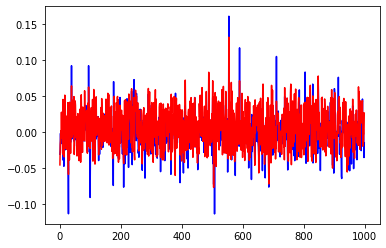

In [41]:
plt.plot(test_data['Ret_PlusTwo'].values[1:1000],c='b')
plt.plot(y_pred[1:1000],c='r')
plt.show()

In [87]:
#Mean Absolute Error
metrics.mean_absolute_error(y_pred[1:1000],test_data['Ret_PlusTwo'].values[1:1000])

0.014523574600852672